In [1]:
import pandas as pd, networkx as nx
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import trace_analysis
import os
import trace_statistics 

# 1st Trace of Normal Network
Parse the 1st trace file with 1000 packets over a network without any attacker.

In [2]:
nodes1, hops1 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-29-1')
std_values1, outliers1 = trace_analysis.separate_outliers_node_by_node(nodes1)

hop_nodes1 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-29-1')
hop_std_values1, hop_outliers1 = trace_analysis.separate_outliers(hop_nodes1)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

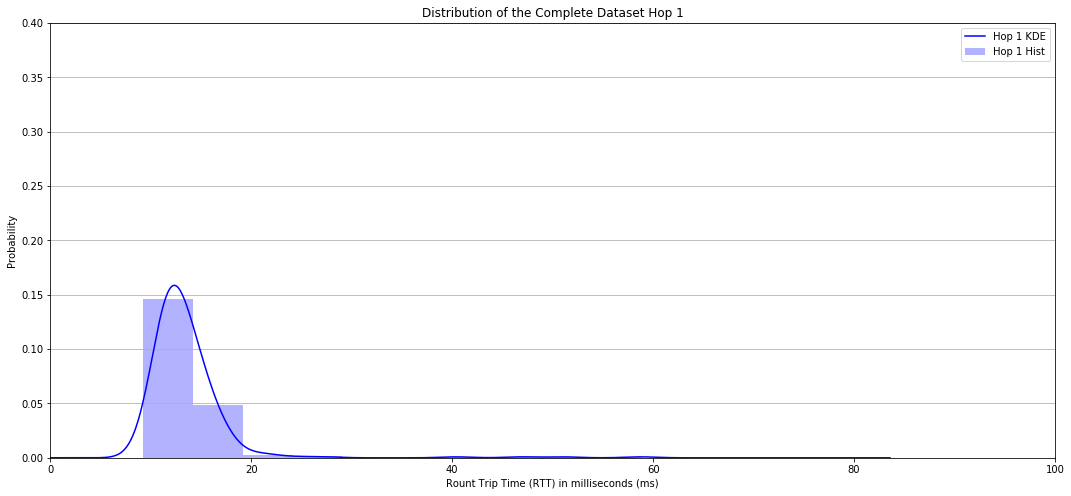

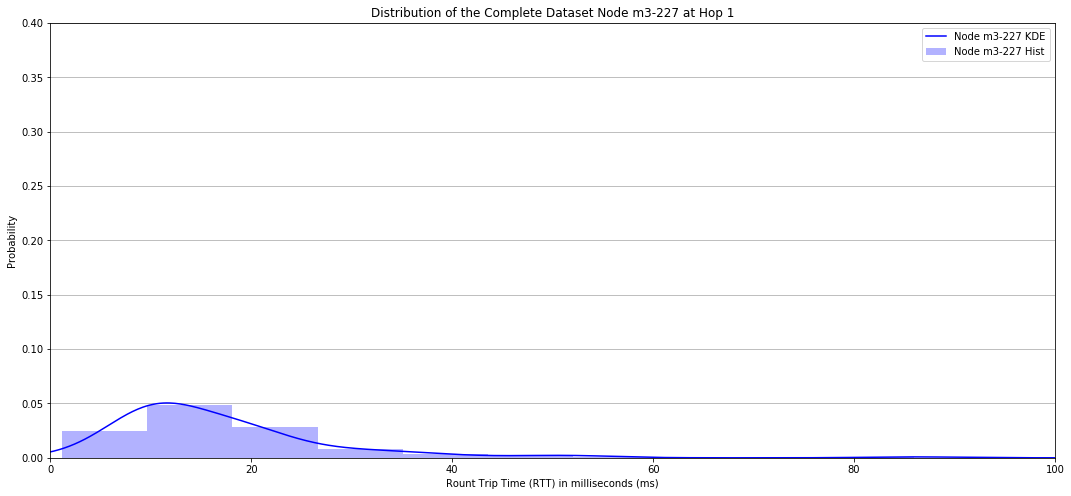

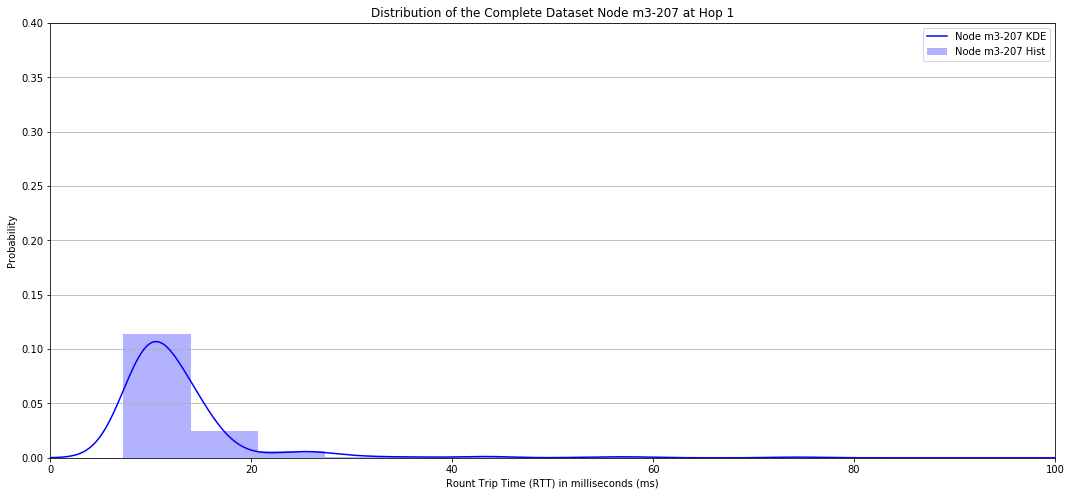

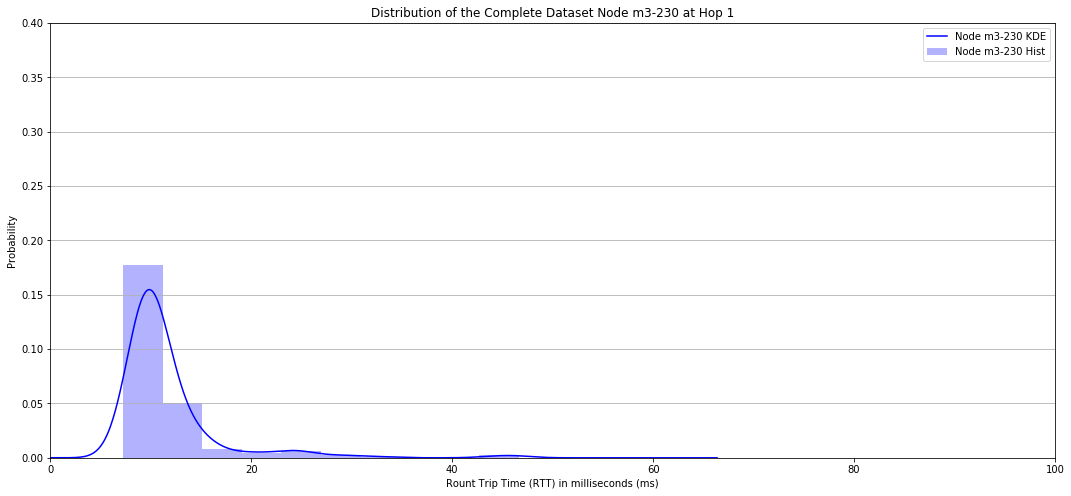

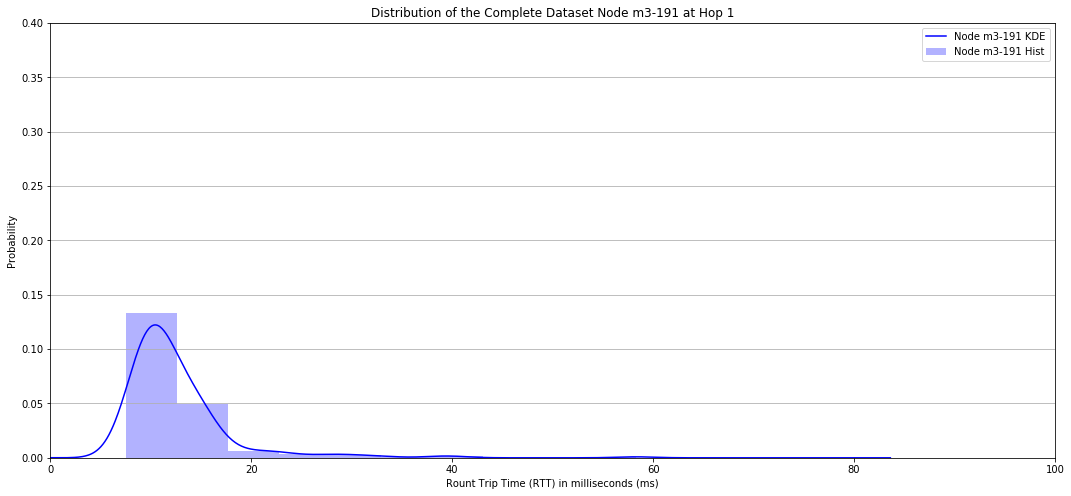

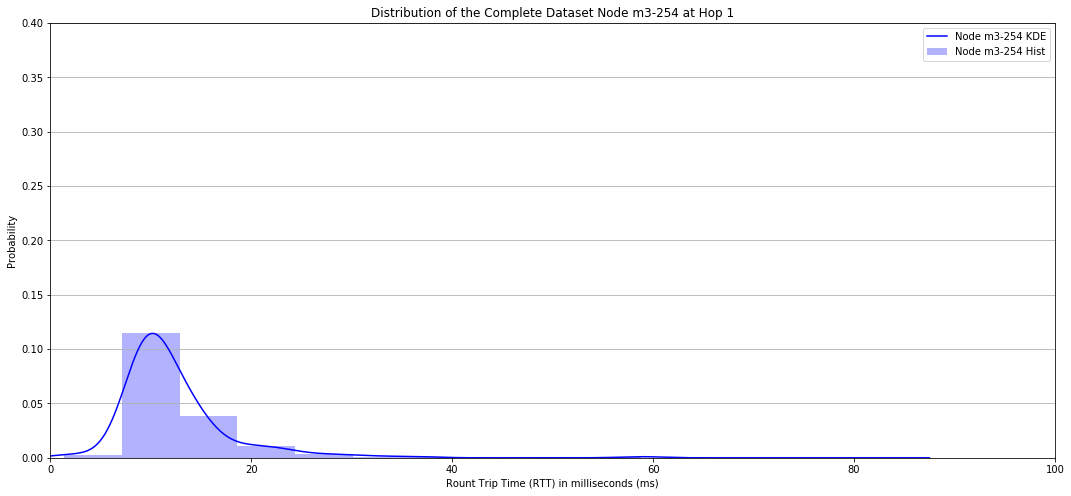

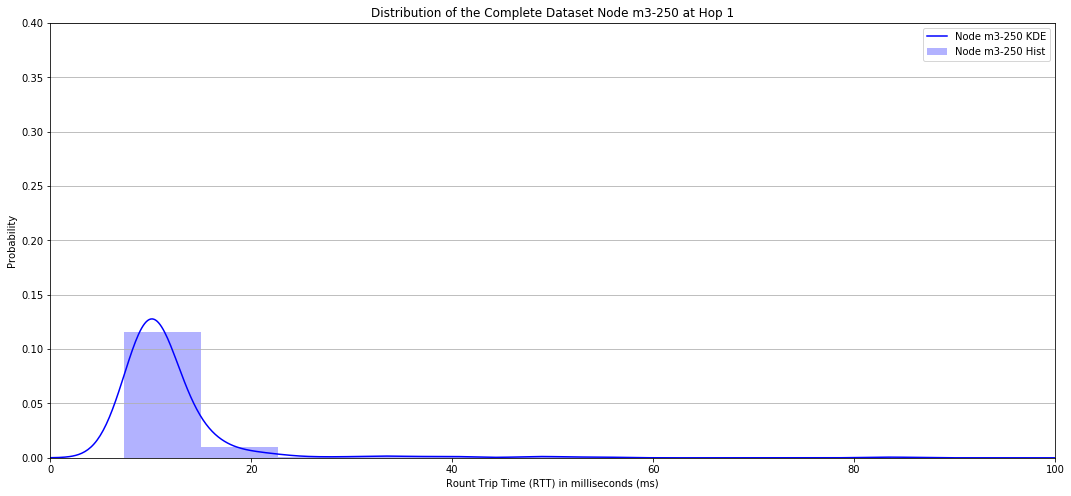

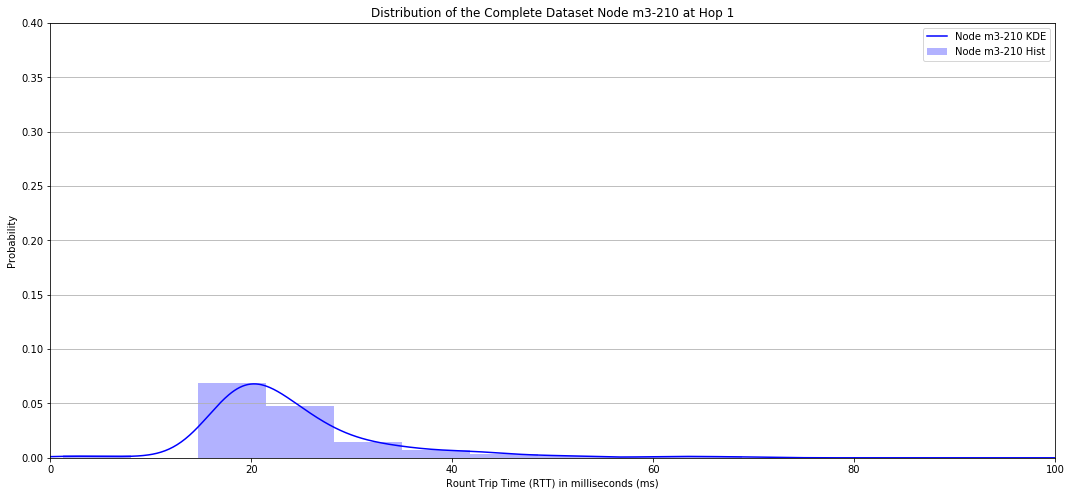

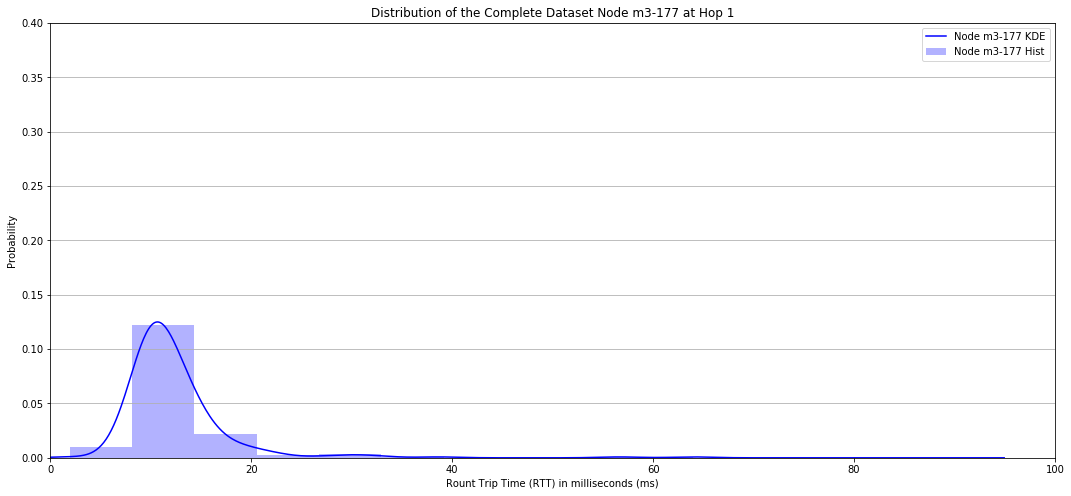

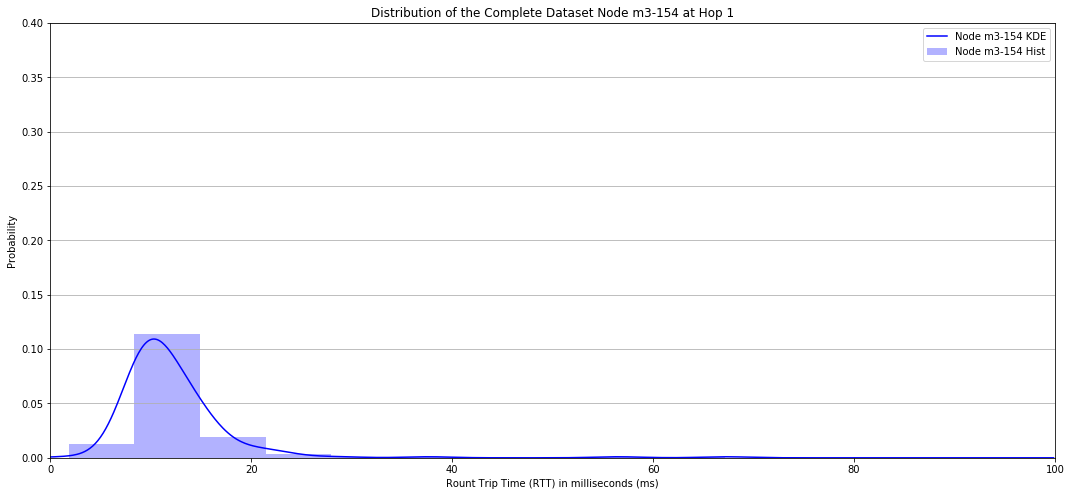

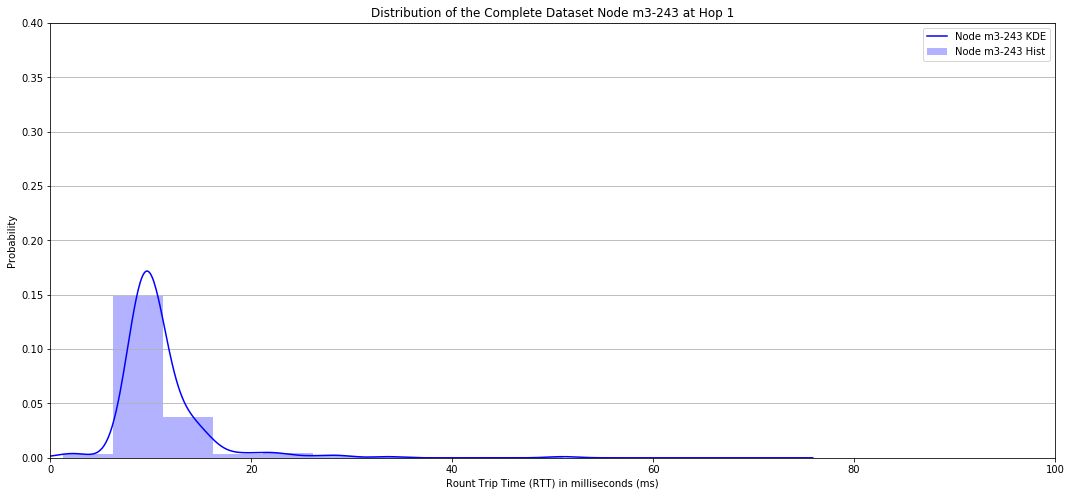

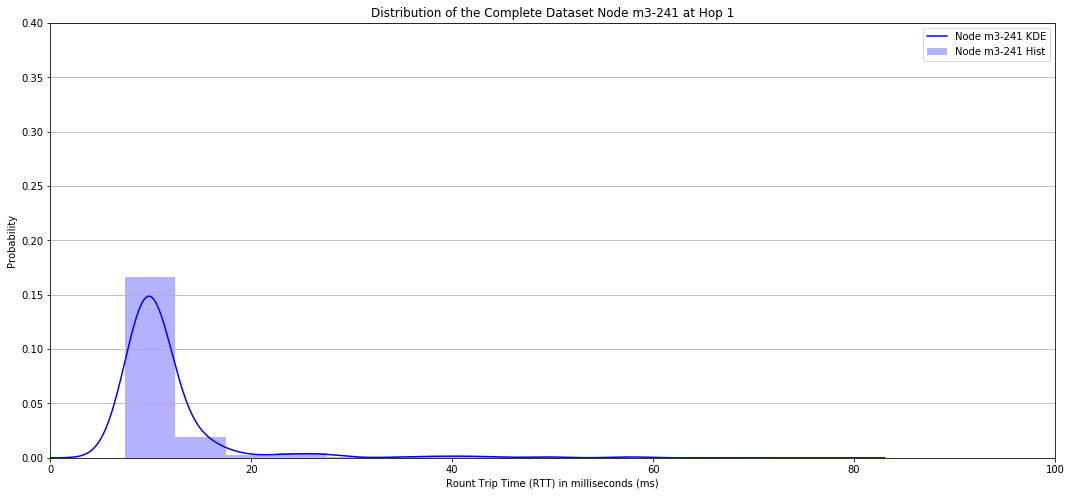

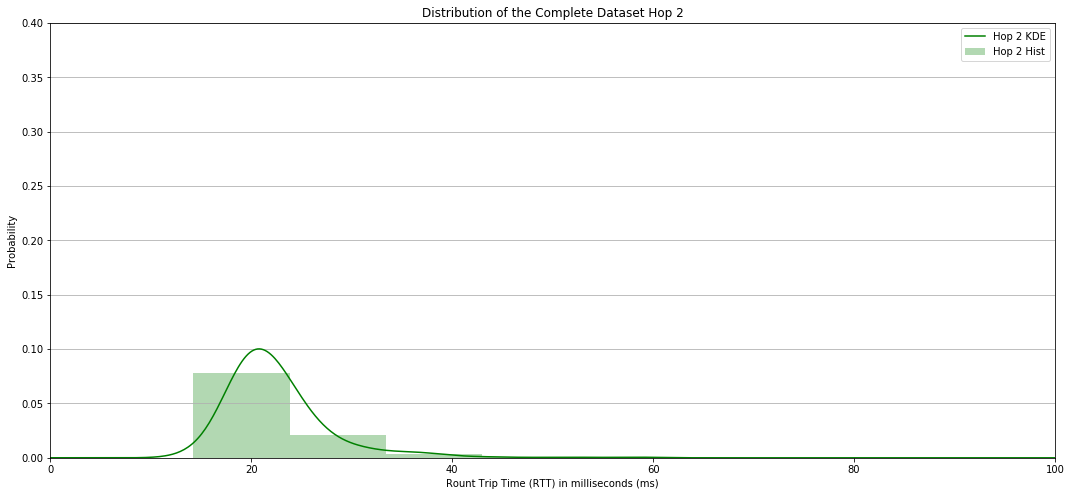

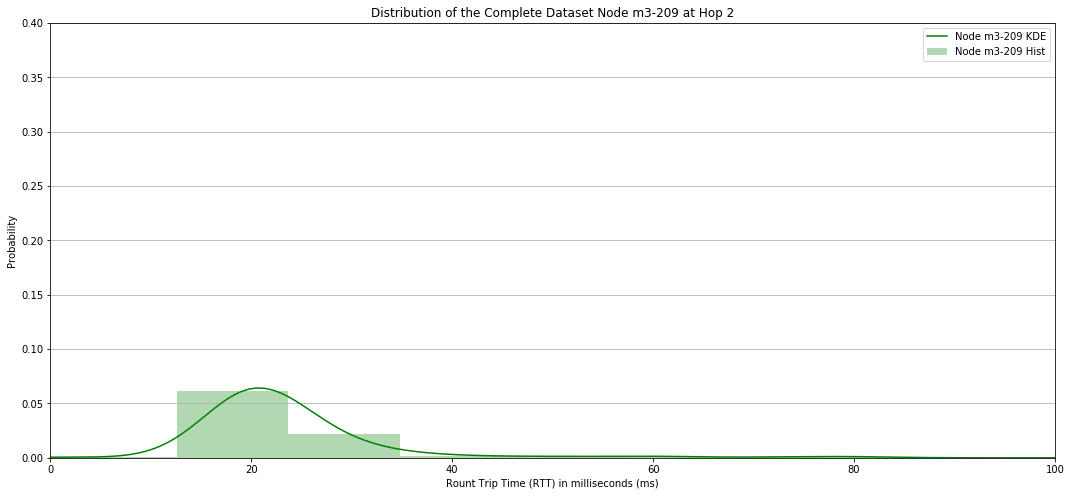

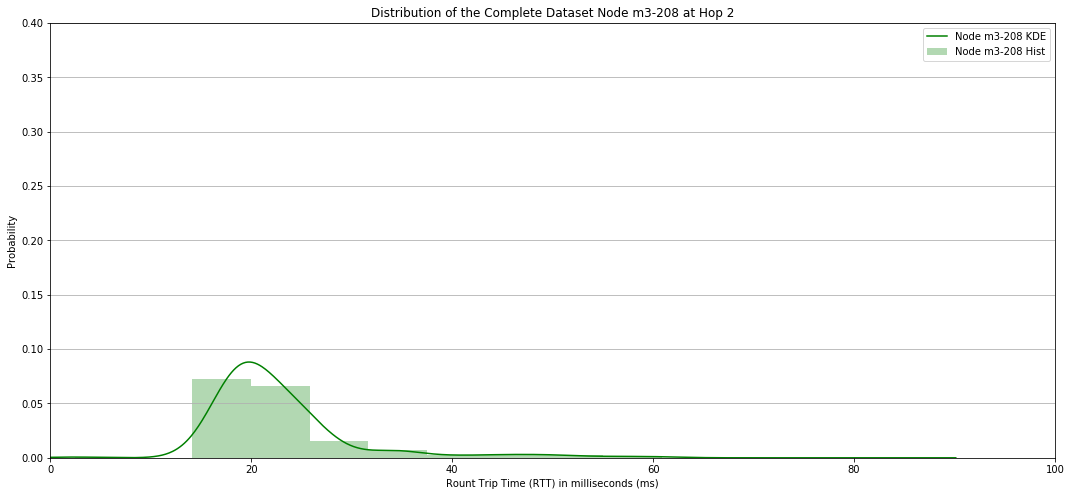

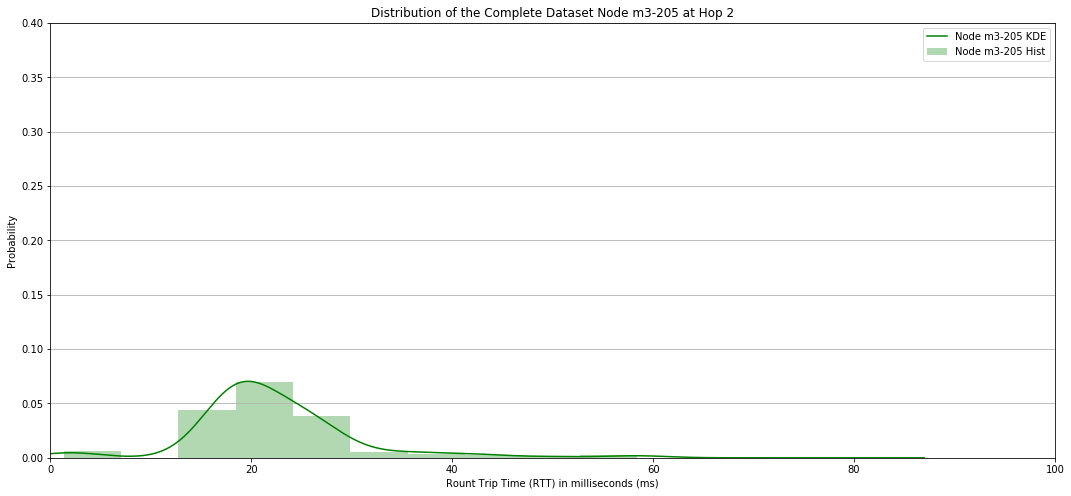

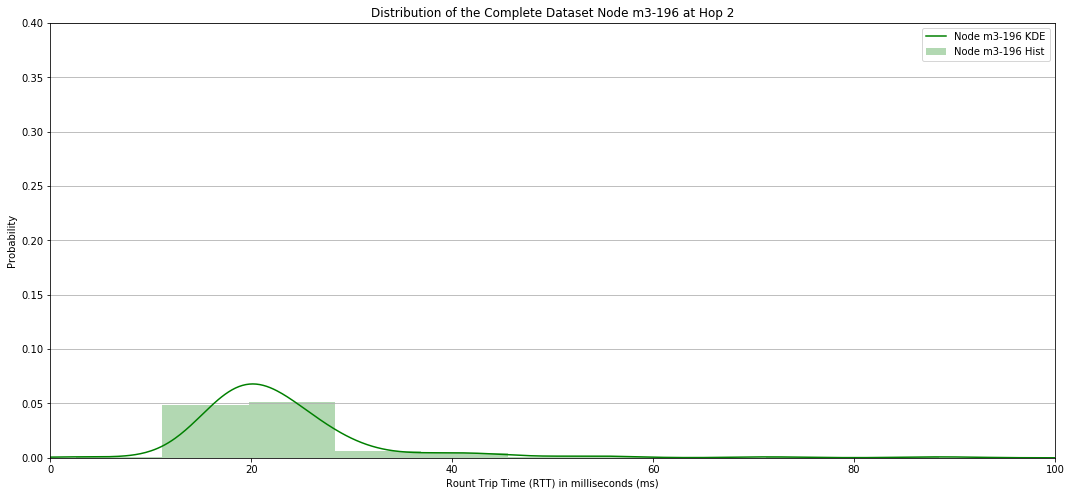

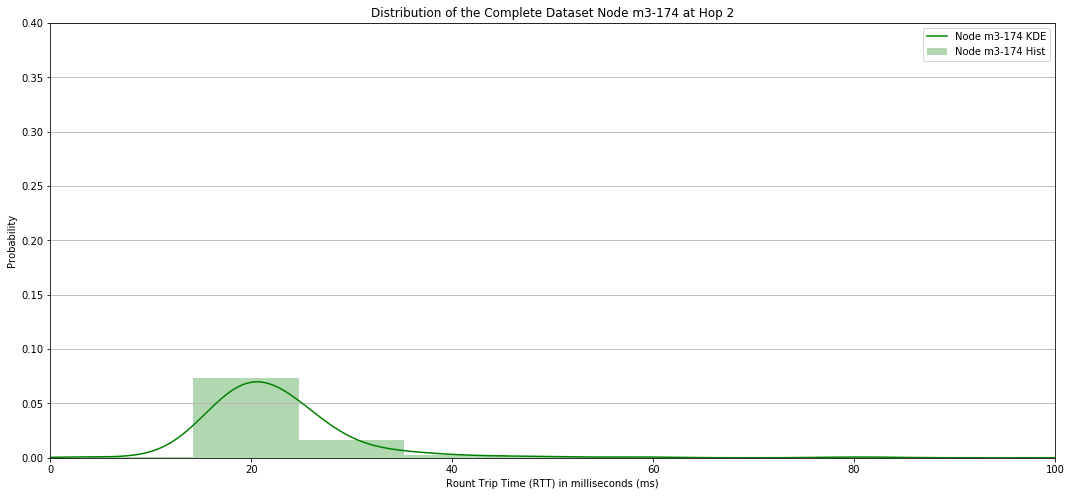

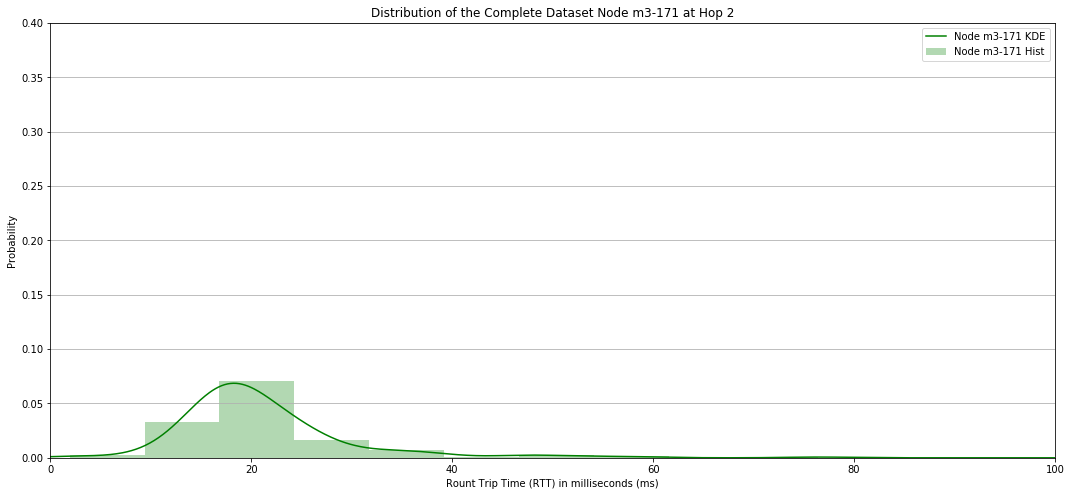

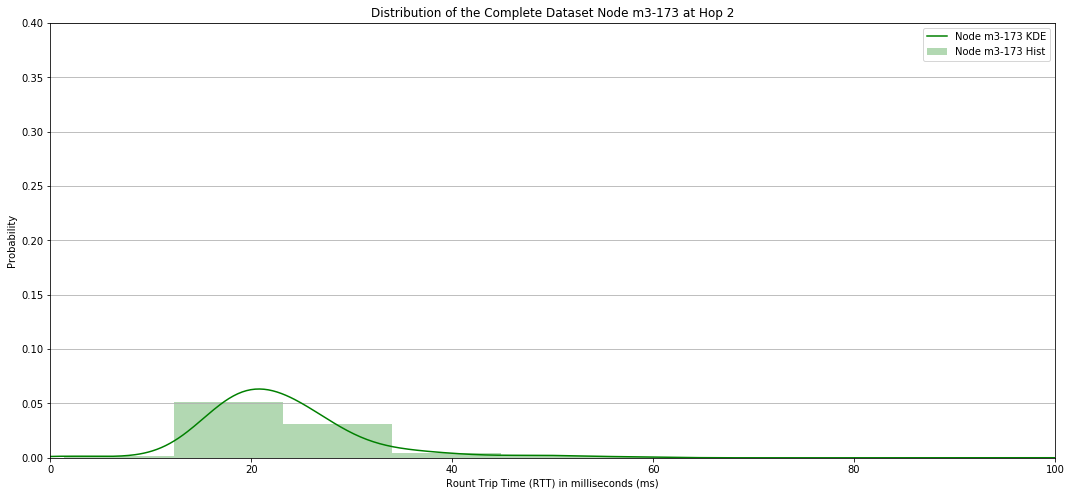

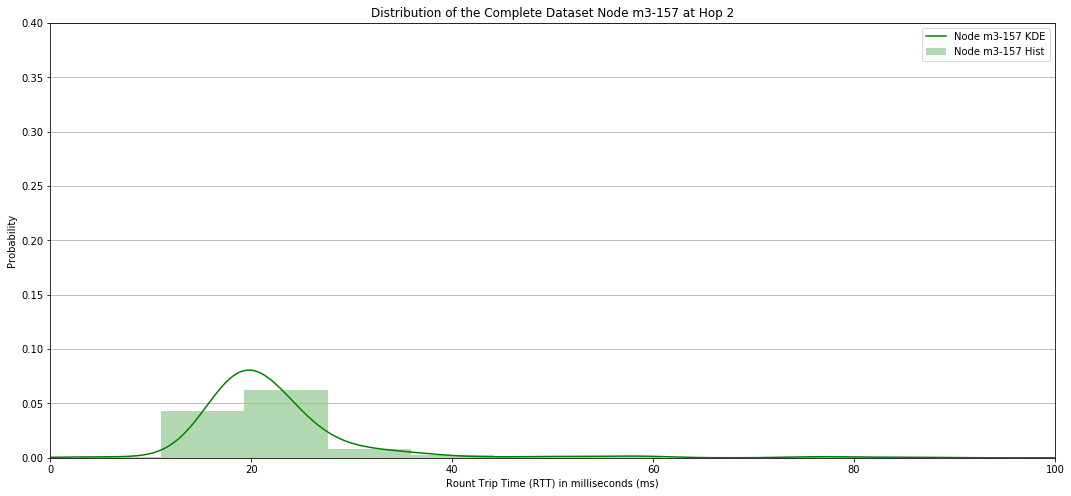

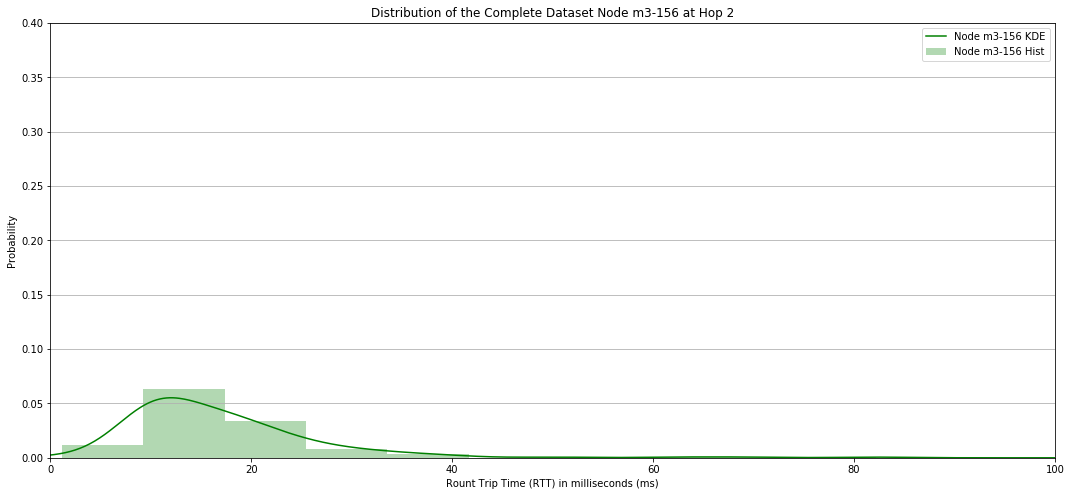

In [6]:
color = ['', 'blue', 'green', 'red']


for hop in hops1.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops1[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes1[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes1[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Compare Hops

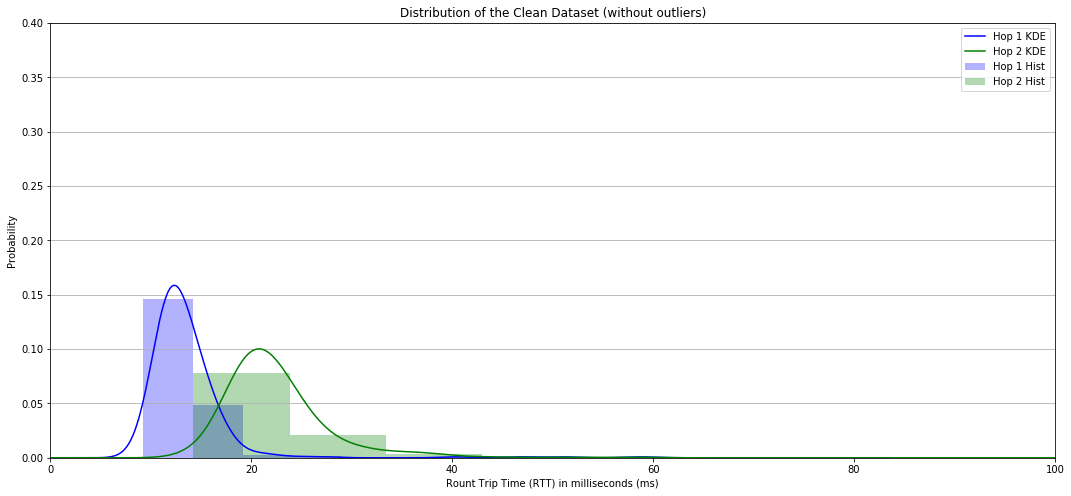

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes1.keys():
    hop_nodes1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

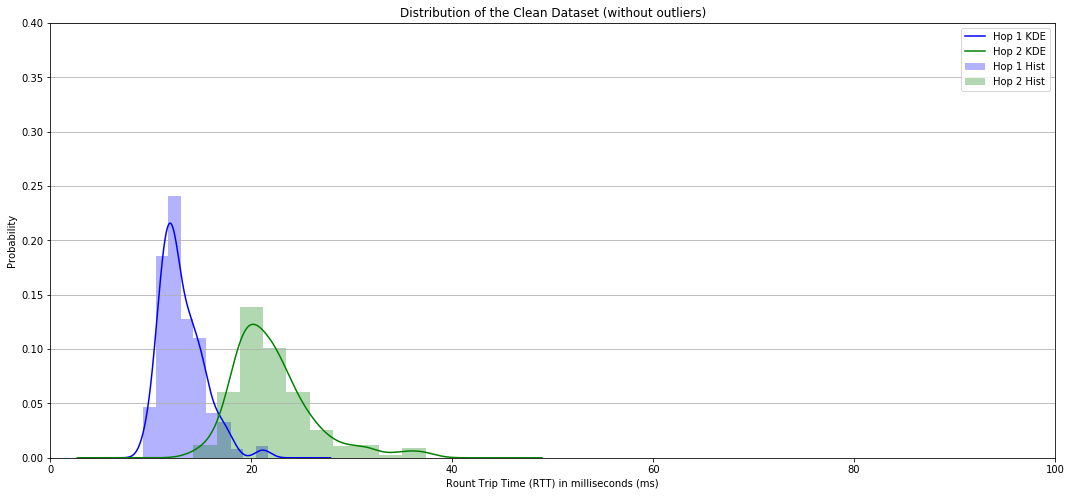

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values1.keys():
    hop_std_values1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

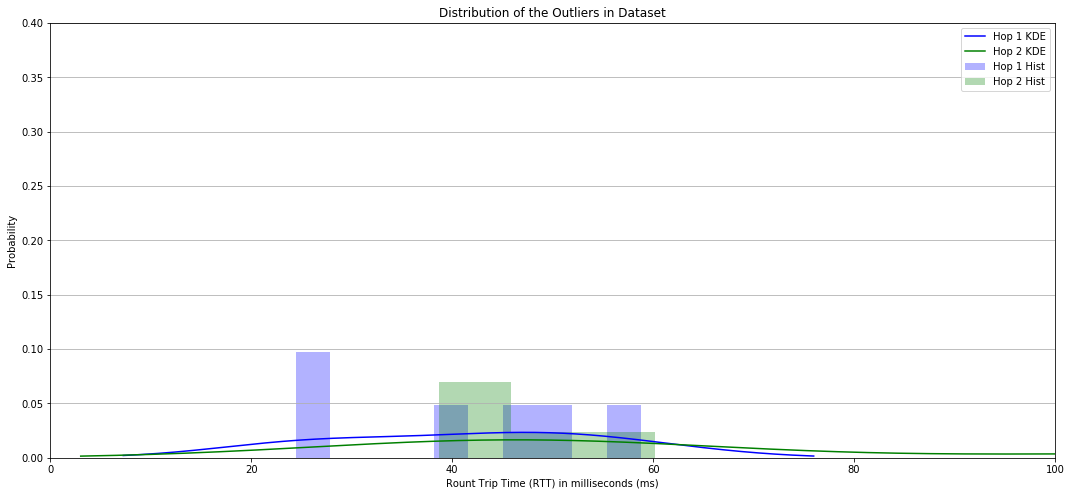

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers1.keys():
    hop_outliers1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


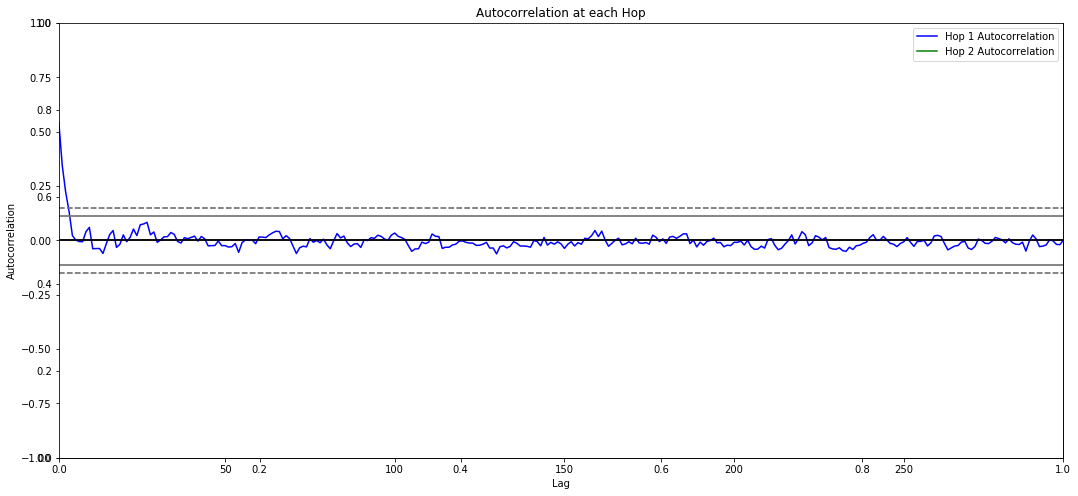

In [12]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes1.keys():
    autocorrelation_plot(hop_nodes1[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

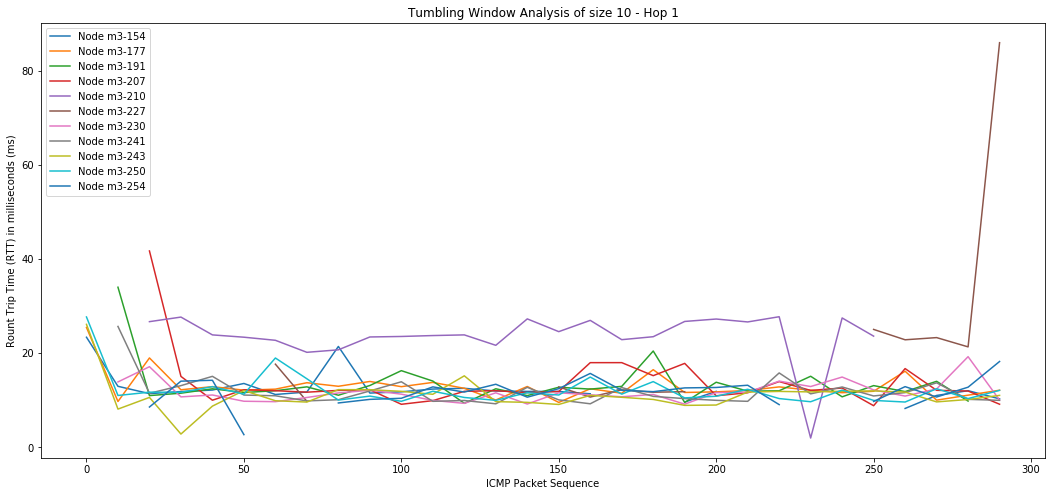

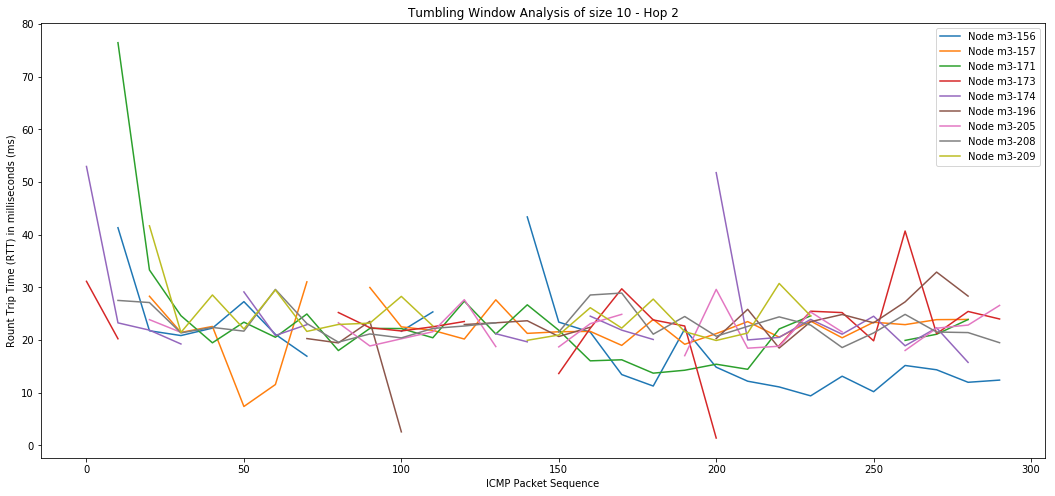

In [13]:
window_size = 10
for h in hops1.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes1:
        if node in hops1[h]:
            plt.plot(nodes1[node].groupby(nodes1[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by hop tumbling window

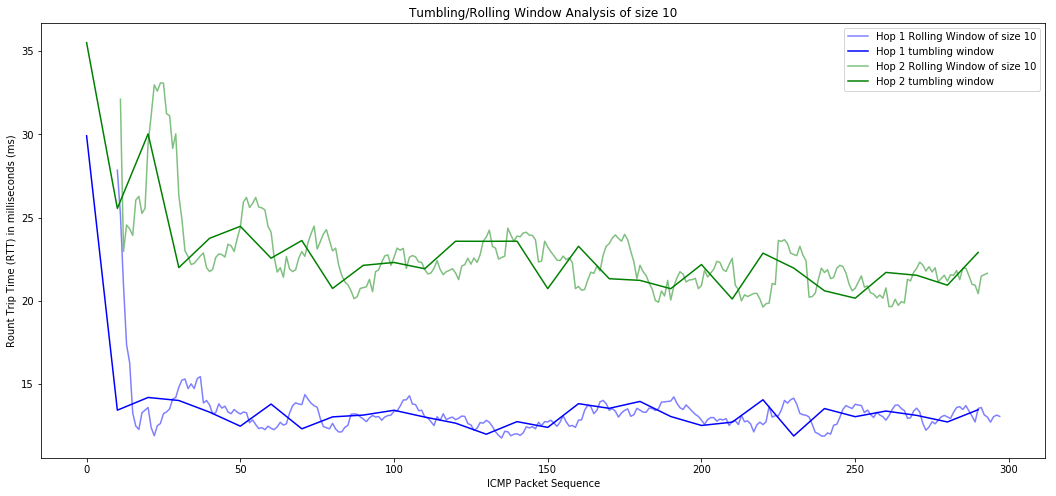

In [14]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes1.keys():
    plt.plot(hop_nodes1[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes1[hop].groupby(hop_nodes1[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

Outliers

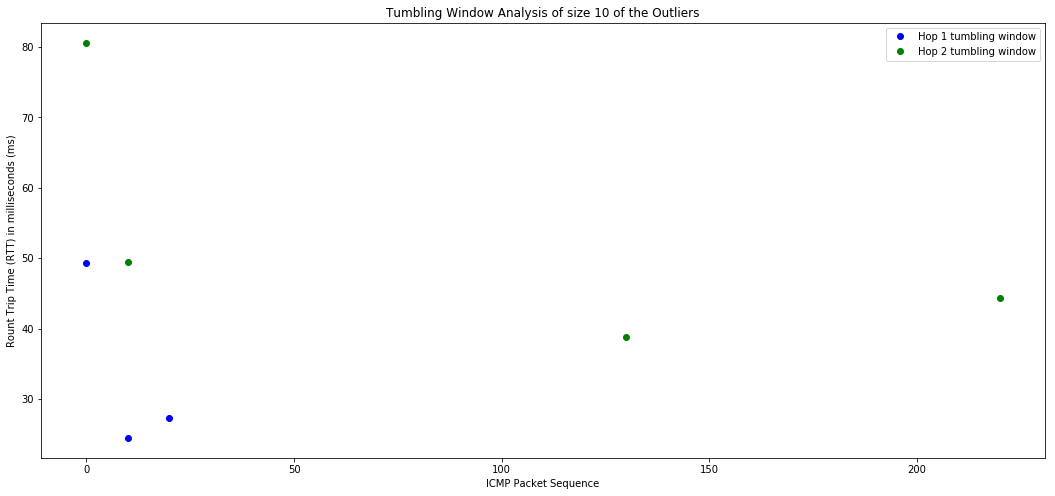

In [16]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes1.keys():
    plt.plot(hop_outliers1[hop].groupby(hop_outliers1[hop].index // window_size * window_size).mean(), 'o', color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' of the Outliers')
plt.legend()

### Statistics

For each hop

In [18]:
hop_nodes1.describe()

1           2
count  297.000000  293.000000
mean    13.634044   22.830499
std      4.856498    7.309077
min      9.240667   14.231400
25%     11.517250   19.444500
50%     12.608556   21.473000
75%     14.343300   23.926000
max     58.805000  110.176000

For each node

In [19]:
nodes1.describe()

m3-154      m3-156      m3-157      m3-171      m3-173      m3-174  \
count  180.000000  176.000000  226.000000  181.000000  141.000000  146.000000   
mean    12.404083   17.199244   22.763903   21.287619   23.689993   23.409027   
std      6.651591   10.463739    9.615106    9.074009   10.460454   10.676023   
min      1.814000    1.128000    2.709000    1.915000    1.389000    3.747000   
25%      9.228750   10.193000   18.233250   16.559000   18.715000   18.626250   
50%     10.519000   14.805000   20.351000   18.792000   21.867000   21.076500   
75%     13.594250   20.117750   23.680500   23.470000   25.388000   24.519500   
max     67.184000   82.161000   85.675000   76.440000  110.176000  108.557000   

           m3-177      m3-191      m3-196      m3-205      m3-207      m3-208  \
count  247.000000  237.000000  124.000000  135.000000  252.000000  234.000000   
mean    12.533587   12.590620   23.488065   22.347659   12.882143   22.850714   
std      6.088965    5.652685   10.249599    8.422246    7.507715    7.512571   
min      1.921000    7.529000    2.562000    1.304000    7.270000    2.414000   
25%      9.875000    9.449000   18.172500   18.432000    9.498000   18.540250   
50%     11.013000   11.043000   20.557500   20.669000   10.778500   20.656500   
75%     13.434000   13.848000   24.214250   24.890000   13.473250   24.429750   
max     63.944000   58.258000   88.456000   58.431000   74.153000   60.894000   

           m3-209      m3-210      m3-227      m3-230      m3-241      m3-243  \
count  172.000000  191.000000  104.000000  268.000000  267.000000  257.000000   
mean    24.390645   24.213173   17.134625   11.677373   11.503794   10.957875   
std     12.290331    9.115053   11.633877    5.380195    6.034172    4.469686   
min      1.443000    1.216000    1.163000    7.225000    7.400000    1.230000   
25%     18.884000   18.726500    9.829750    9.140750    8.991000    8.943000   
50%     21.118500   21.597000   12.956000   10.094500    9.949000    9.903000   
75%     24.748500   26.658000   19.826250   11.694250   11.228000   11.183000   
max    112.588000   68.824000   85.953000   46.656000   57.825000   51.010000   

           m3-250      m3-254  
count  285.000000  185.000000  
mean    12.022393   12.405341  
std      7.275147    5.981784  
min      7.356000    1.382000  
25%      9.403000    9.424000  
50%     10.229000   10.704000  
75%     11.509000   13.828000  
max     83.639000   58.805000

Loss

In [20]:
pd.DataFrame([[h, str((len(hop_nodes1[h]) - hop_nodes1[h].count())/len(hop_nodes1[h])*100) +'%'] 
              for h in hop_nodes1.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 0.0%
1    2        1.3468013468%

In [21]:
pd.DataFrame([[n, h, str((len(nodes1[n]) - nodes1[n].count())/len(nodes1[n])*100) +'%'] 
              for n in nodes1.keys() for h in hops1.keys() if n in hops1[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
0   m3-154    1       39.3939393939%
17  m3-243    1        13.468013468%
16  m3-241    1        10.101010101%
15  m3-230    1       9.76430976431%
14  m3-227    1       64.9831649832%
13  m3-210    1       35.6902356902%
10  m3-207    1       15.1515151515%
18  m3-250    1        4.0404040404%
19  m3-254    1       37.7104377104%
7   m3-191    1        20.202020202%
6   m3-177    1        16.835016835%
11  m3-208    2       21.2121212121%
12  m3-209    2       42.0875420875%
5   m3-174    2       50.8417508418%
4   m3-173    2       52.5252525253%
3   m3-171    2       39.0572390572%
2   m3-157    2       23.9057239057%
1   m3-156    2       40.7407407407%
8   m3-196    2       58.2491582492%
9   m3-205    2       54.5454545455%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

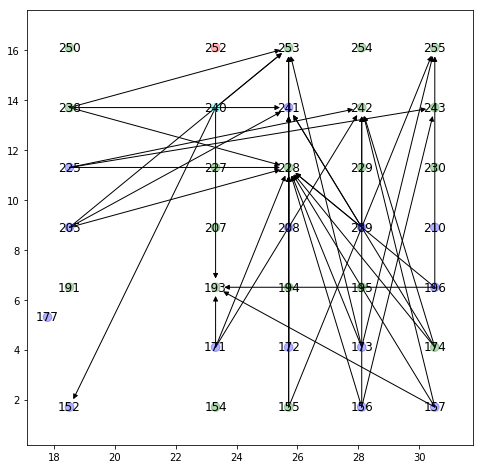

In [17]:
G1 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-29-1')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
plt.show()

# 2nd Trace of Normal Network
Parse the 2nd trace file with 290 packets over a network without any attacker.

In [3]:
nodes2, hops2 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-29-2')
std_values2, outliers2 = trace_analysis.separate_outliers_node_by_node(nodes2)

hop_nodes2 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-29-2')
hop_std_values2, hop_outliers2 = trace_analysis.separate_outliers(hop_nodes2)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

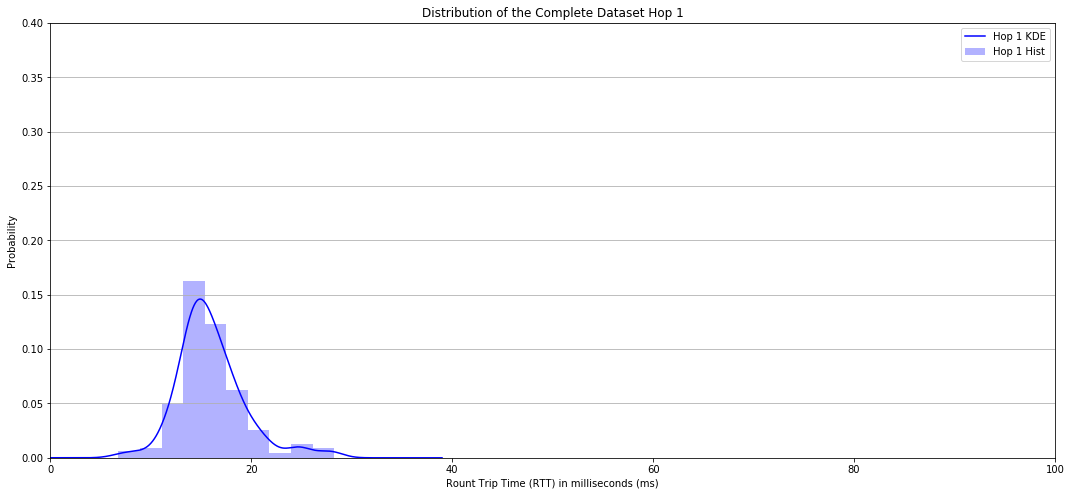

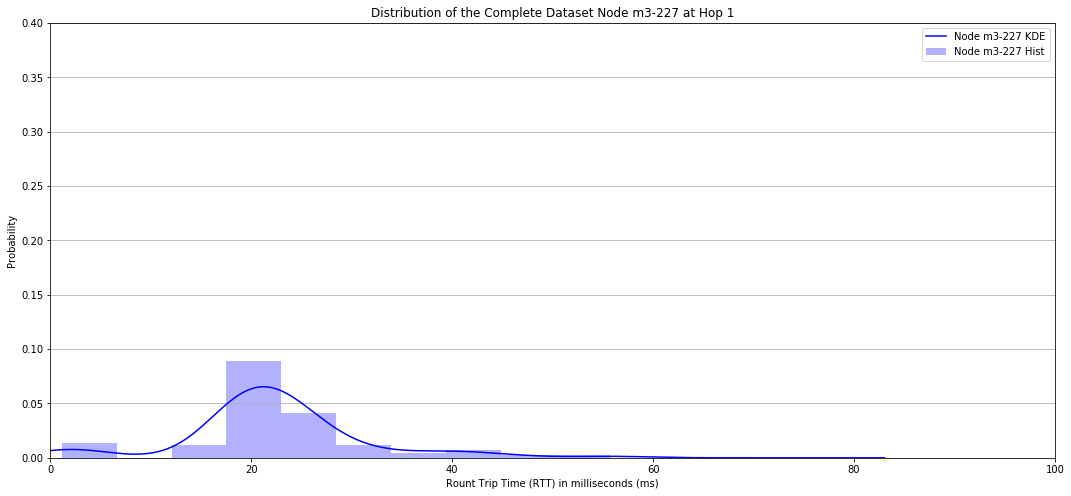

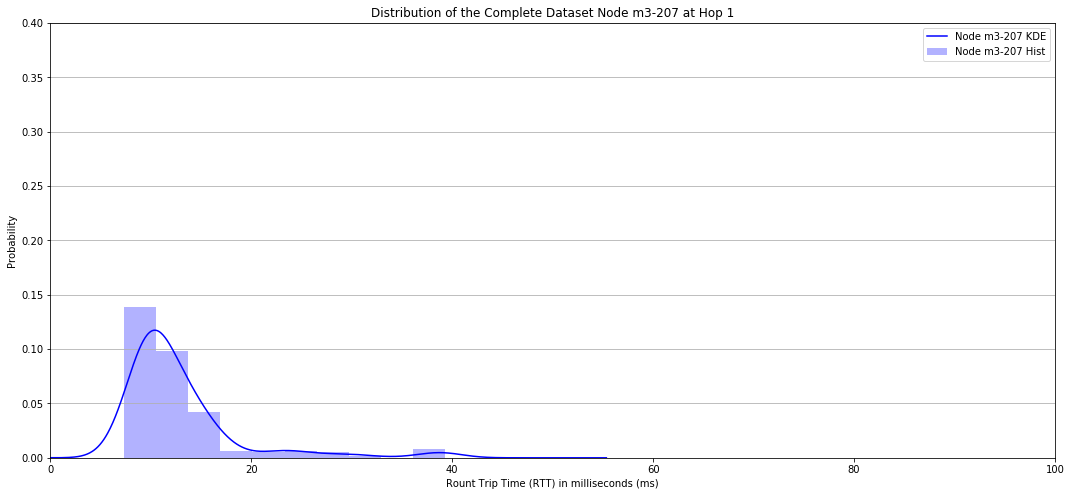

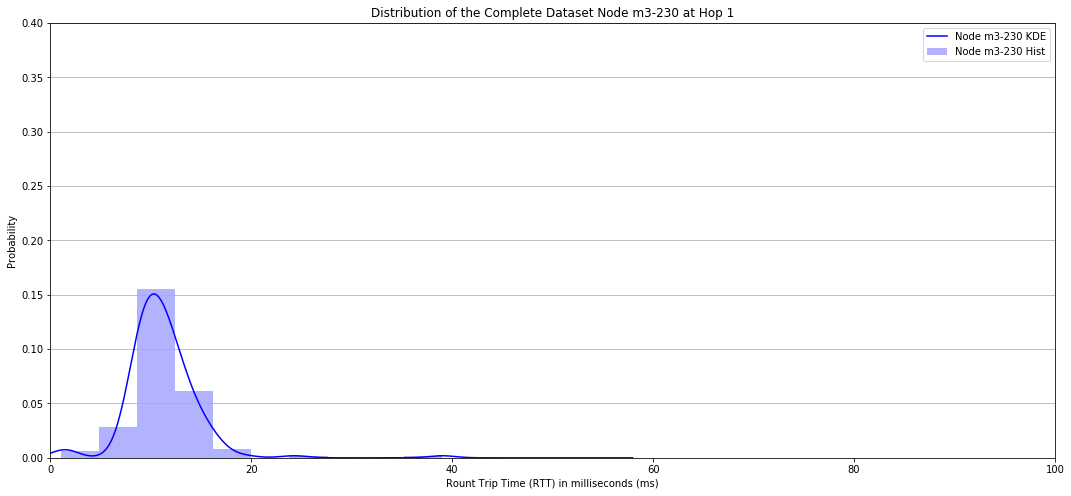

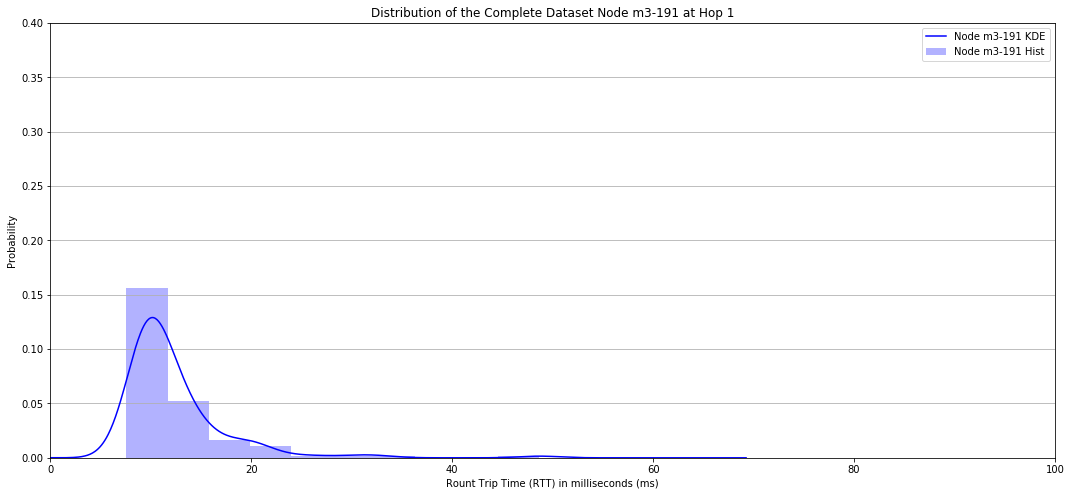

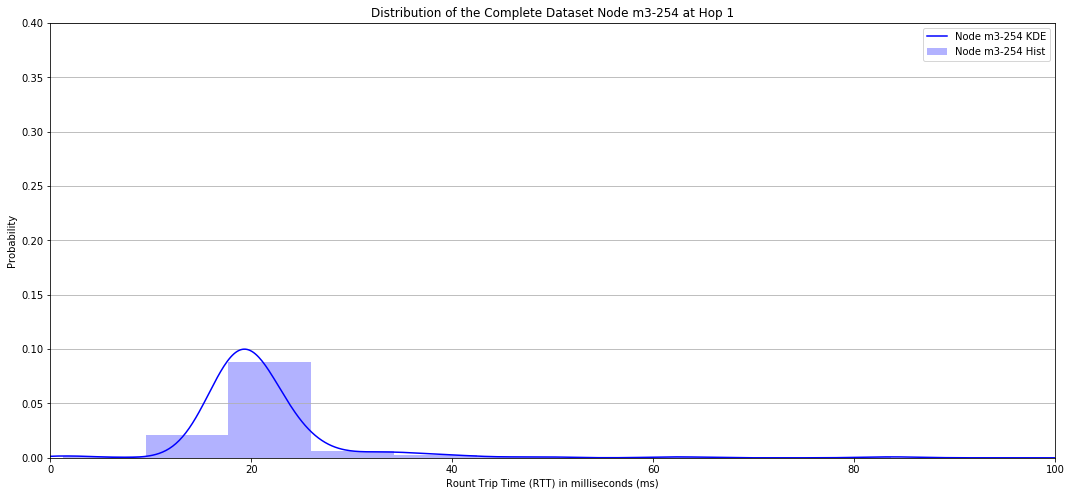

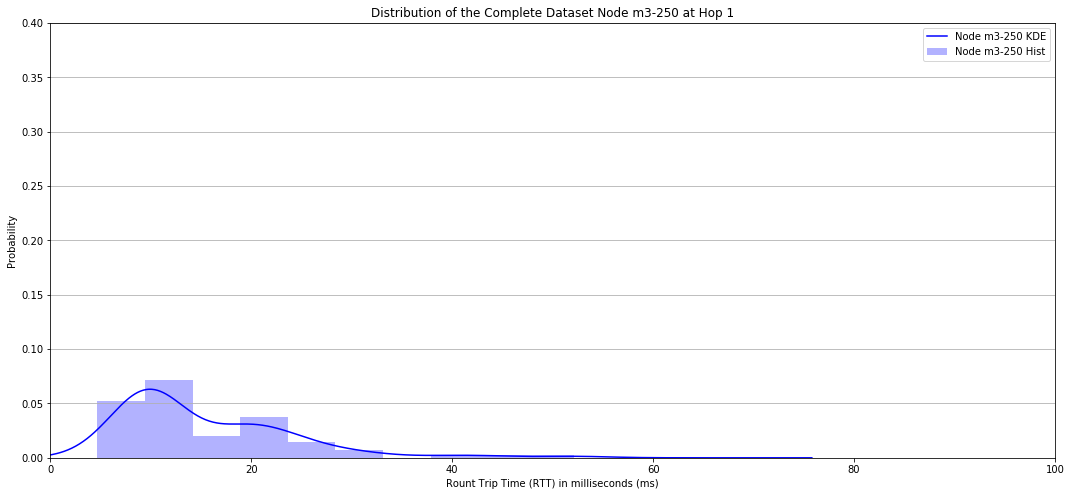

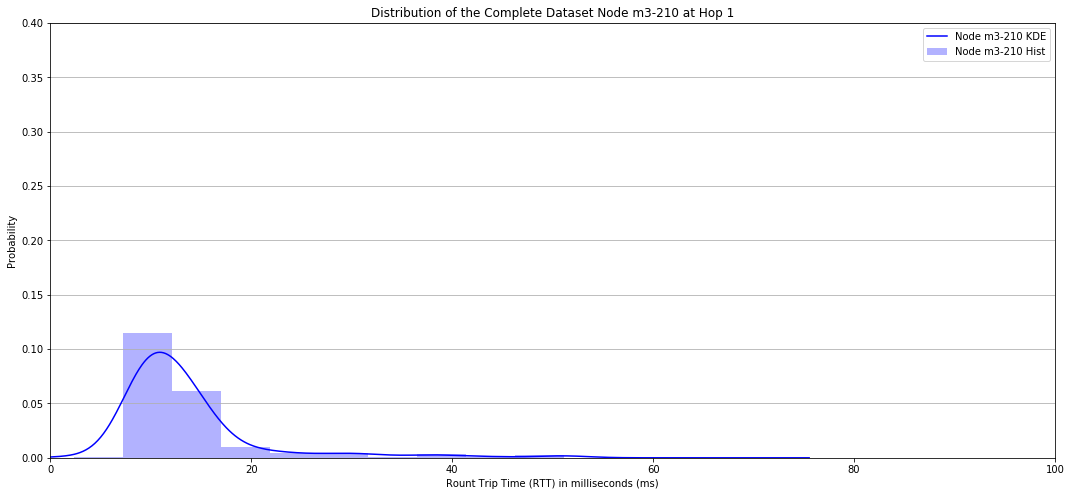

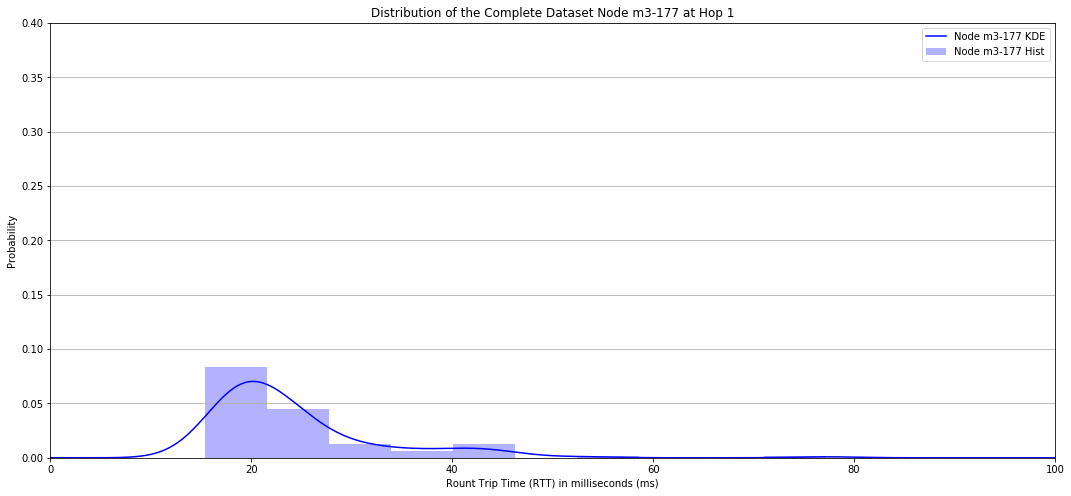

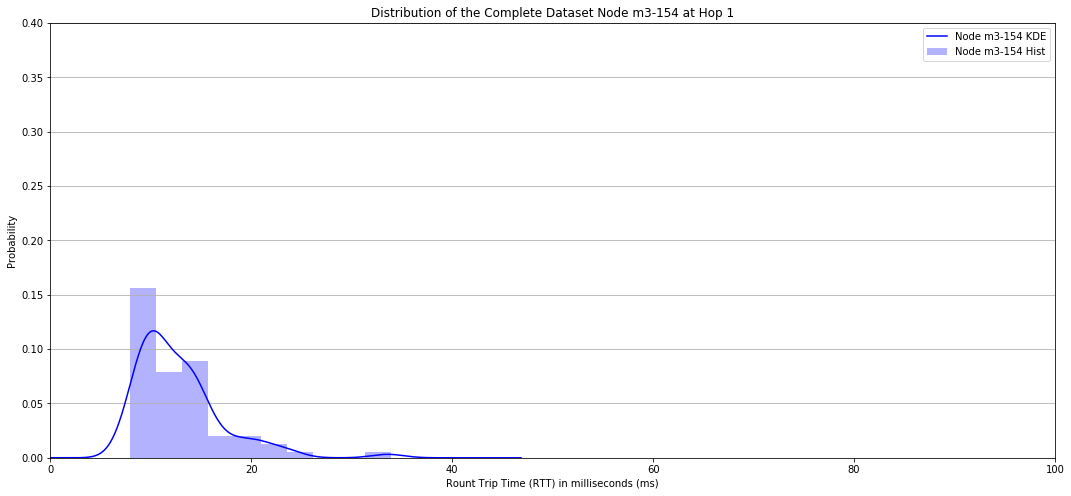

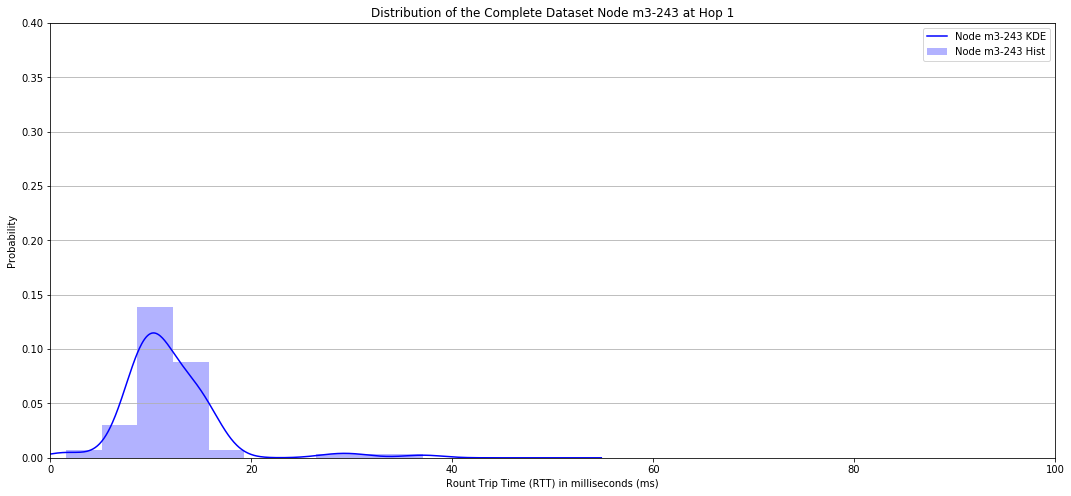

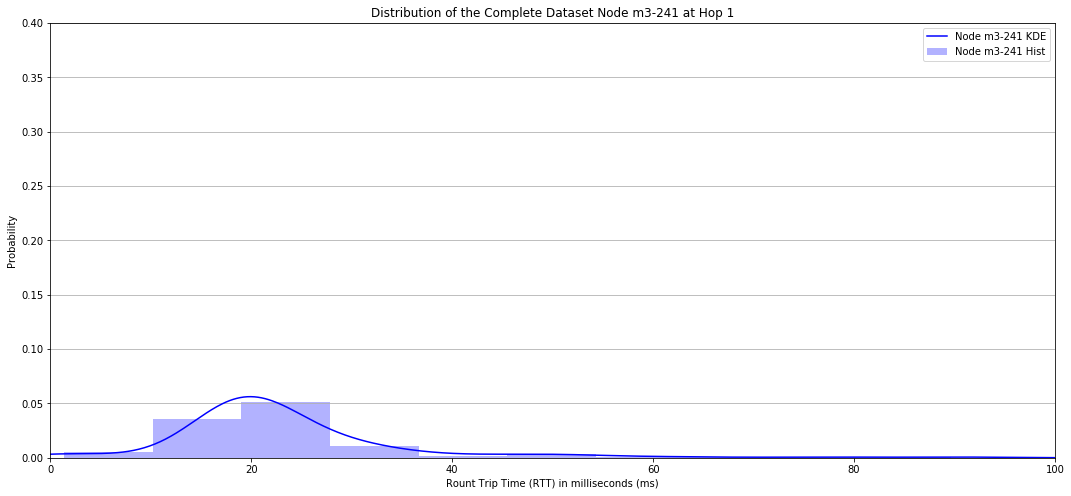

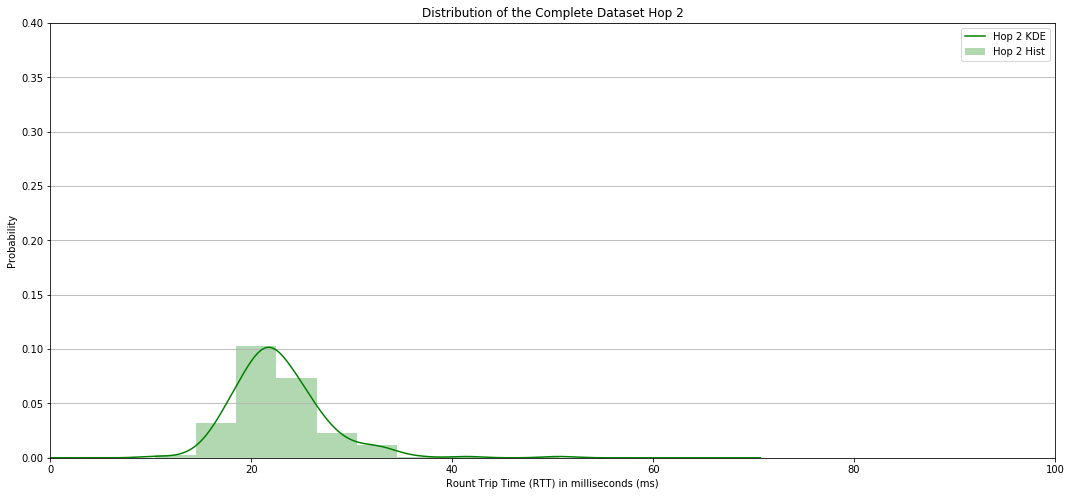

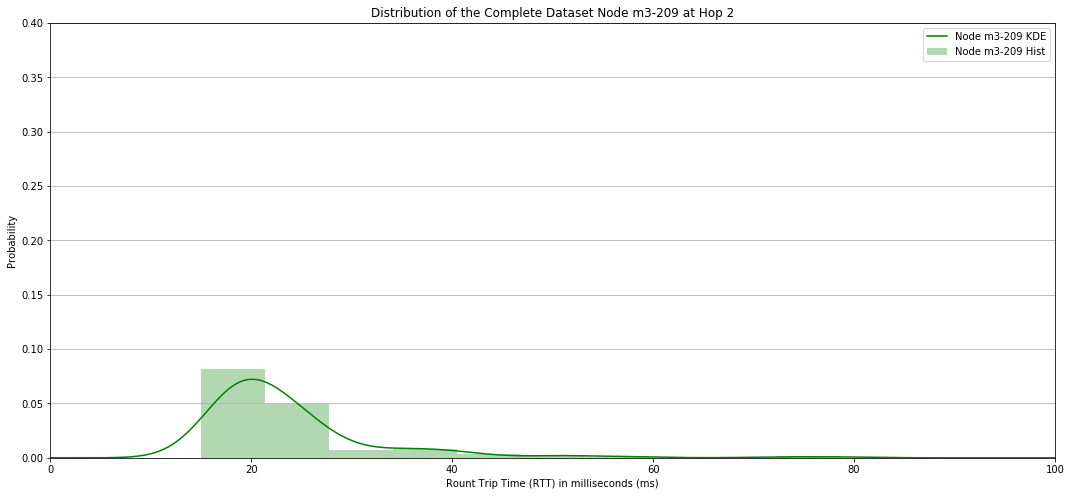

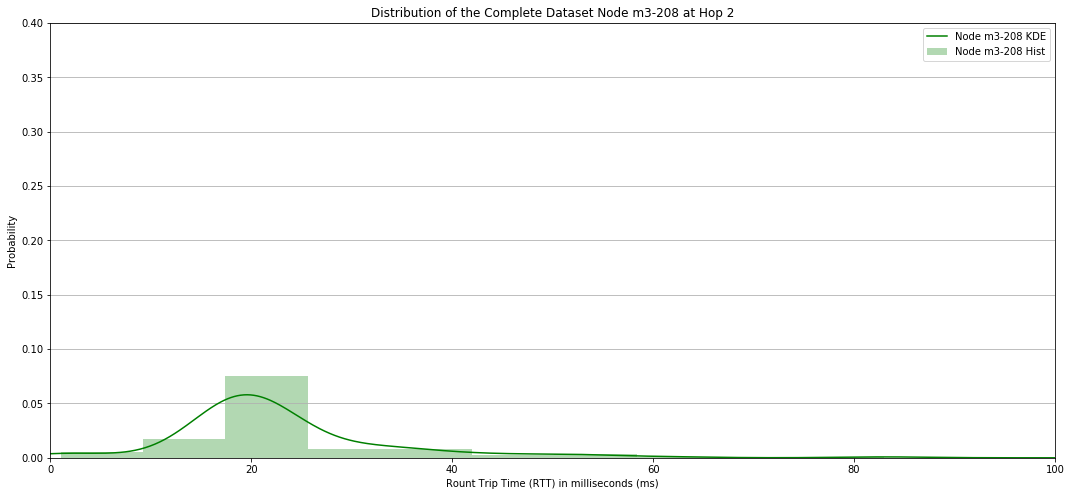

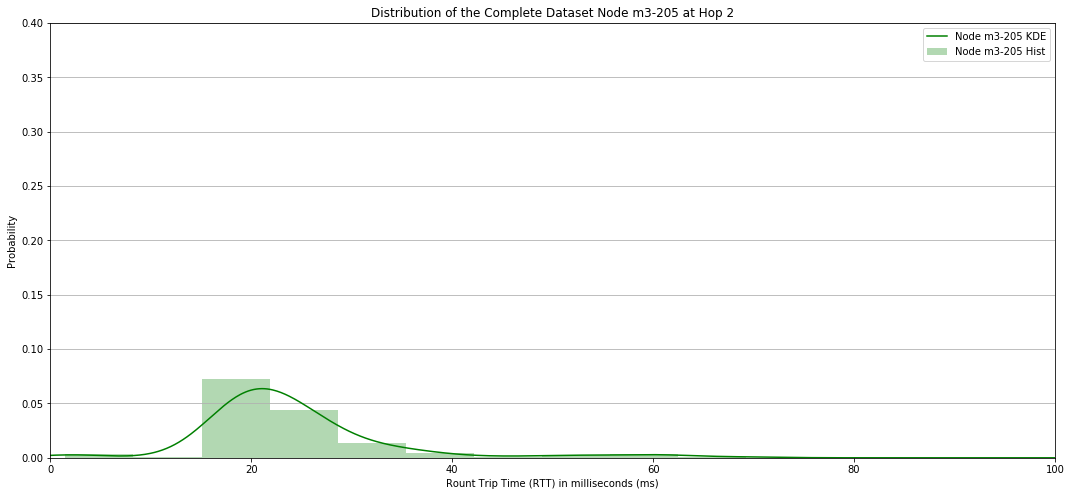

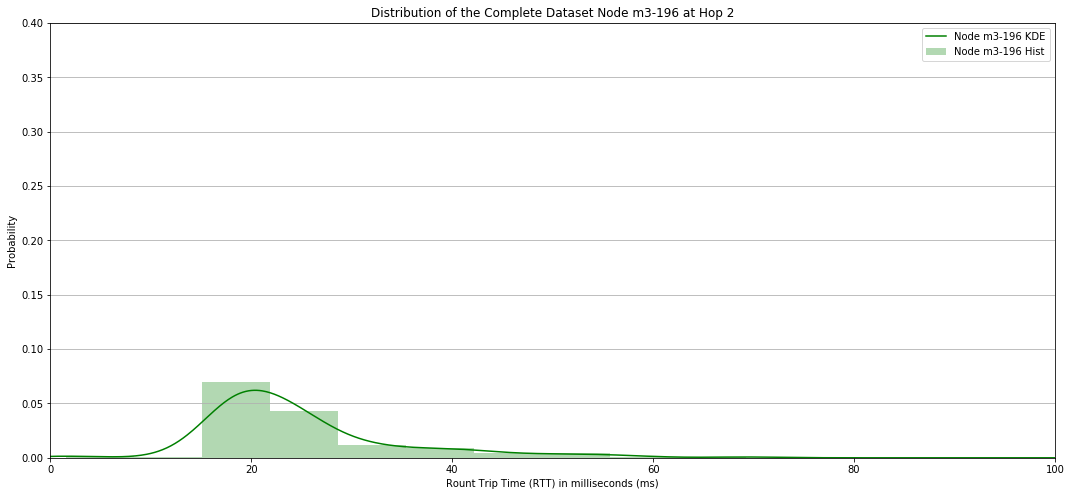

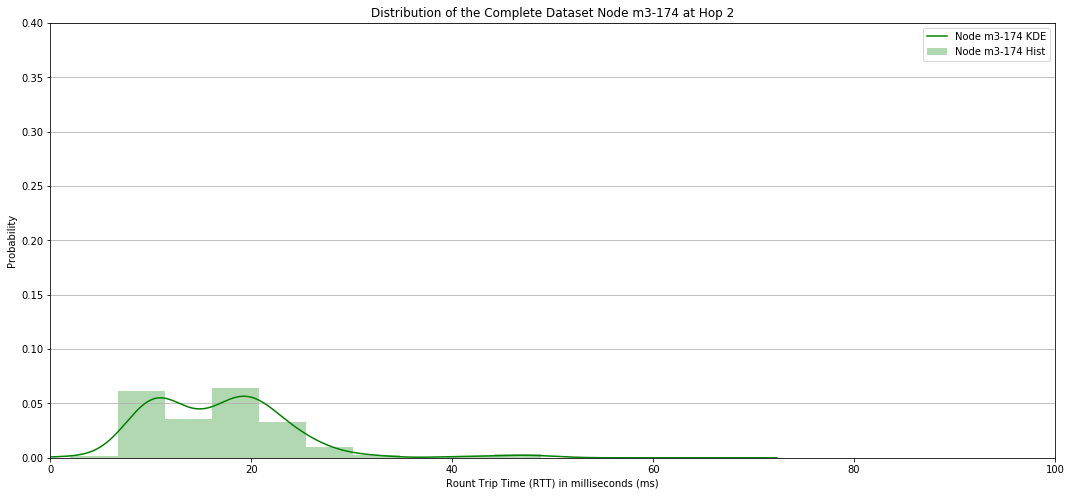

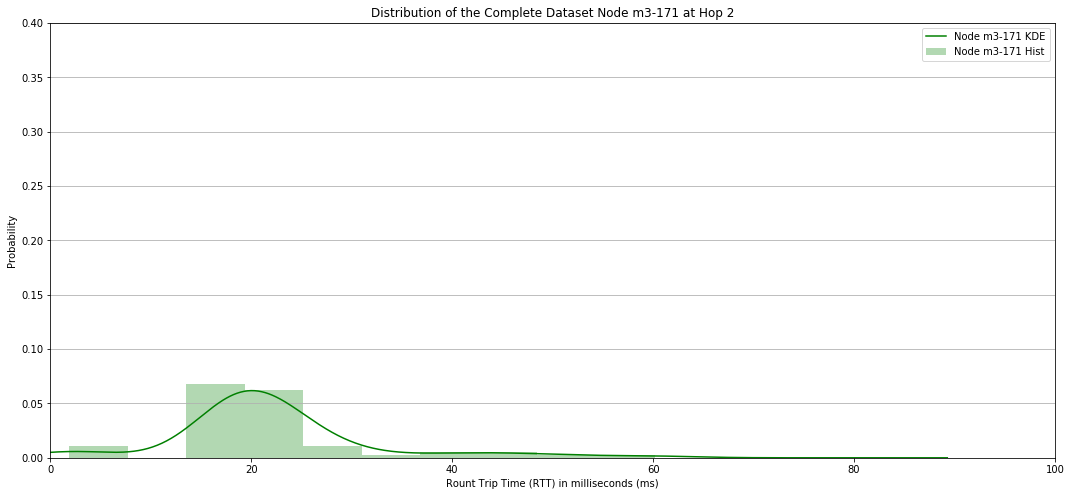

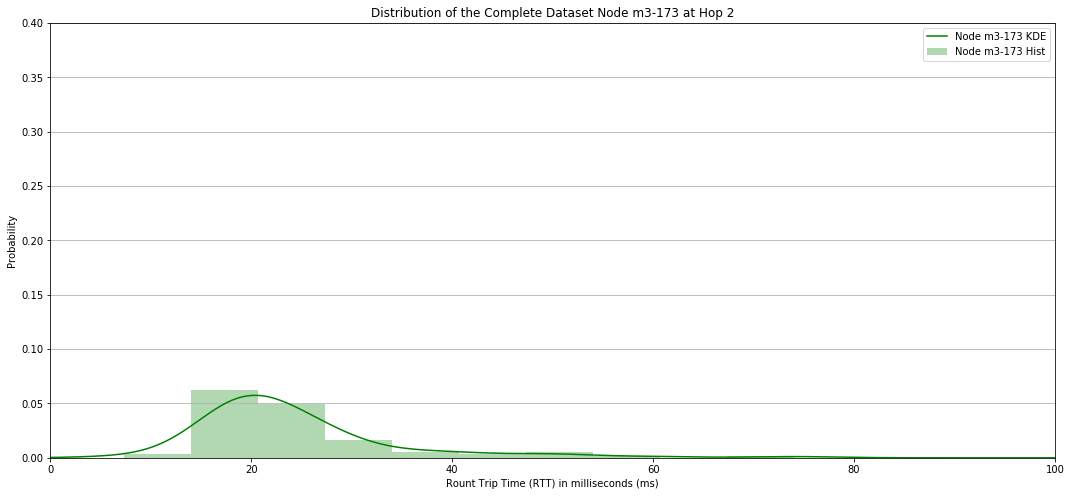

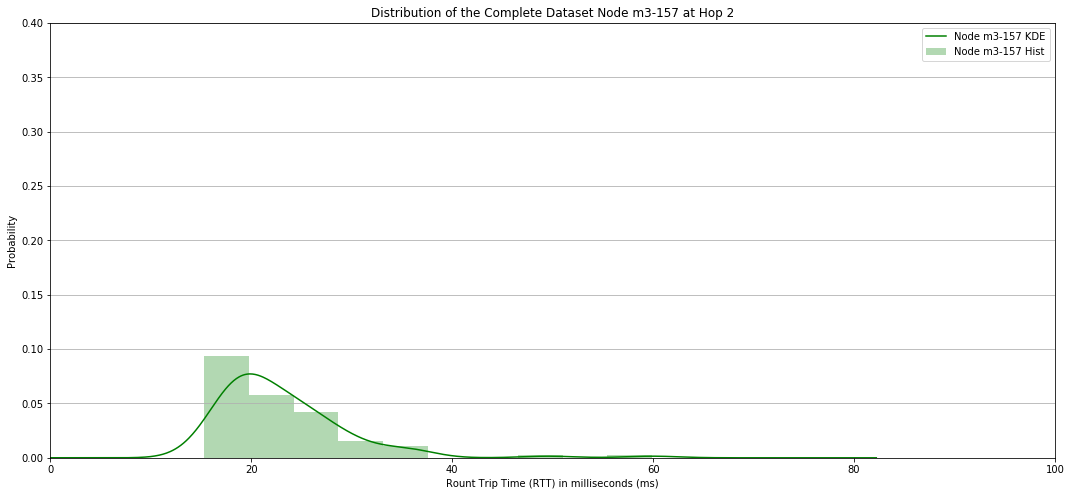

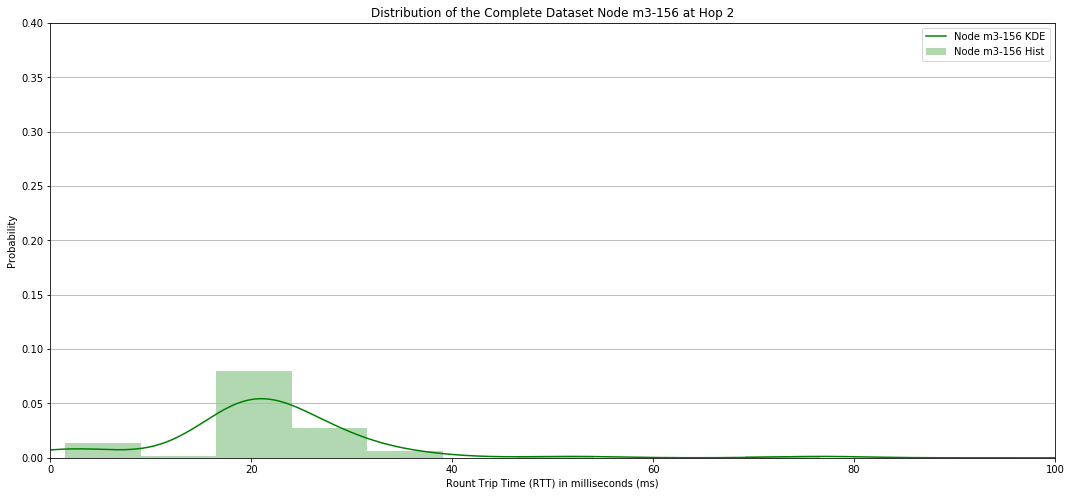

In [40]:
for hop in hops2.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops2[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes2[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes2[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Compare Hops

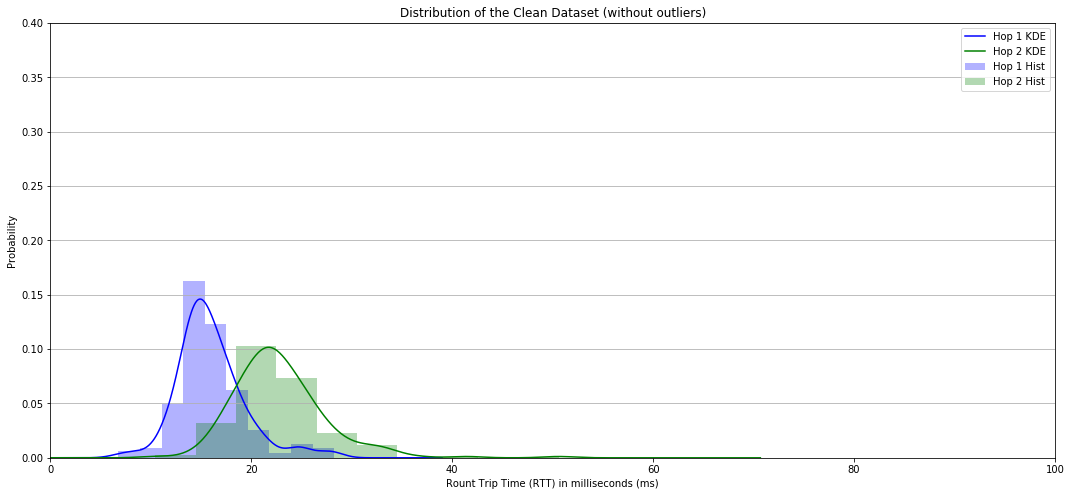

In [41]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    hop_nodes2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

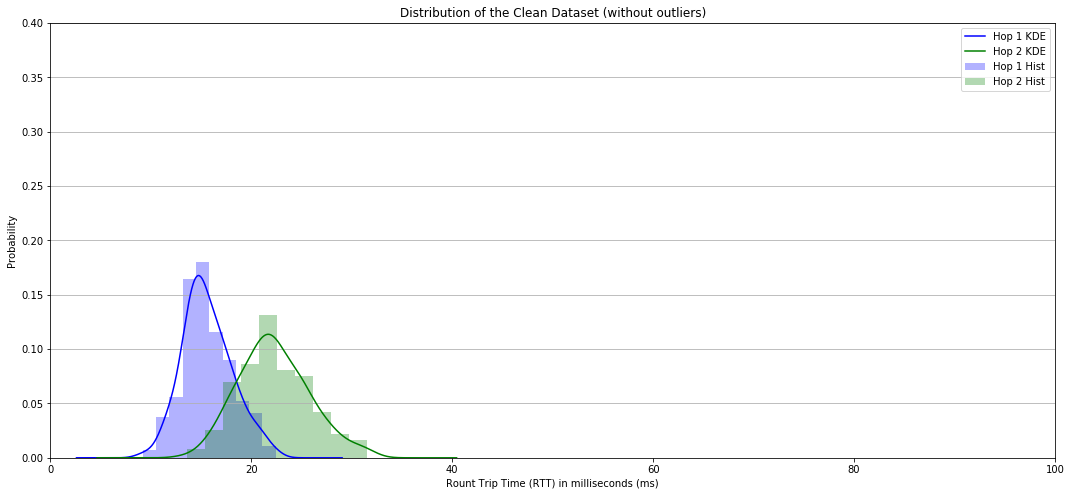

In [42]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values2.keys():
    hop_std_values2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

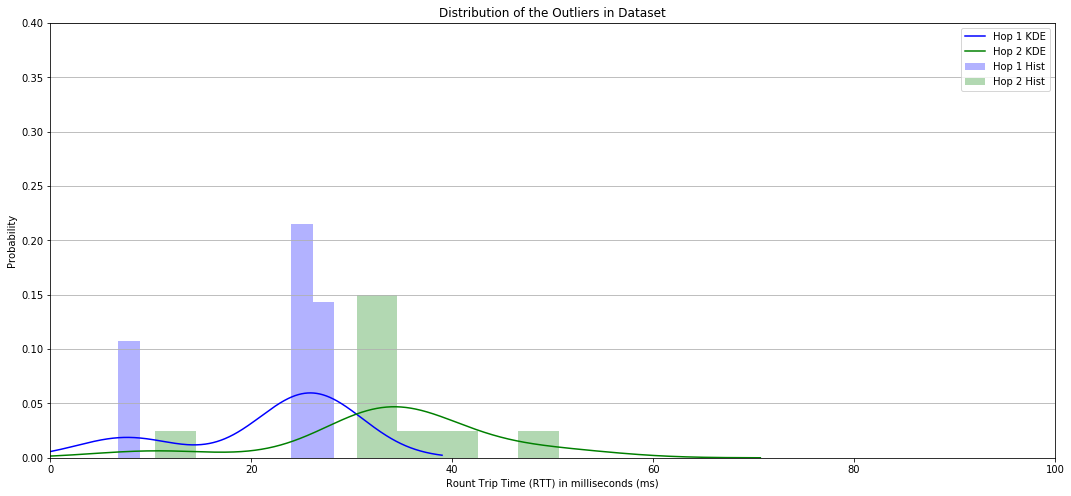

In [43]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers2.keys():
    hop_outliers2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


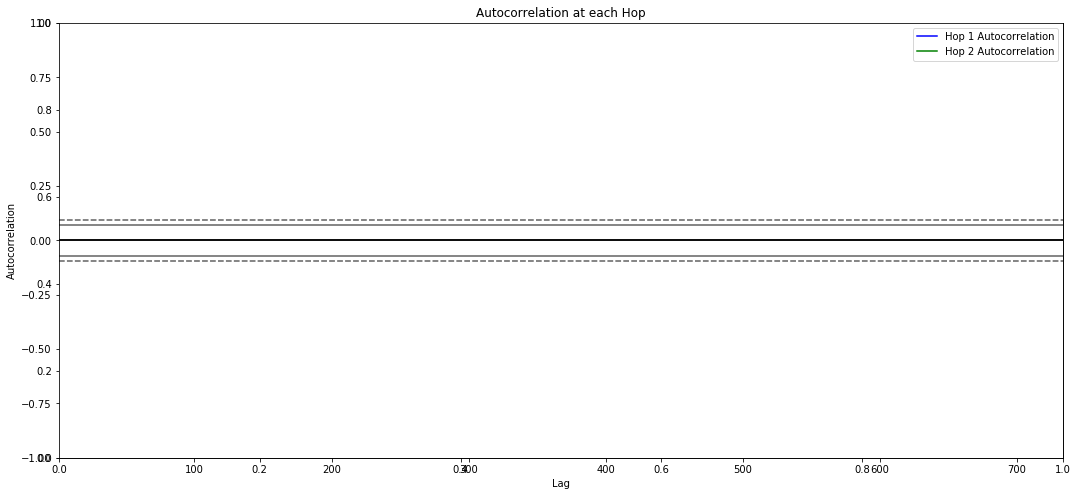

In [44]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    autocorrelation_plot(hop_nodes2[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

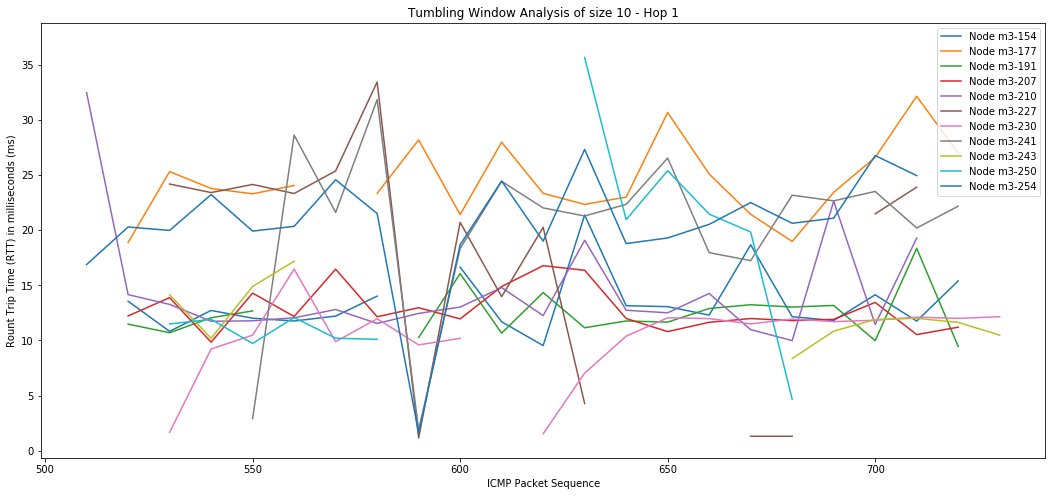

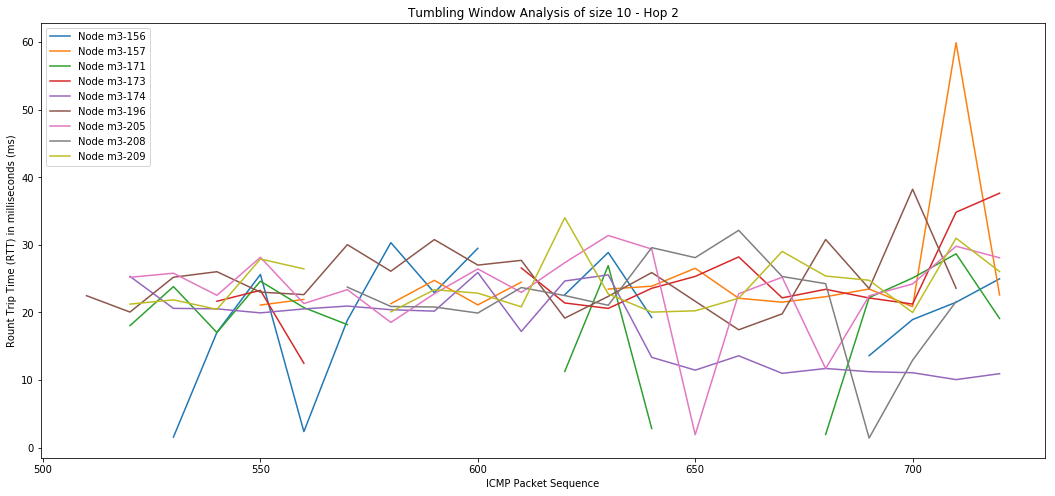

In [45]:
window_size = 10
for h in hops2.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes2:
        if node in hops2[h]:
            plt.plot(nodes2[node].groupby(nodes2[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by hop tumbling window

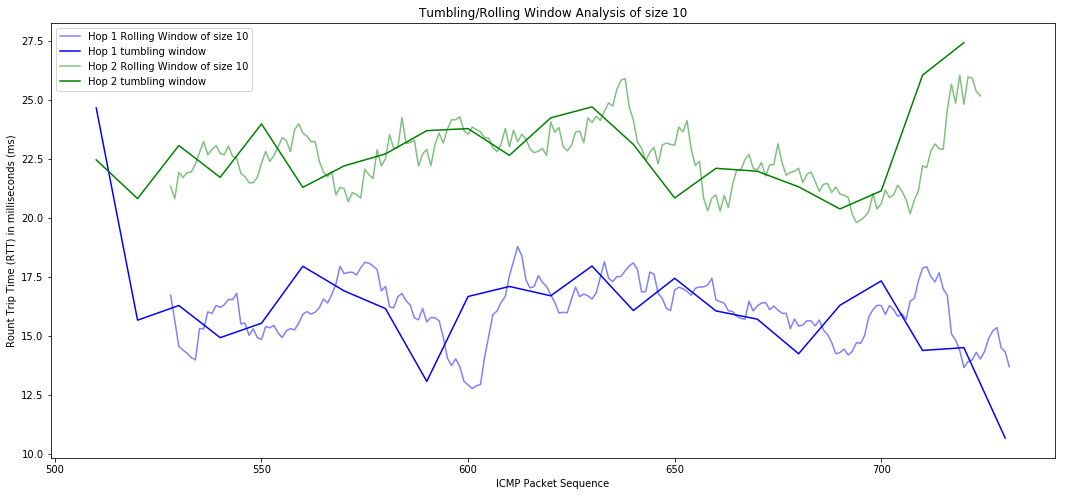

In [46]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes2.keys():
    plt.plot(hop_nodes2[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes2[hop].groupby(hop_nodes2[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

Outliers

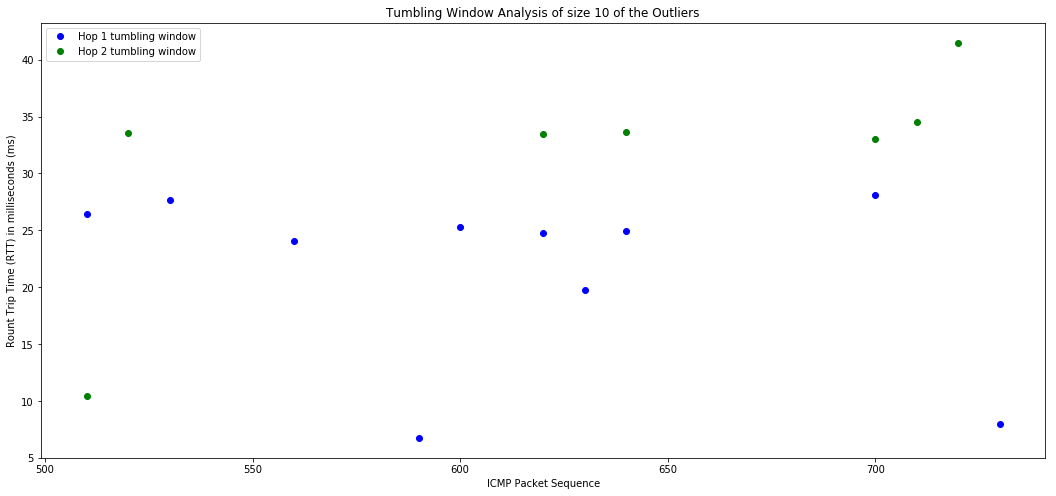

In [47]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes2.keys():
    plt.plot(hop_outliers2[hop].groupby(hop_outliers2[hop].index // window_size * window_size).mean(), 'o', color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' of the Outliers')
plt.legend()

### Statistics

For each hop

In [48]:
hop_nodes2.describe()

1           2
count  215.000000  210.000000
mean    15.997701   22.808352
std      3.398552    4.687420
min      6.769000   10.439500
25%     13.889106   19.992600
50%     15.415500   22.217850
75%     17.478400   24.859104
max     28.248000   50.600000

For each node

In [49]:
nodes2.describe()

m3-154     m3-156      m3-157     m3-171     m3-173      m3-174  \
count  156.000000  67.000000  101.000000  63.000000  82.000000  167.000000   
mean    12.806391  21.709821   23.170931  22.098397  24.462646   16.921048   
std      4.350660  10.864445    6.700546  10.113584  10.481589    7.205470   
min      7.953000   1.472000   15.280000   1.851000   7.302000    1.989000   
25%      9.875000  18.221500   19.100000  18.133000  18.441750   10.845500   
50%     11.475500  20.780000   21.660000  19.726000  20.923500   17.007000   
75%     14.278500  25.129000   25.778000  23.649000  26.673250   20.197500   
max     33.882000  76.635000   59.909000  60.145000  74.009000   48.886000   

           m3-177     m3-191      m3-196      m3-205      m3-207      m3-208  \
count  132.000000  131.00000  152.000000  161.000000  187.000000  106.000000   
mean    24.319265   12.35971   24.857355   24.333876   12.844519   23.139698   
std      8.922154    5.30803    9.898105   10.125669    5.980906   11.610222   
min     15.363000    7.54000    1.519000    1.493000    7.286000    1.006000   
25%     18.820250    9.45500   18.818750   19.383000    9.716500   17.843500   
50%     21.406000   10.41300   22.240000   21.638000   10.795000   20.149000   
75%     25.460000   13.10800   26.084250   26.050000   13.590500   23.809000   
max     77.178000   48.68600   69.269000   69.246000   39.327000   82.969000   

           m3-209      m3-210     m3-227      m3-230      m3-241     m3-243  \
count  167.000000  173.000000  80.000000  158.000000  116.000000  83.000000   
mean    23.887084   13.545919  22.215362   11.152462   23.548526  11.874867   
std      9.359537    7.320365   9.021114    3.673220   12.458374   4.883763   
min     15.023000    2.335000   1.143000    1.011000    1.345000   1.531000   
25%     18.601000    9.430000  18.818250    9.326750   18.258750   9.431000   
50%     20.853000   11.470000  21.758500   10.743000   20.184500  10.858000   
75%     25.026000   14.163000  24.825750   12.671250   24.962750  13.709500   
max     78.696000   51.137000  55.737000   38.978000   89.636000  37.073000   

          m3-250      m3-254  
count  85.000000  166.000000  
mean   15.432376   21.214157  
std     8.609214    7.880740  
min     4.667000    1.223000  
25%     9.597000   18.087250  
50%    10.949000   19.591500  
75%    20.152000   21.649250  
max    52.092000   83.682000

Loss

In [50]:
pd.DataFrame([[h, str((len(hop_nodes2[h]) - hop_nodes2[h].count())/len(hop_nodes2[h])*100) +'%'] 
              for h in hop_nodes2.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1       70.7084468665%
1    2       71.3896457766%

In [51]:
pd.DataFrame([[n, h, str((len(nodes2[n]) - nodes2[n].count())/len(nodes2[n])*100) +'%'] 
              for n in nodes2.keys() for h in hops2.keys() if n in hops2[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
0   m3-154    1       78.7465940054%
17  m3-243    1       88.6920980926%
16  m3-241    1       84.1961852861%
15  m3-230    1       78.4741144414%
14  m3-227    1       89.1008174387%
13  m3-210    1       76.4305177112%
10  m3-207    1       74.5231607629%
18  m3-250    1       88.4196185286%
19  m3-254    1       77.3841961853%
7   m3-191    1       82.1525885559%
6   m3-177    1       82.0163487738%
11  m3-208    2       85.5585831063%
12  m3-209    2       77.2479564033%
5   m3-174    2       77.2479564033%
4   m3-173    2       88.8283378747%
3   m3-171    2        91.416893733%
2   m3-157    2       86.2397820163%
1   m3-156    2       90.8719346049%
8   m3-196    2       79.2915531335%
9   m3-205    2       78.0653950954%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

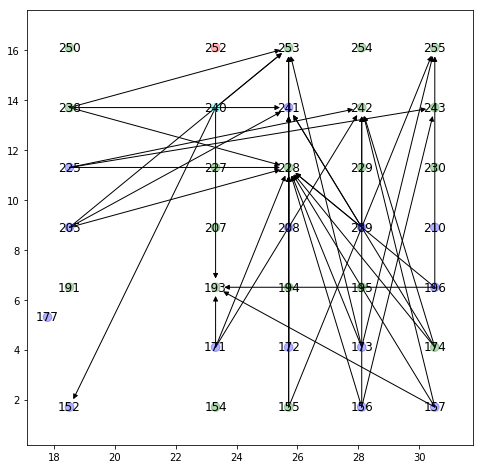

In [39]:
G2 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-29-2')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G2, pos=nx.get_node_attributes(G2,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G2,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G2, pos=nx.get_node_attributes(G2,'loc'), labels=nx.get_node_attributes(G2,'id'))
nx.draw_networkx_edges(G2, pos=nx.get_node_attributes(G2,'loc'))
plt.show()

# 3rd Trace 
## Normal part
Parse the 3rd trace file with 200 normal packets over a network without any attacker.

In [4]:
nodes3, hops3 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-29-3')
std_values3, outliers3 = trace_analysis.separate_outliers_node_by_node(nodes3)

hop_nodes3 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-29-3')
hop_std_values3, hop_outliers3 = trace_analysis.separate_outliers(hop_nodes3)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

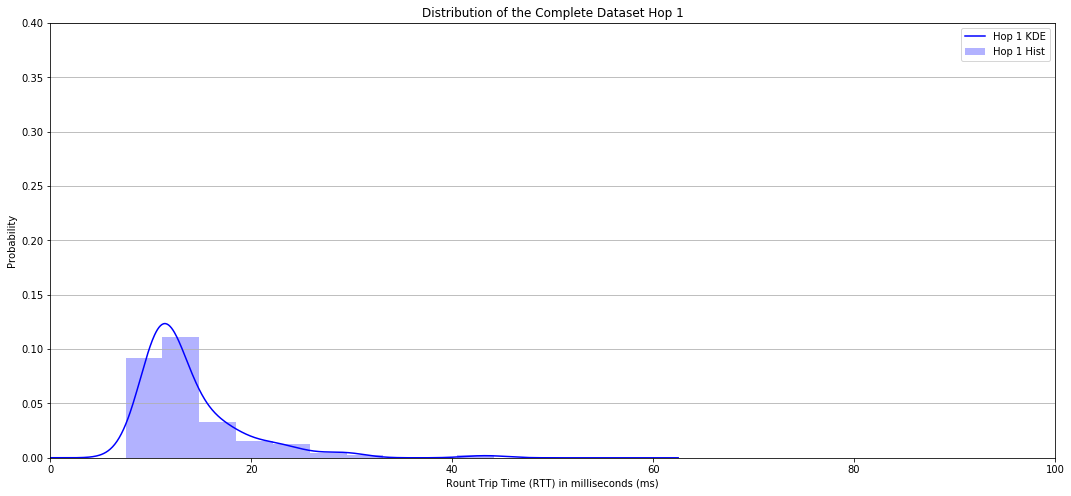

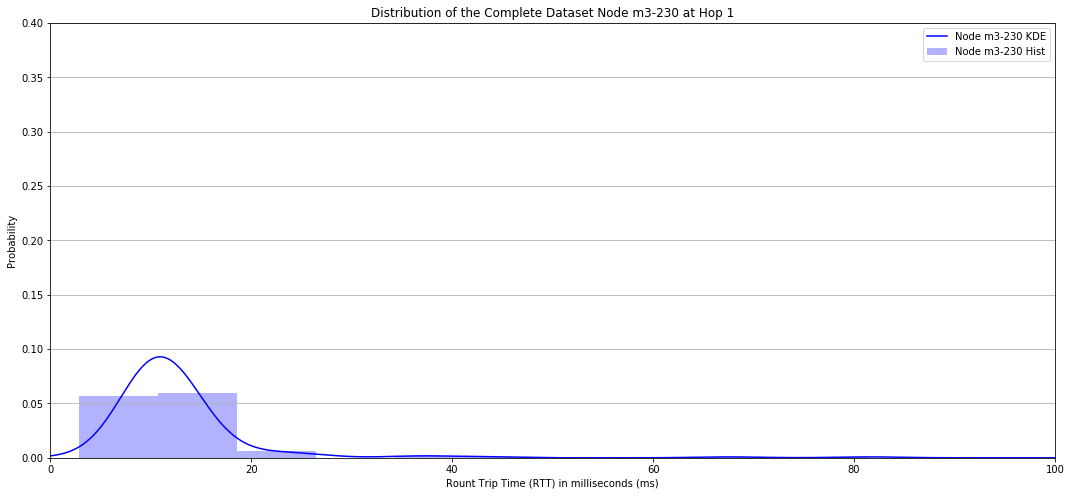

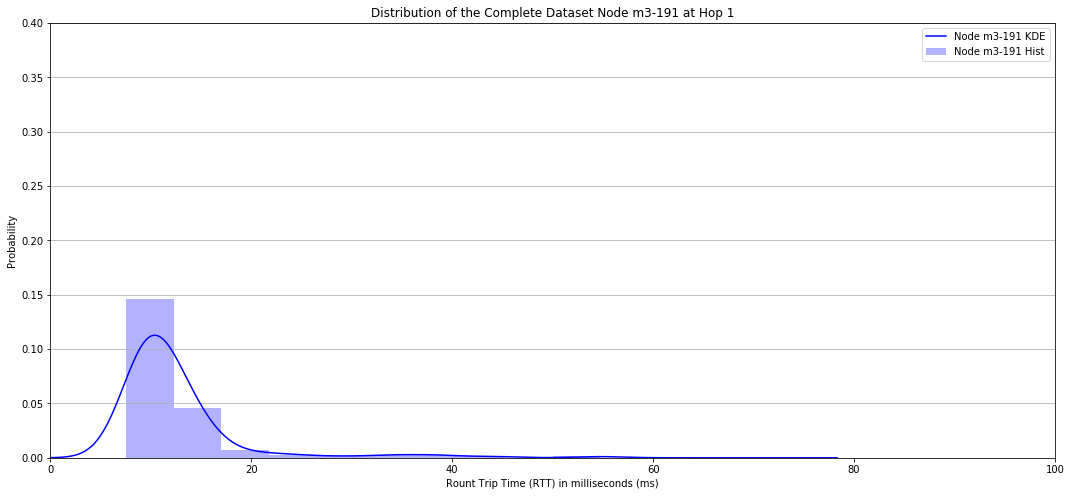

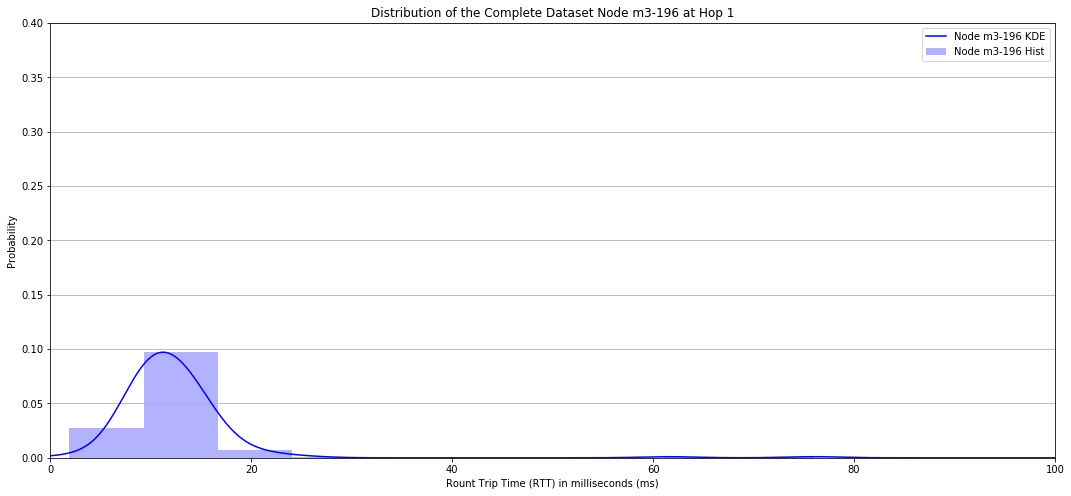

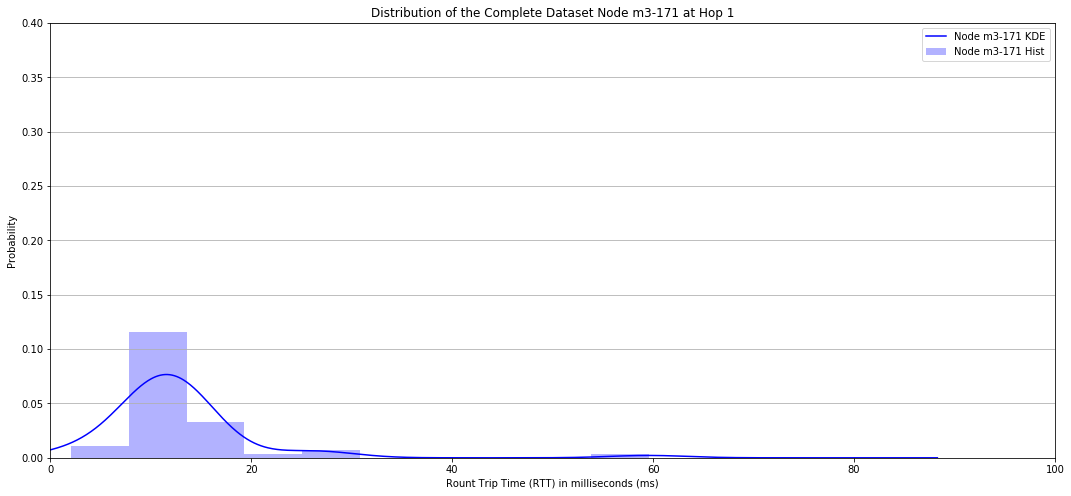

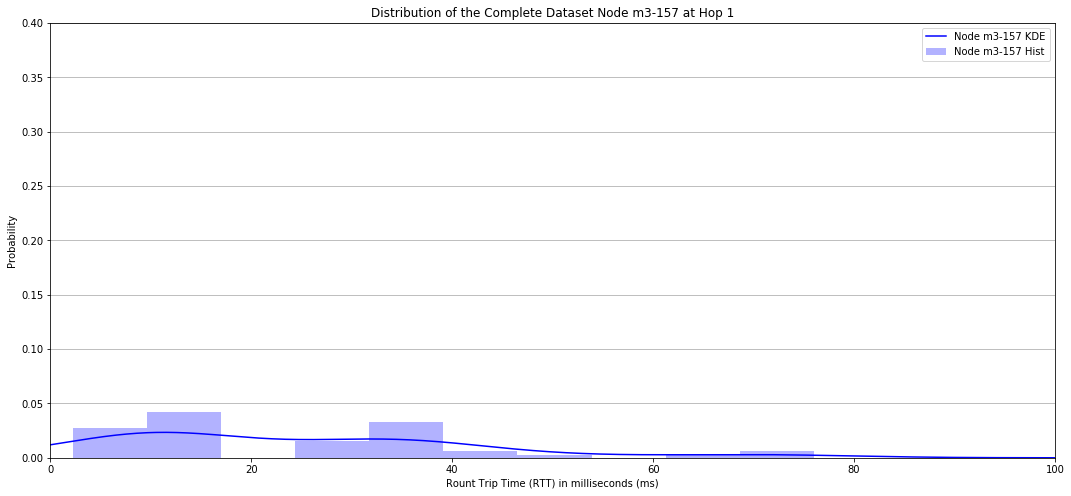

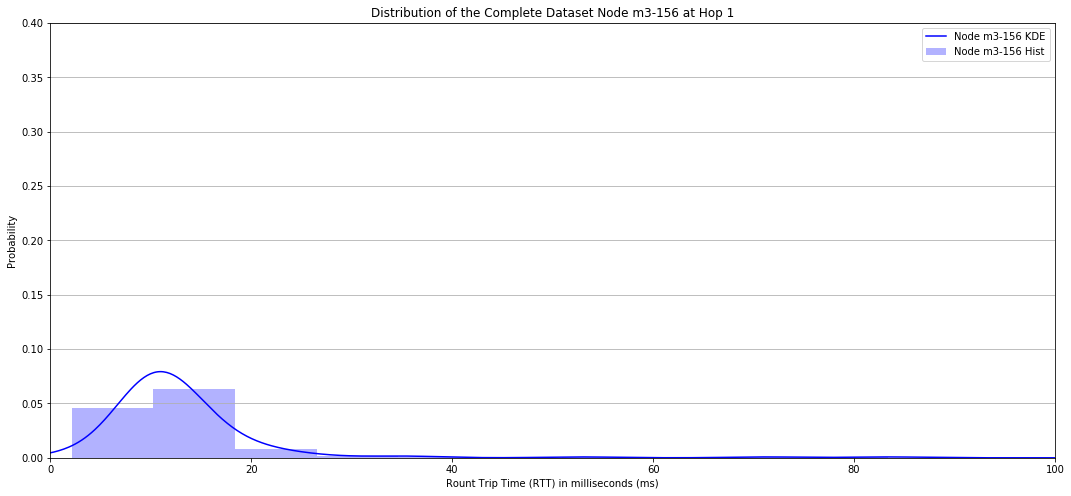

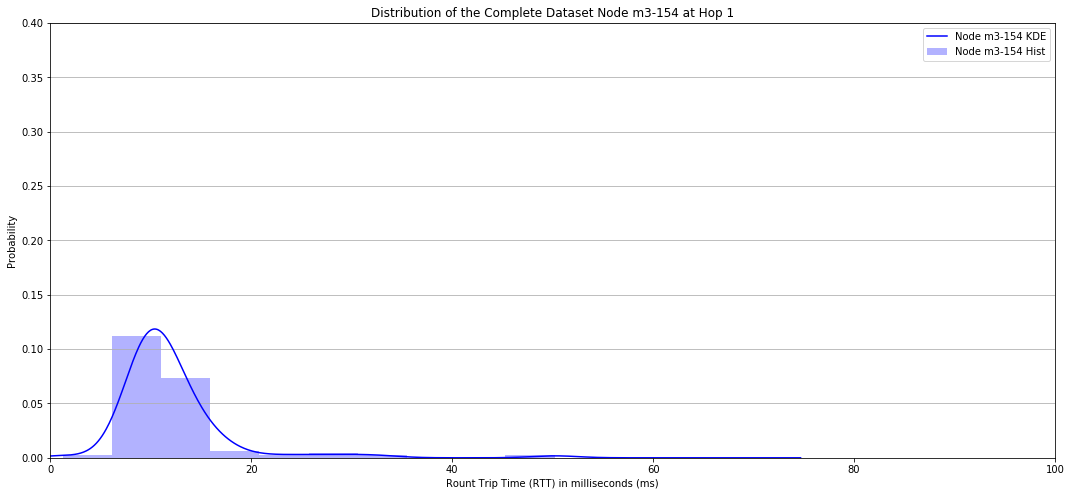

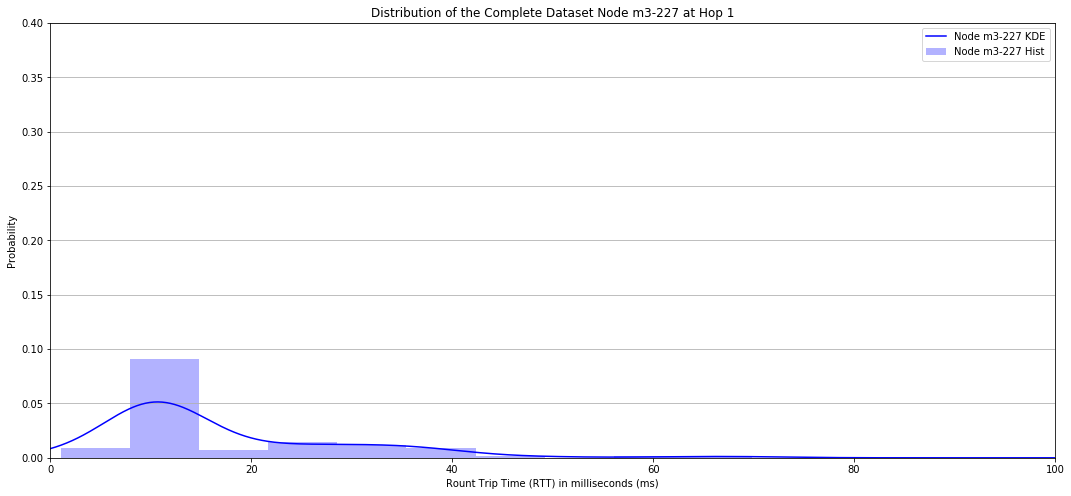

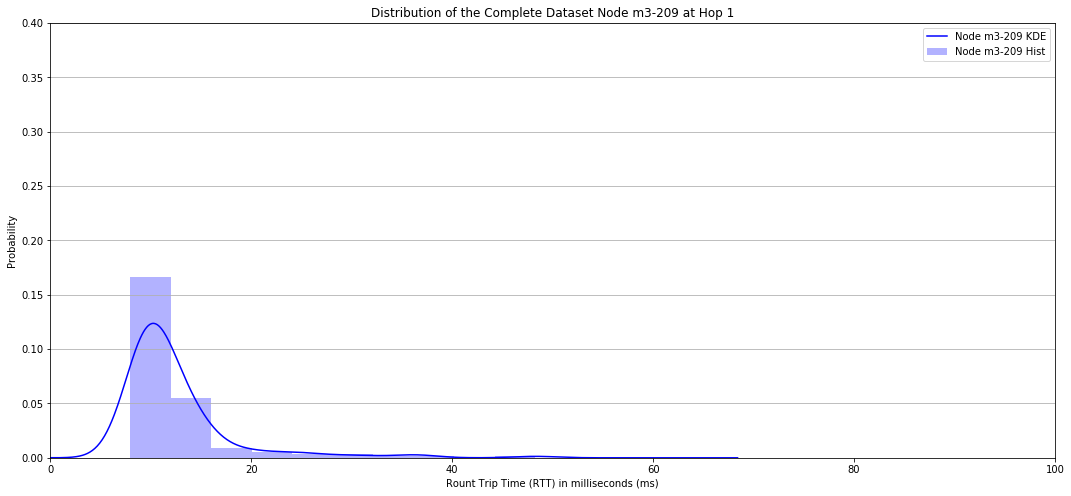

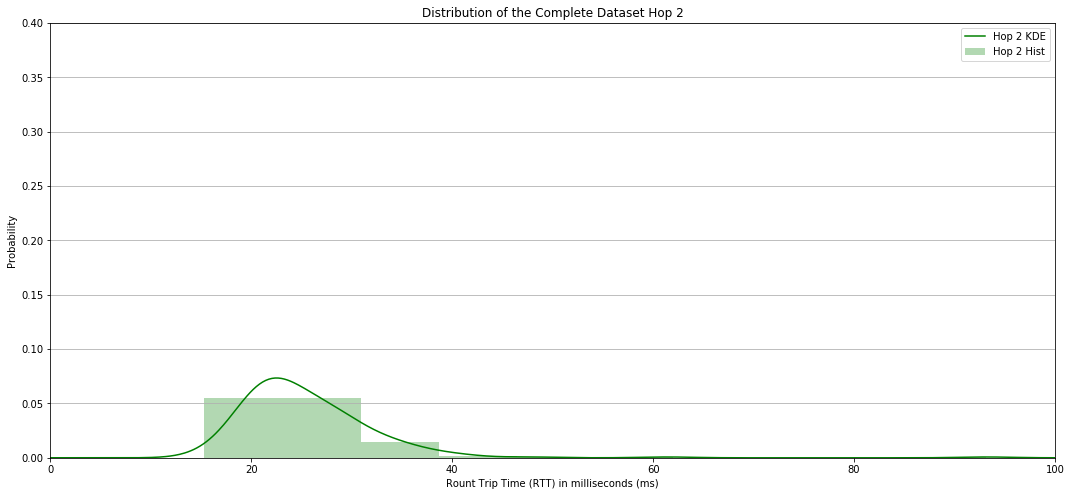

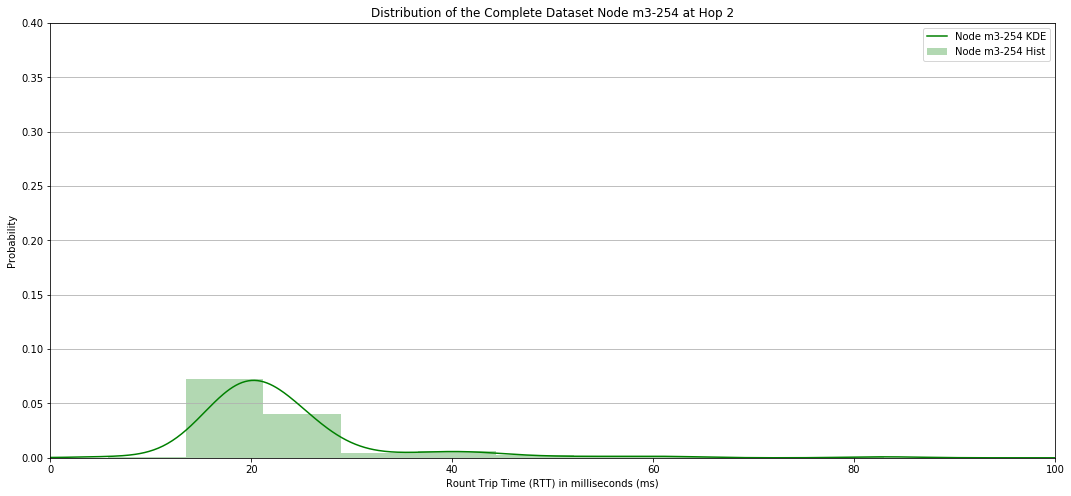

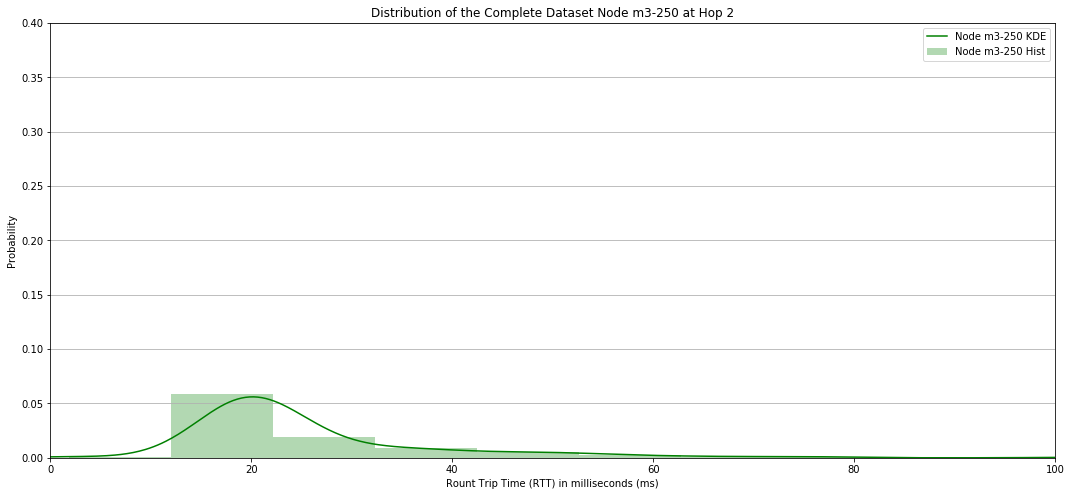

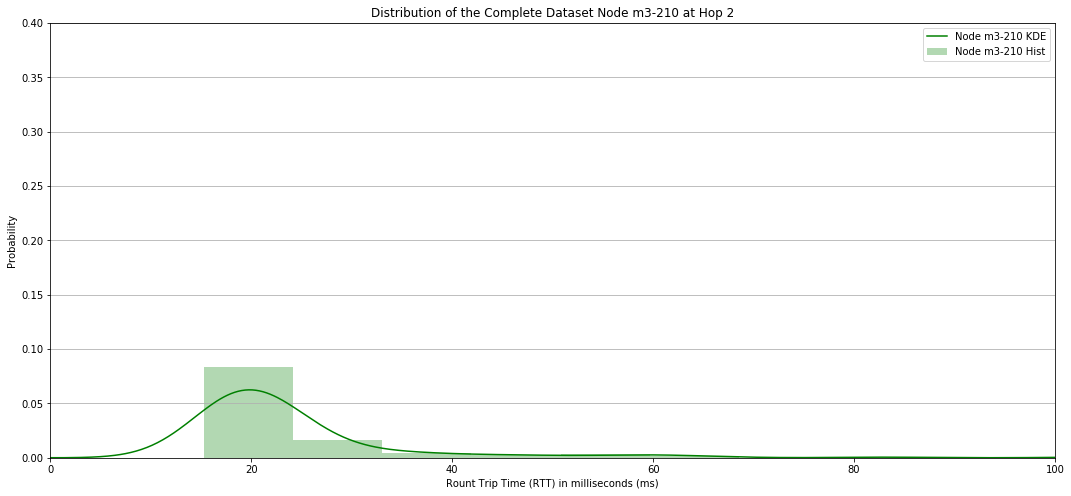

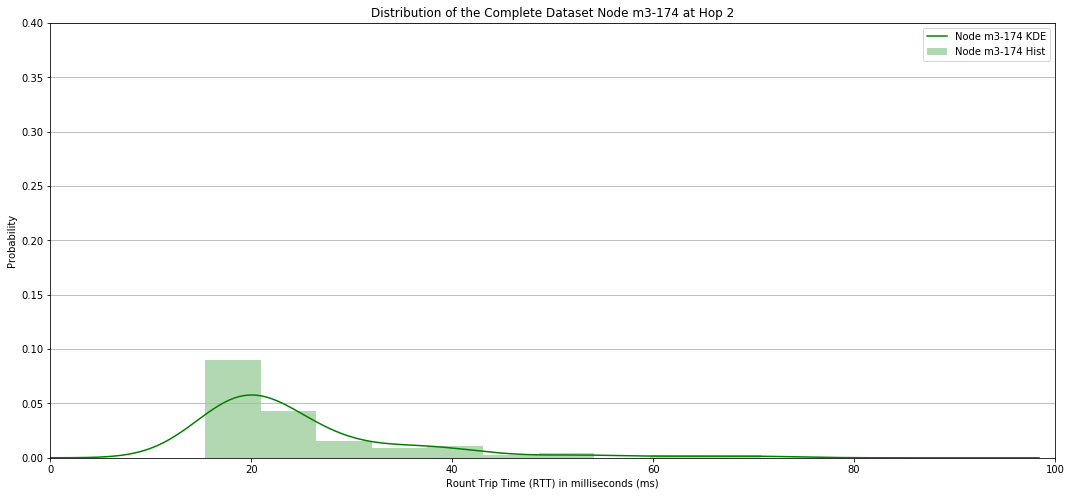

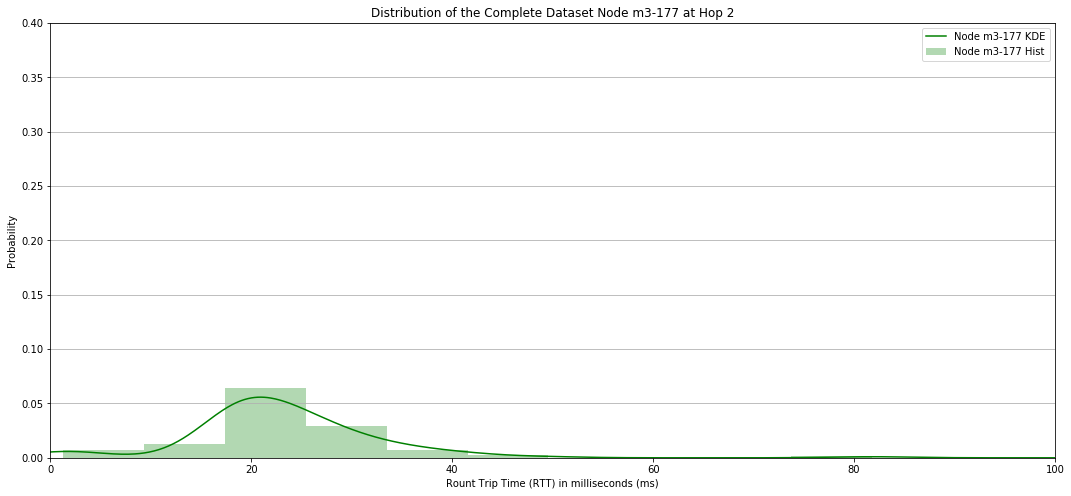

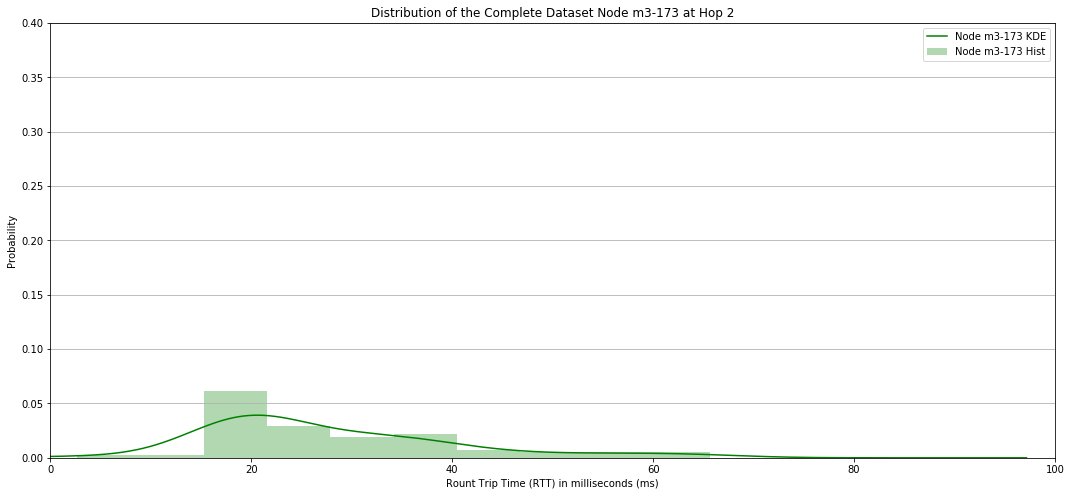

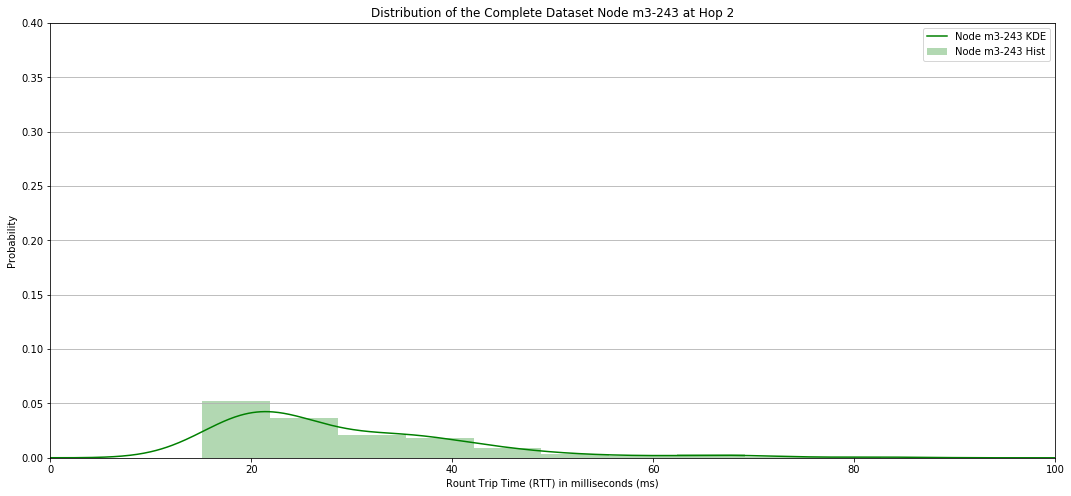

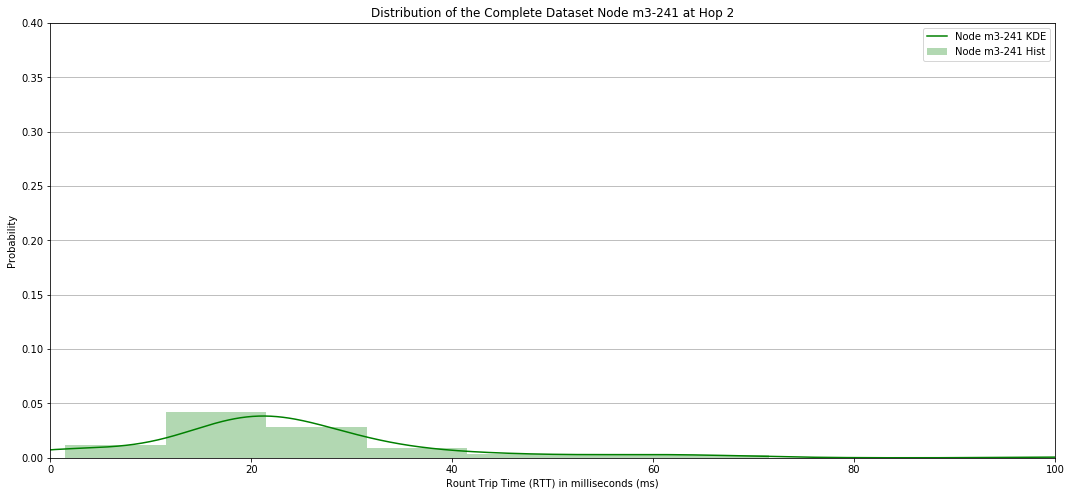

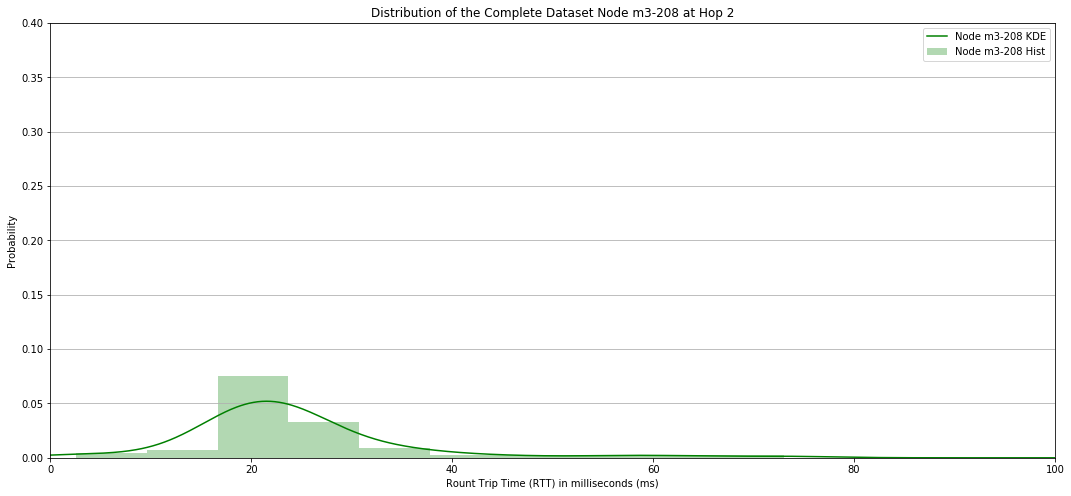

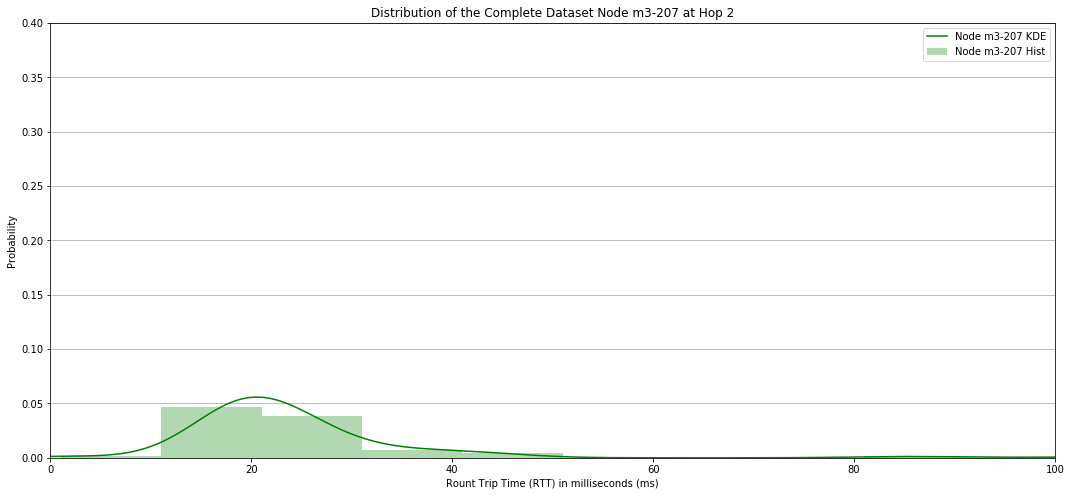

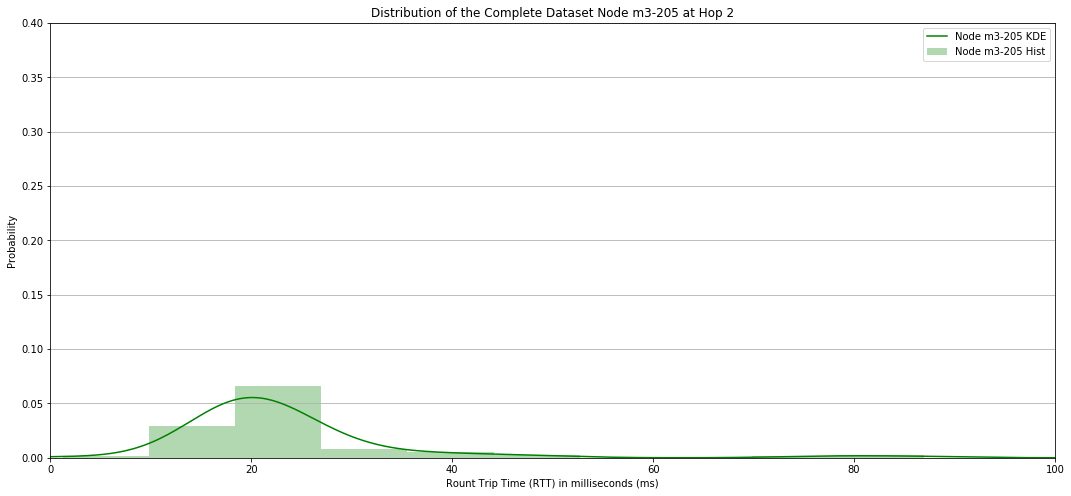

In [52]:
for hop in hops3.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops3[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes3[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes3[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Compare Hops

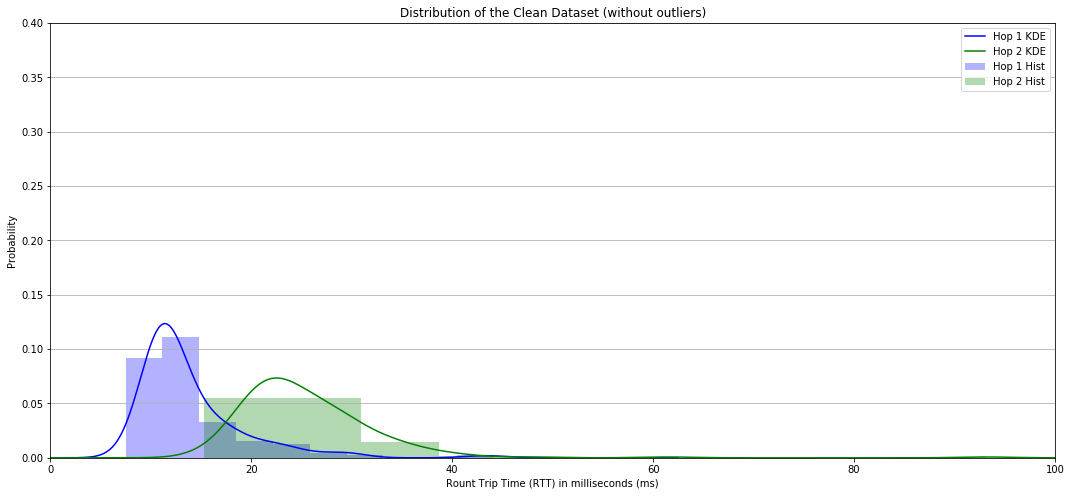

In [53]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    hop_nodes3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

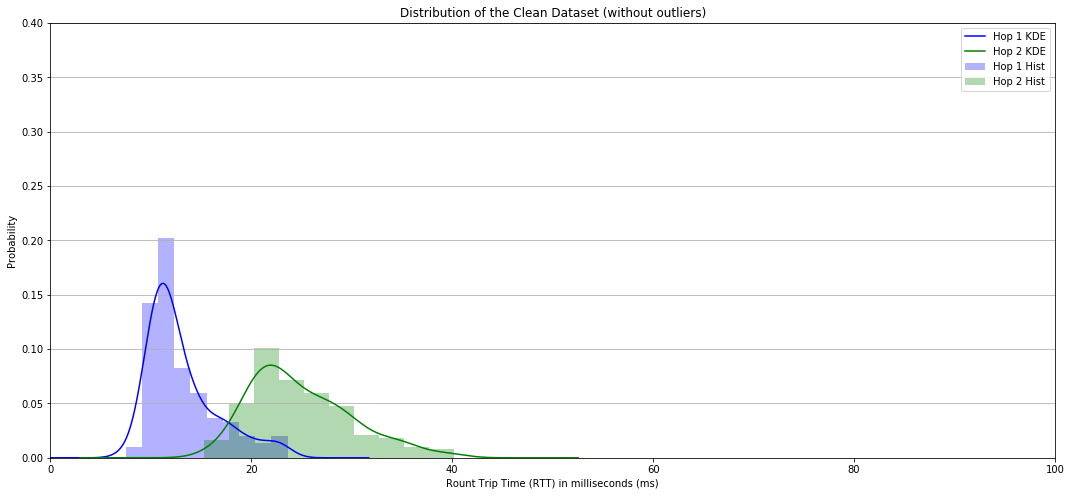

In [54]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values3.keys():
    hop_std_values3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

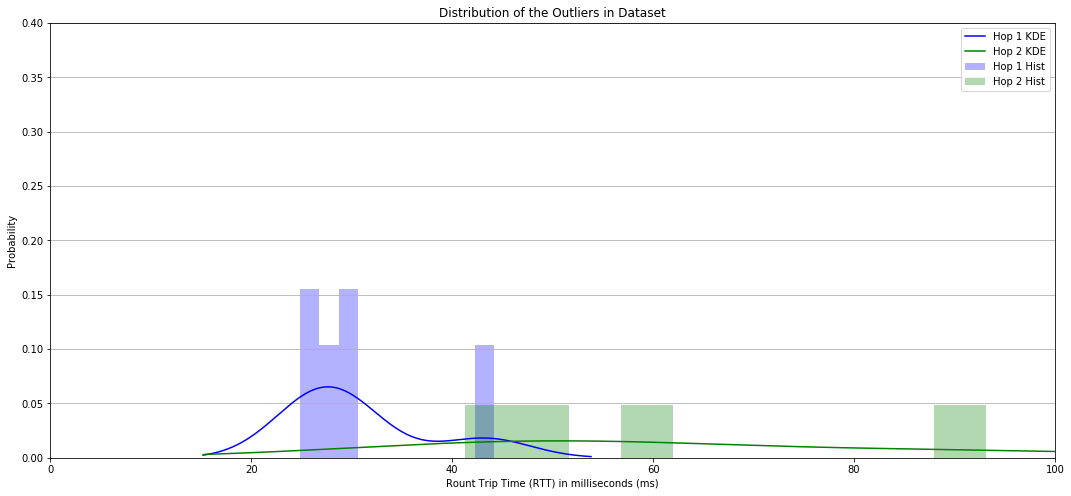

In [55]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers3.keys():
    hop_outliers3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


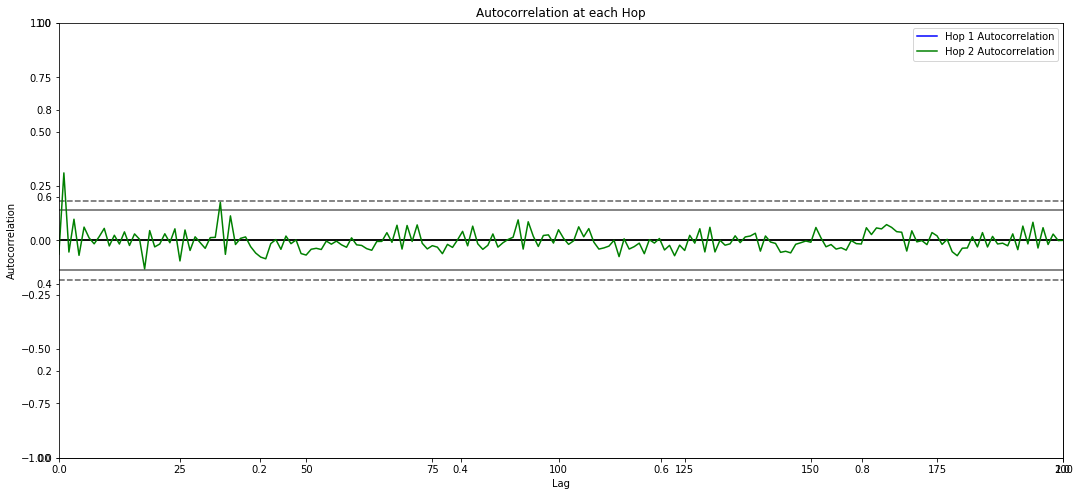

In [56]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    autocorrelation_plot(hop_nodes3[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

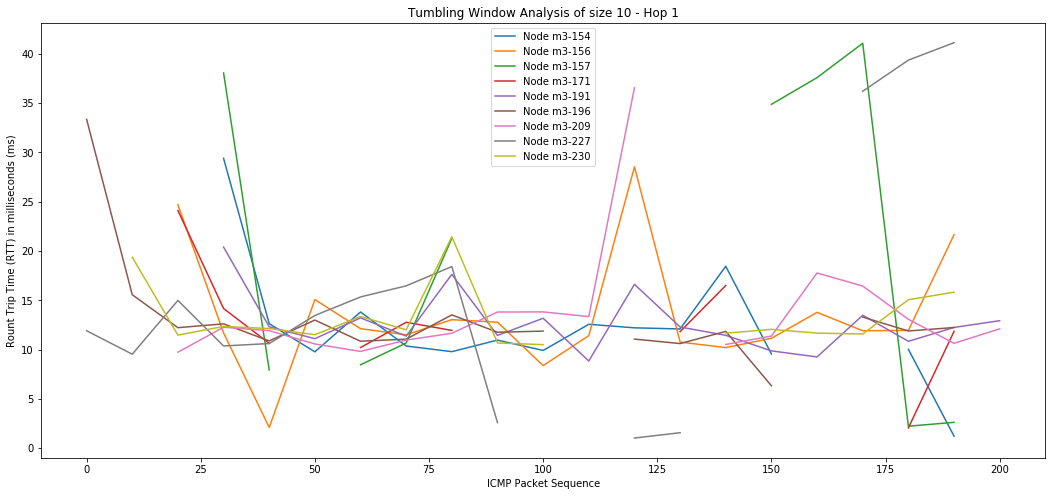

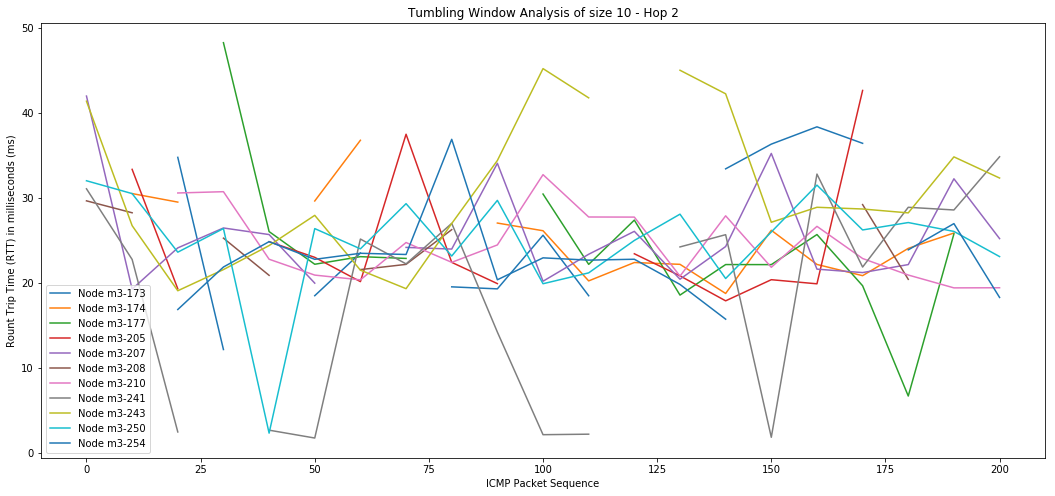

In [57]:
window_size = 10
for h in hops3.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes3:
        if node in hops3[h]:
            plt.plot(nodes3[node].groupby(nodes3[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by hop tumbling window

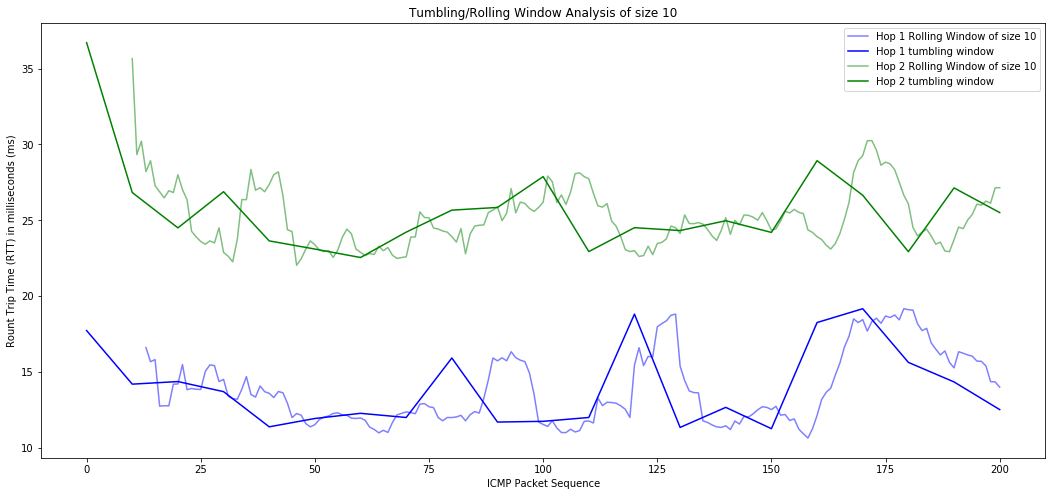

In [58]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes3.keys():
    plt.plot(hop_nodes3[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes3[hop].groupby(hop_nodes3[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

Outliers

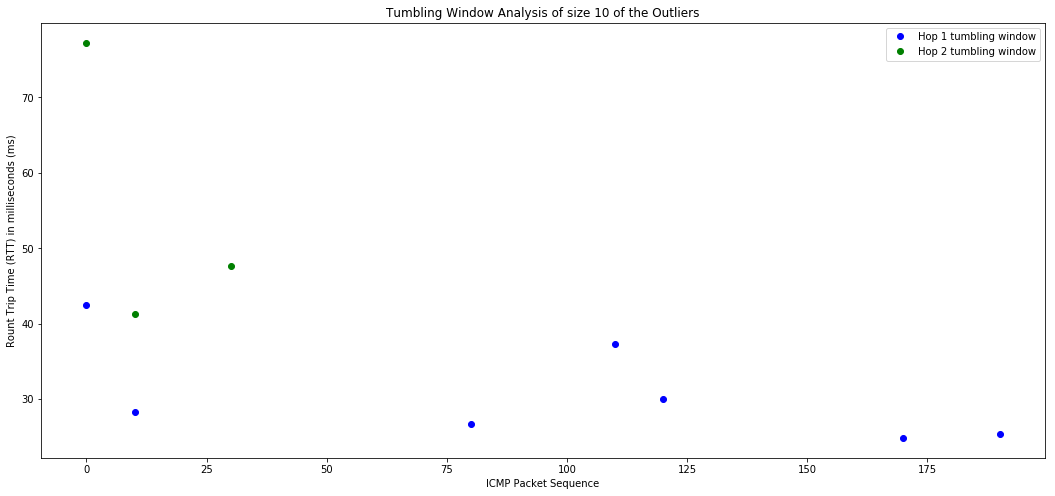

In [59]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes3.keys():
    plt.plot(hop_outliers3[hop].groupby(hop_outliers3[hop].index // window_size * window_size).mean(), 'o', color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' of the Outliers')
plt.legend()

### Statistics

For each hop

In [60]:
hop_nodes3.describe()

1           2
count  197.000000  200.000000
mean    13.932591   25.664811
std      5.344284    7.636387
min      7.483000   15.316000
25%     10.846800   21.249554
50%     12.084000   24.111500
75%     15.053833   28.442062
max     44.160000   93.148500

For each node

In [61]:
nodes3.describe()

m3-154      m3-156     m3-157     m3-171     m3-173     m3-174  \
count  95.000000  137.000000  45.000000  48.000000  65.000000  80.000000   
mean   12.080600   13.418453  24.577311  12.979062  27.814523  24.996263   
std     5.819611    9.824500  18.021516   8.358957  12.571228  10.673685   
min     1.216000    2.100000   2.224000   2.058000   2.670000  15.391000   
25%     9.329500    9.585000   9.973000   9.425000  18.788000  18.271000   
50%    10.514000   10.870000  14.886000  11.700500  23.528000  20.984500   
75%    12.681500   13.882000  35.185000  13.588000  34.499000  26.789000   
max    50.194000   83.407000  76.016000  59.555000  65.671000  70.746000   

           m3-177      m3-191      m3-196     m3-205     ...         m3-208  \
count  101.000000  149.000000  138.000000  88.000000     ...      60.000000   
mean    23.274663   12.604362   12.598181  23.947080     ...      24.492300   
std     10.176720    6.761786    7.605726  12.838947     ...      11.522383   
min      1.245000    7.555000    1.853000   1.273000     ...       2.551000   
25%     18.598000    9.469000    9.505000  18.111750     ...      18.749000   
50%     21.277000   10.748000   11.364000  20.579500     ...      22.225500   
75%     26.918000   12.935000   13.913000  24.715500     ...      25.347250   
max     81.811000   54.737000   75.979000  86.957000     ...      73.008000   

           m3-209      m3-210      m3-227      m3-230      m3-241      m3-243  \
count  139.000000  148.000000  101.000000  147.000000   93.000000  144.000000   
mean    12.421590   24.250865   17.212158   13.060741   24.217935   29.323583   
std      5.822909   12.570827   12.320622    8.905445   15.589873   12.410659   
min      7.949000   15.249000    1.025000    2.846000    1.448000   15.077000   
25%      9.549000   18.357000    9.669000    9.508000   18.023000   20.168750   
50%     10.511000   20.359000   11.450000   11.107000   20.822000   25.228500   
75%     13.000000   24.225000   23.785000   13.253000   27.222000   35.793250   
max     48.257000  104.153000   69.860000   81.534000  101.574000   82.699000   

           m3-250  m3-252      m3-254  
count  172.000000   1.000  120.000000  
mean    25.840762   1.172   23.403650  
std     13.294891     NaN    9.825053  
min      1.892000   1.172    5.755000  
25%     18.633250   1.172   18.462250  
50%     20.905500   1.172   20.665000  
75%     26.061500   1.172   24.150250  
max    103.394000   1.172   82.958000  

[8 rows x 21 columns]

Loss

In [62]:
pd.DataFrame([[h, str((len(hop_nodes3[h]) - hop_nodes3[h].count())/len(hop_nodes3[h])*100) +'%'] 
              for h in hop_nodes3.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 1.5%
1    2                 0.0%

In [63]:
pd.DataFrame([[n, h, str((len(nodes3[n]) - nodes3[n].count())/len(nodes3[n])*100) +'%'] 
              for n in nodes3.keys() for h in hops3.keys() if n in hops3[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
0   m3-154    1                52.5%
1   m3-156    1                31.5%
2   m3-157    1                77.5%
3   m3-171    1                76.0%
15  m3-230    1                26.5%
7   m3-191    1                25.5%
8   m3-196    1                31.0%
14  m3-227    1                49.5%
12  m3-209    1                30.5%
17  m3-243    2                28.0%
16  m3-241    2                53.5%
13  m3-210    2                26.0%
9   m3-205    2                56.0%
10  m3-207    2                38.5%
18  m3-250    2                14.0%
6   m3-177    2                49.5%
5   m3-174    2                60.0%
4   m3-173    2                67.5%
11  m3-208    2                70.0%
19  m3-254    2                40.0%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

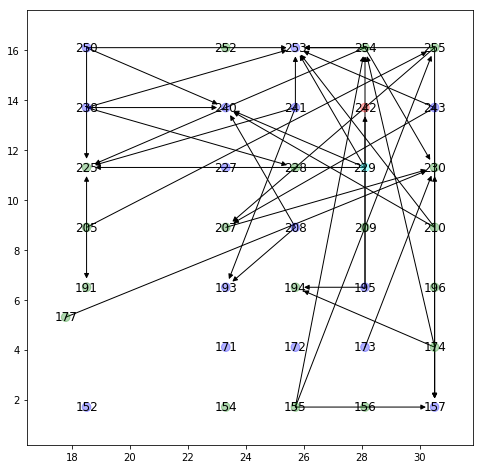

In [50]:
G3 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-29-3')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G3, pos=nx.get_node_attributes(G3,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G3,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G3, pos=nx.get_node_attributes(G3,'loc'), labels=nx.get_node_attributes(G3,'id'))
nx.draw_networkx_edges(G3, pos=nx.get_node_attributes(G3,'loc'))
plt.show()

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

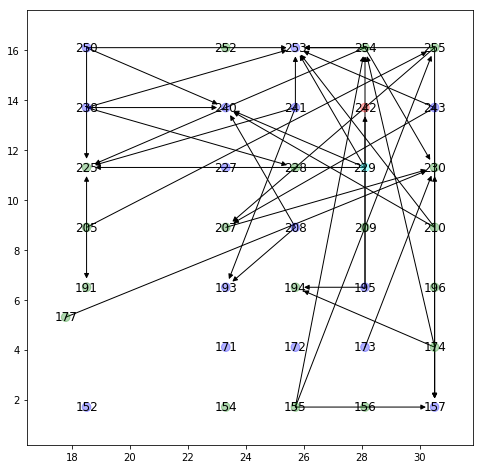

In [50]:
G3 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-29-3')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G3, pos=nx.get_node_attributes(G3,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G3,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G3, pos=nx.get_node_attributes(G3,'loc'), labels=nx.get_node_attributes(G3,'id'))
nx.draw_networkx_edges(G3, pos=nx.get_node_attributes(G3,'loc'))
plt.show()

## Attacker activated
Parse the 3rd trace file with 100 packets with 1 active attacker.

In [5]:
nodes3b, hops3b = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-29-3b241')
std_values3b, outliers3b = trace_analysis.separate_outliers_node_by_node(nodes3b)

hop_nodes3b = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-29-3b241')
hop_std_values3b, hop_outliers3b = trace_analysis.separate_outliers(hop_nodes3b)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


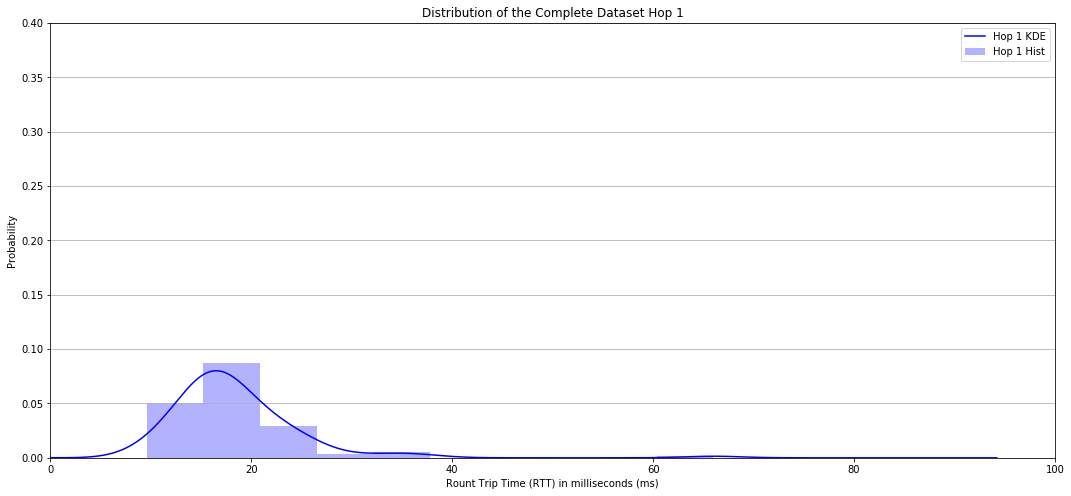

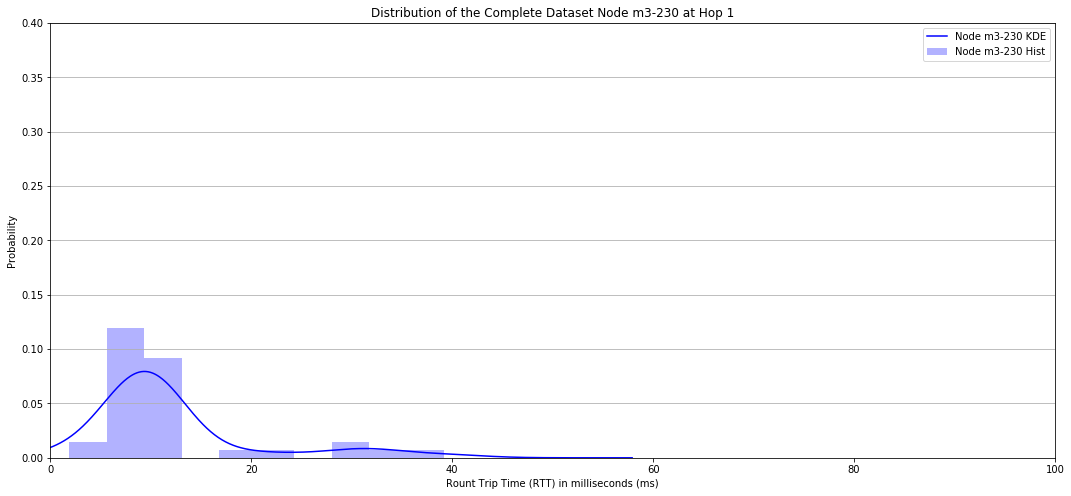

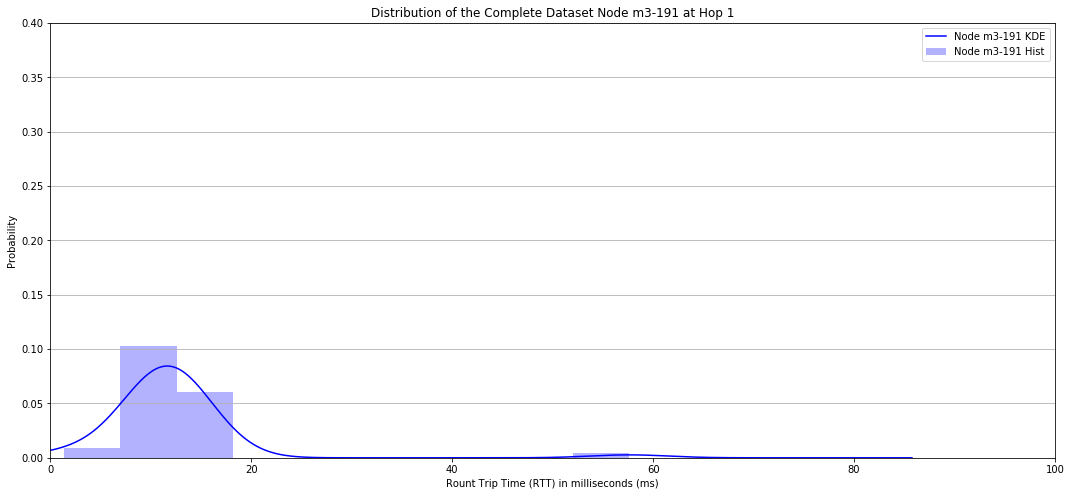

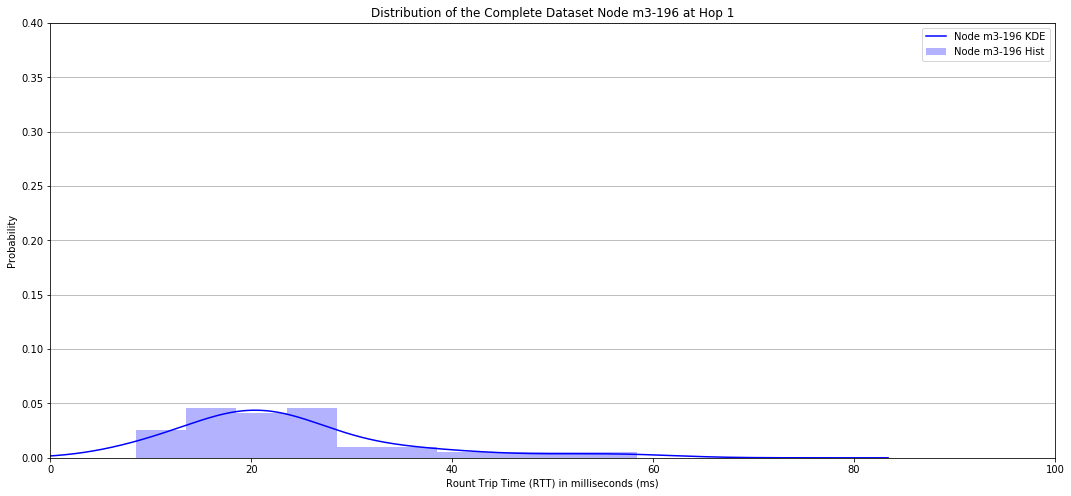

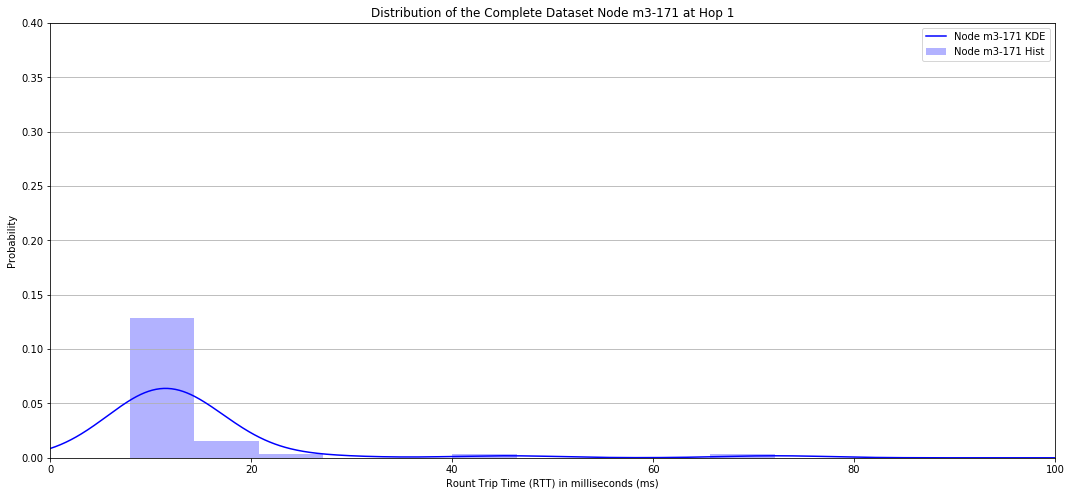

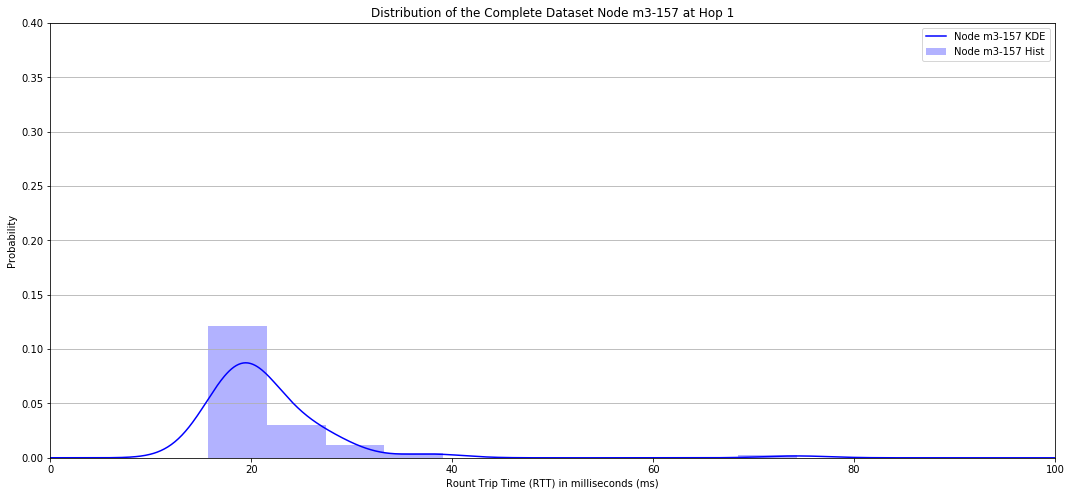

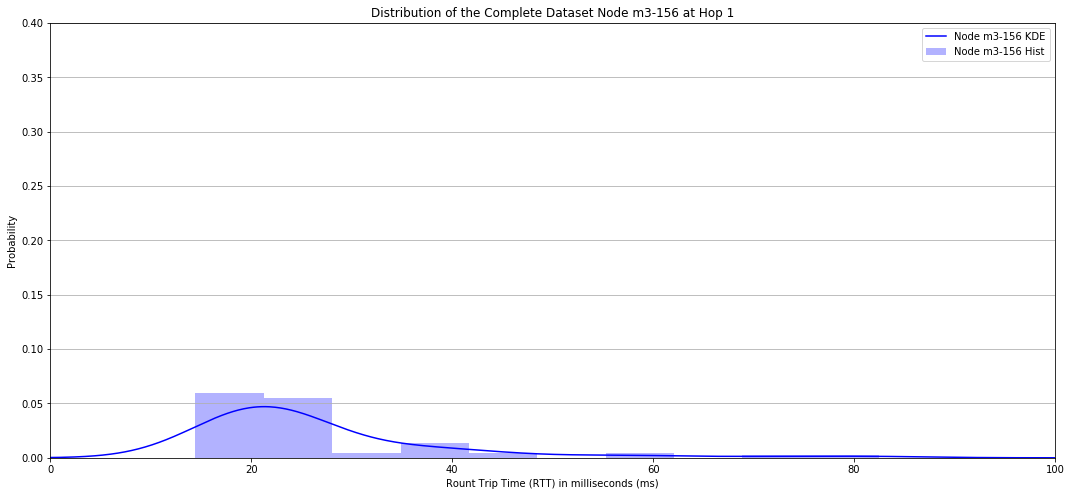

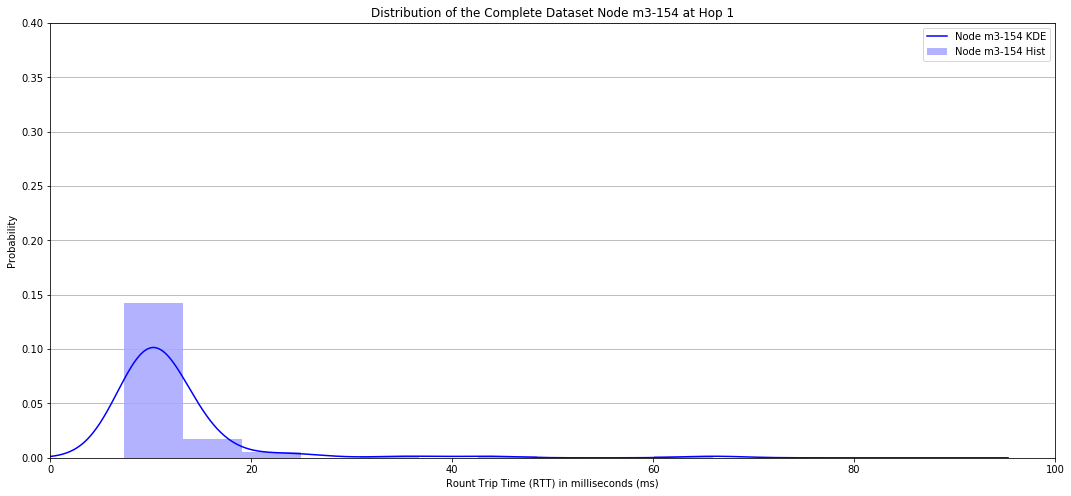

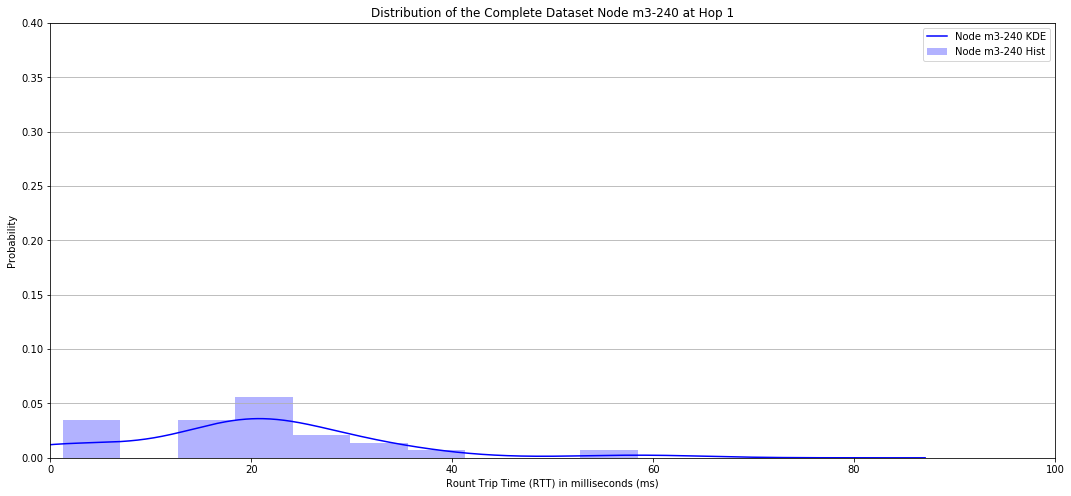

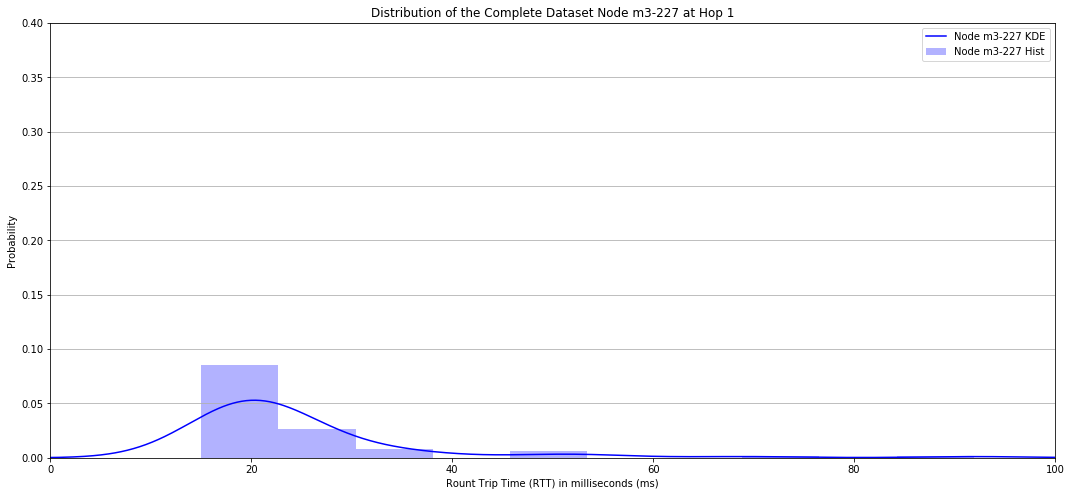

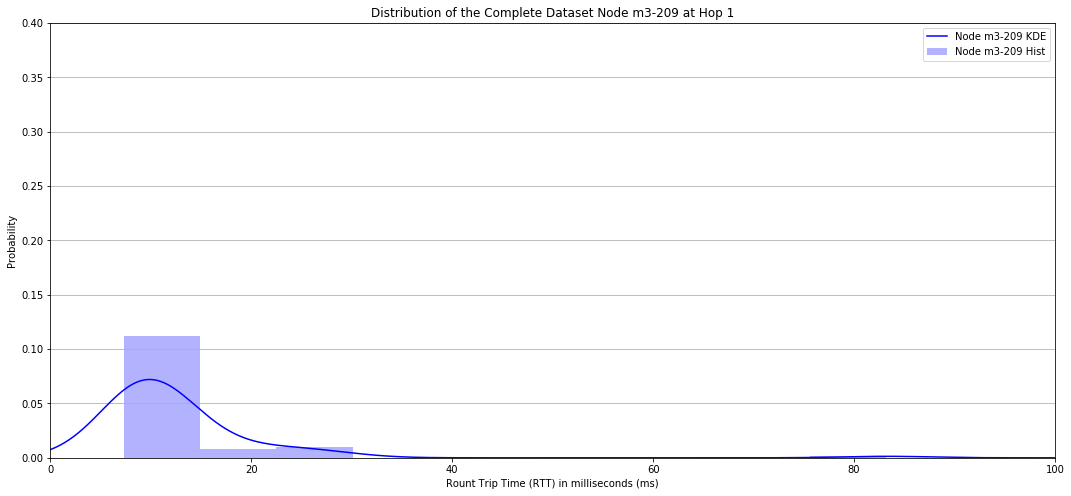

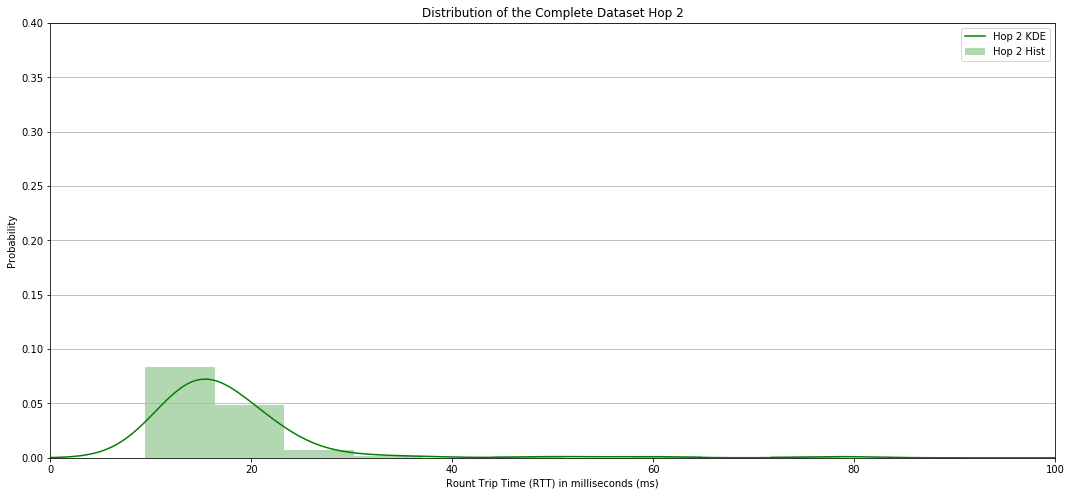

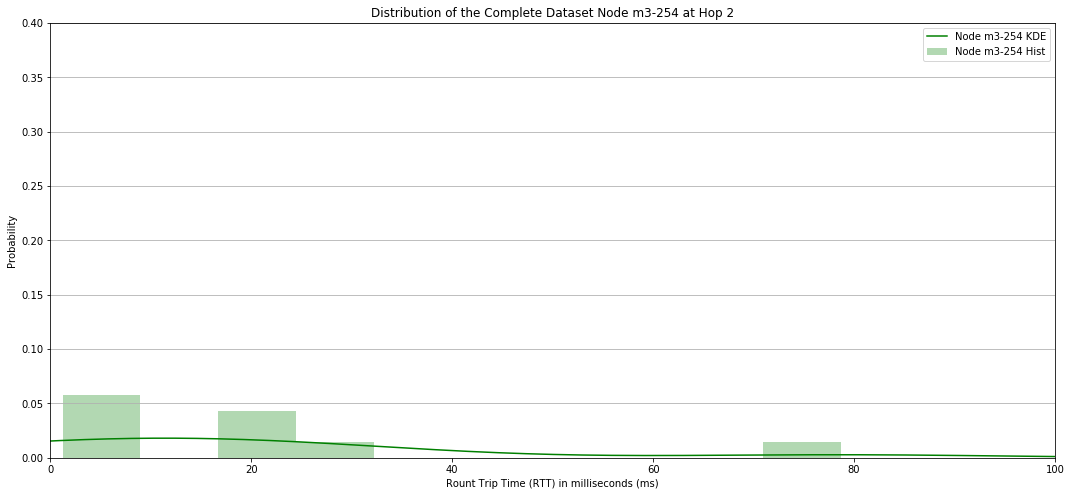

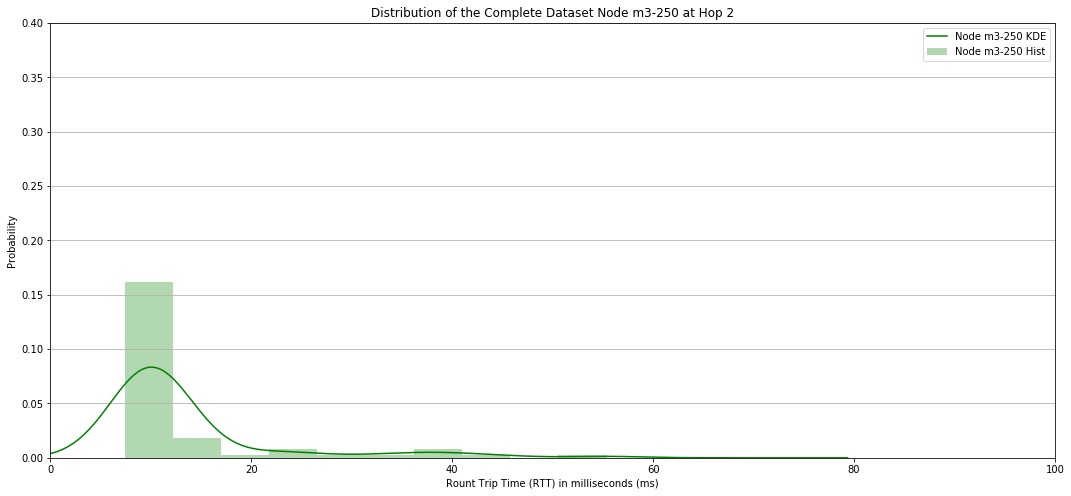

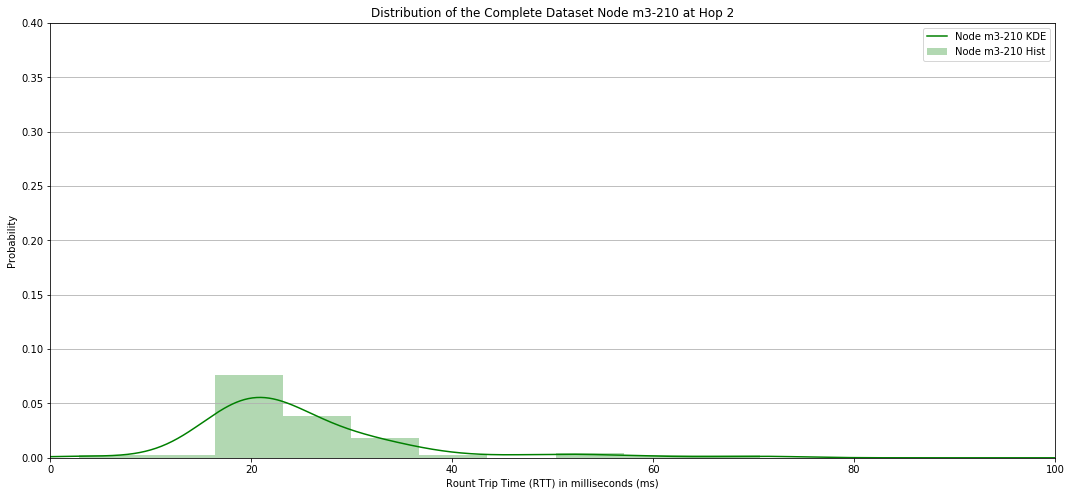

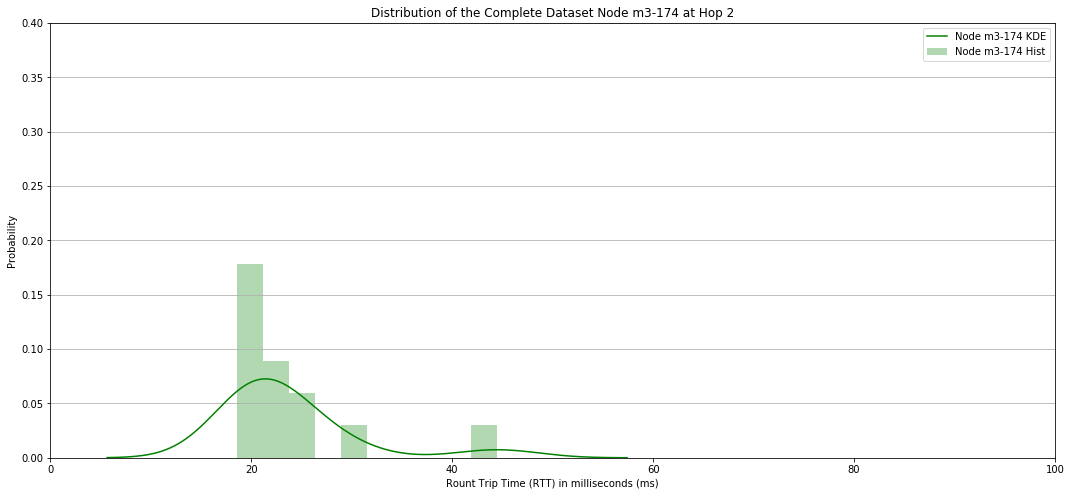

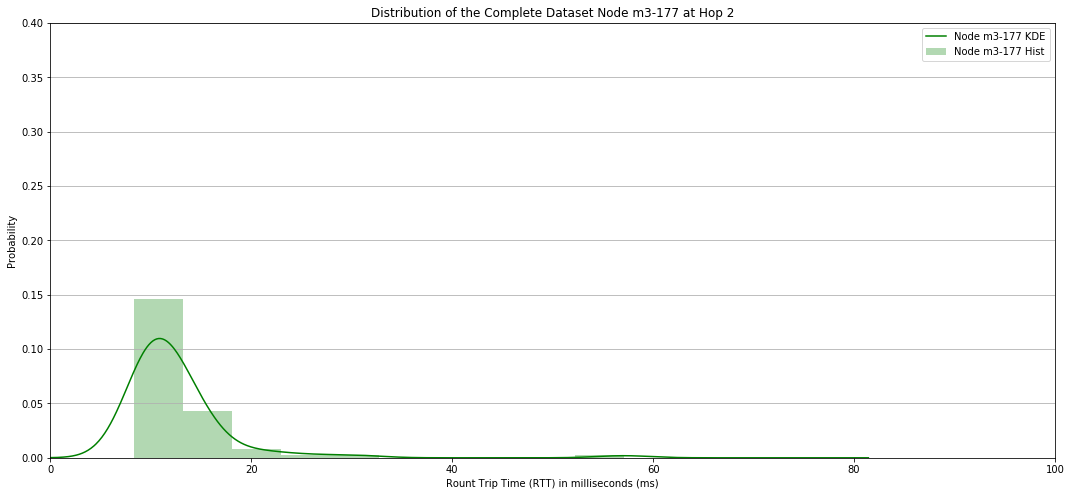

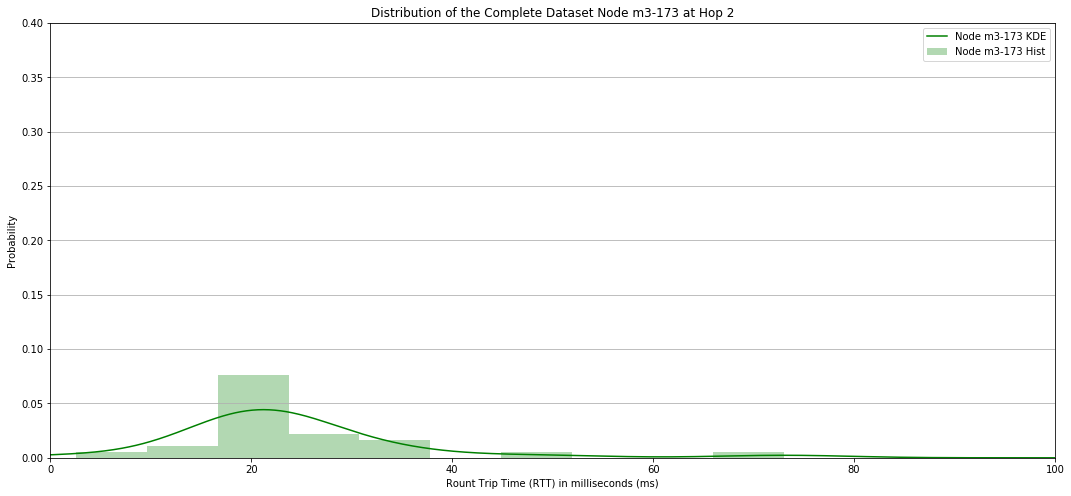

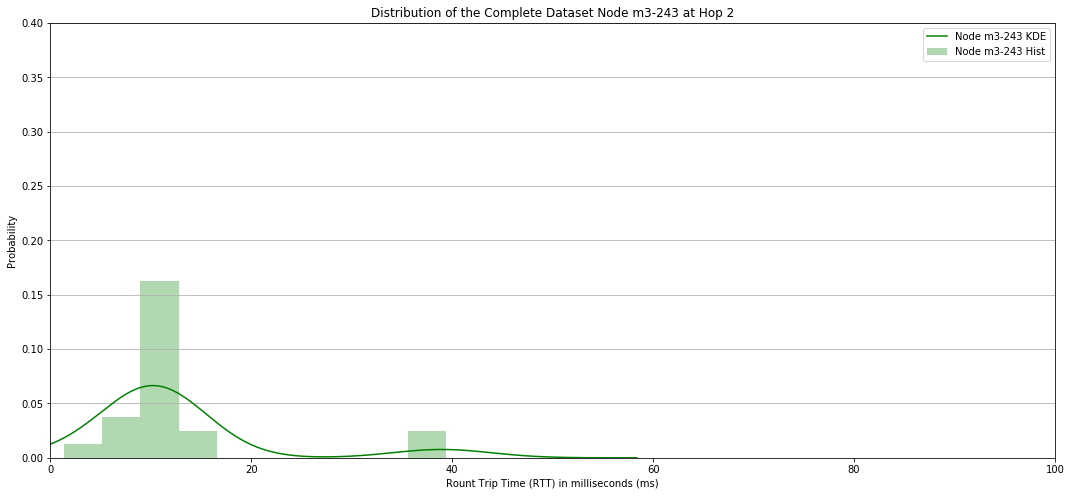

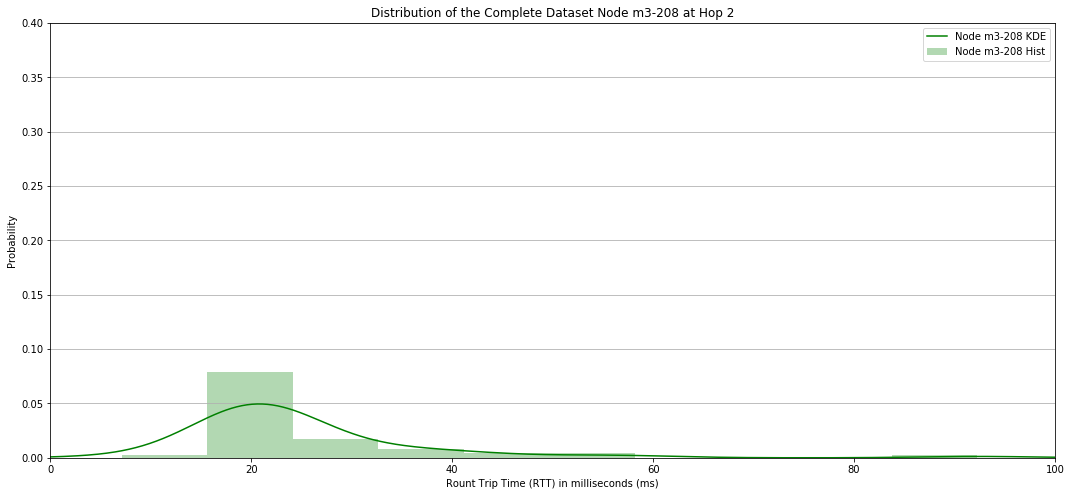

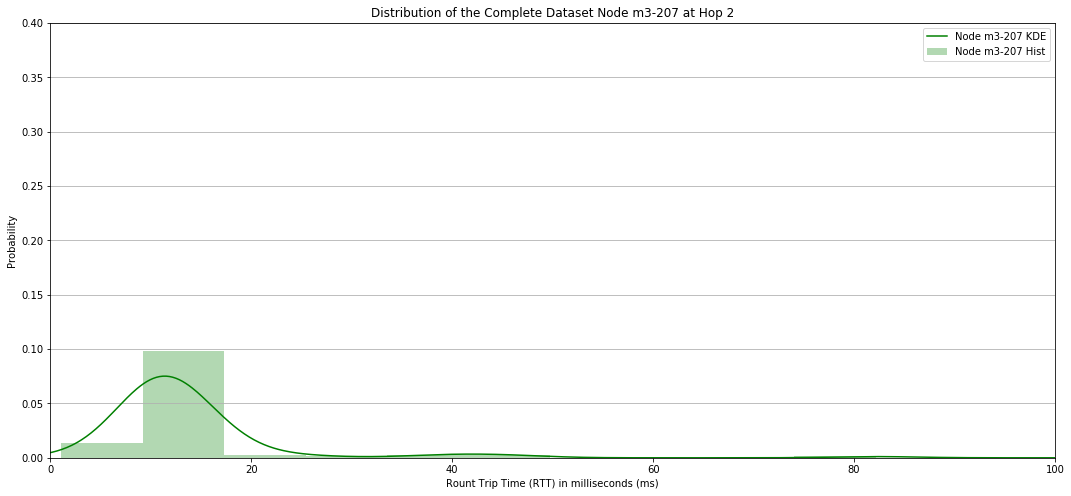

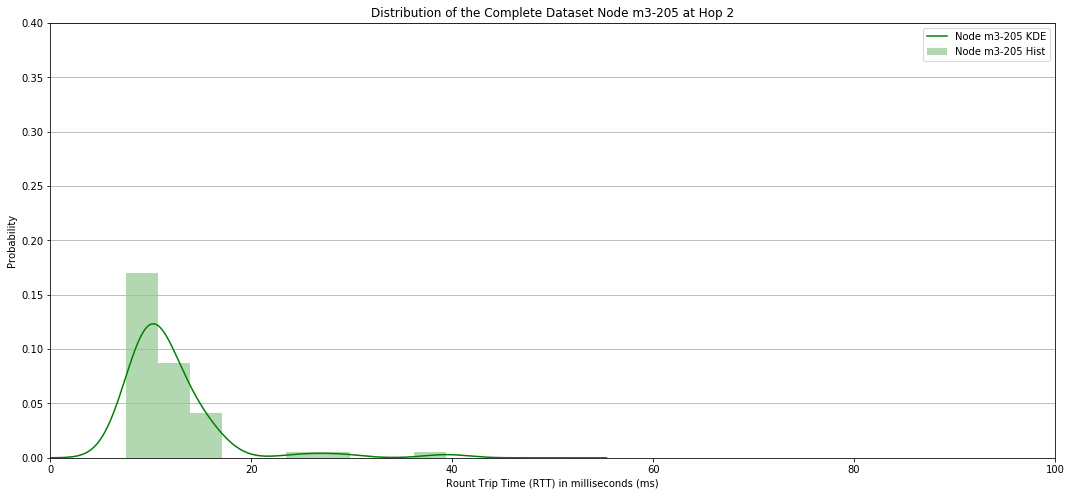

In [23]:
color = ['', 'blue', 'green', 'red']


for hop in hops3b.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes3b[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3b[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops3b[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes3b[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes3b[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Compare Hops

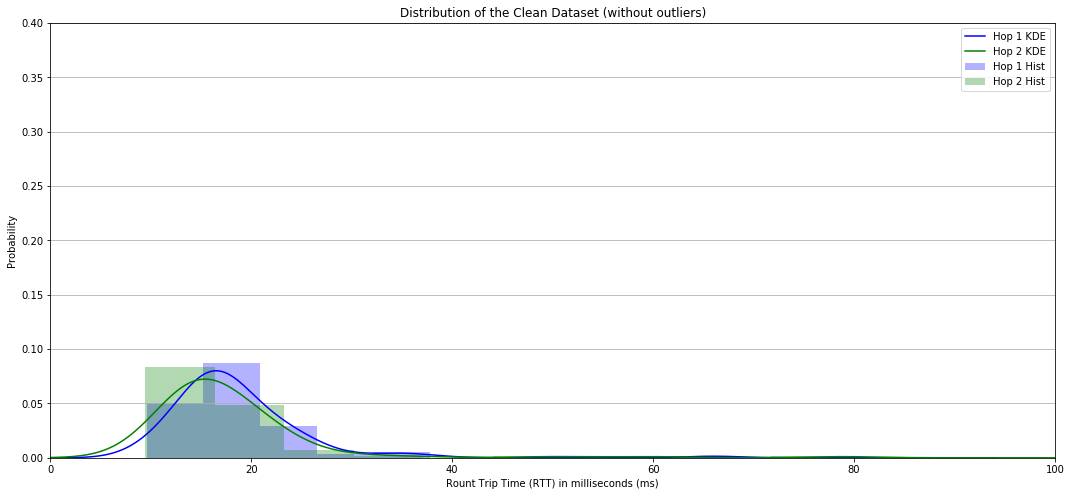

In [24]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3b.keys():
    hop_nodes3b[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3b[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

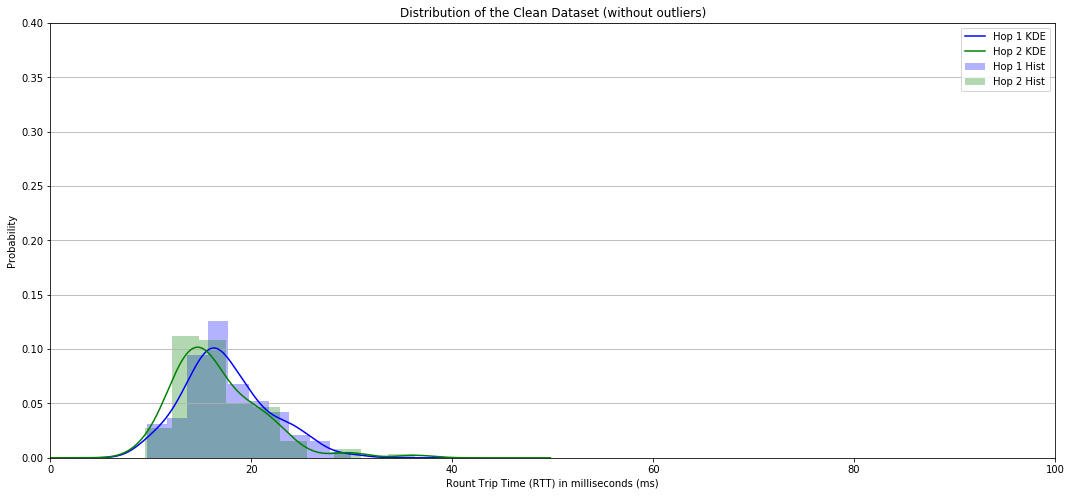

In [26]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values3b.keys():
    hop_std_values3b[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values3b[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

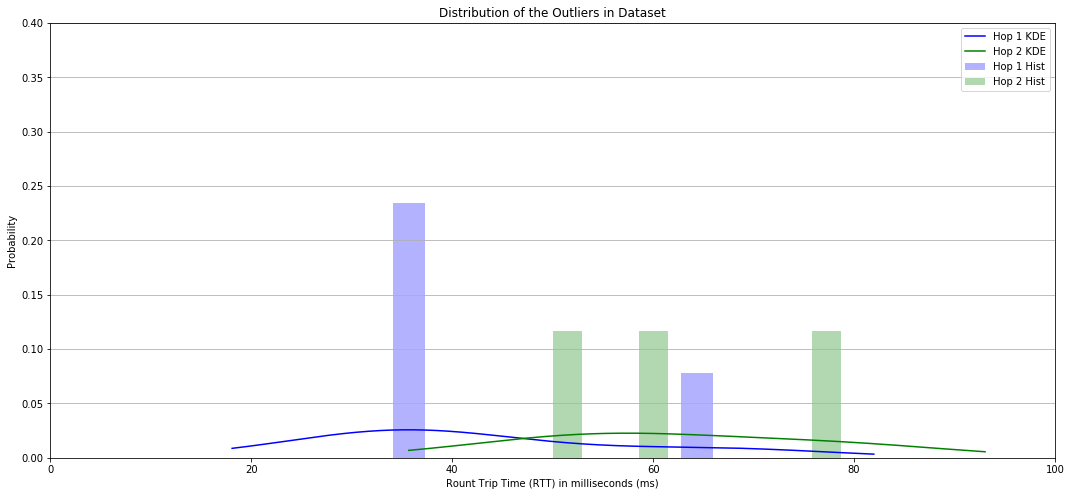

In [27]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers1.keys():
    hop_outliers3b[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers3b[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


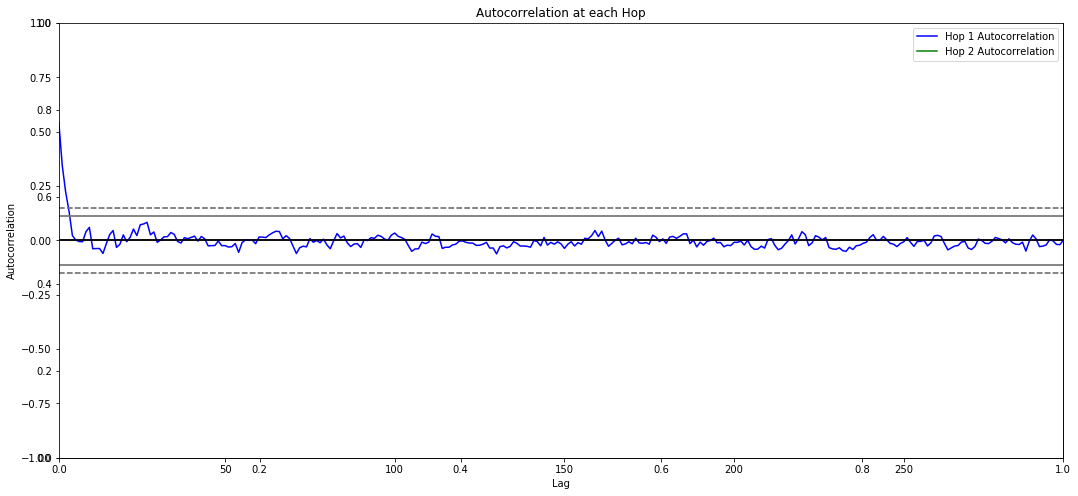

In [28]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3b.keys():
    autocorrelation_plot(hop_nodes1[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

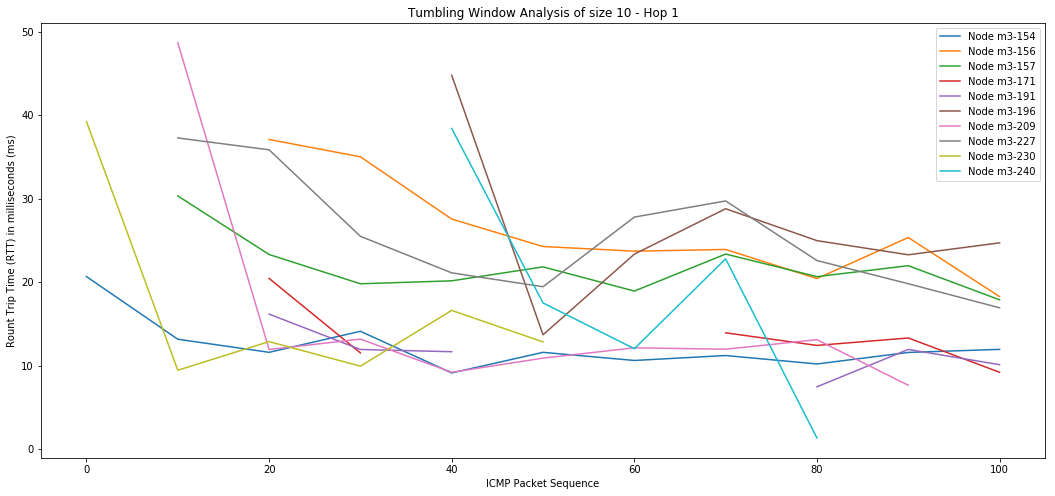

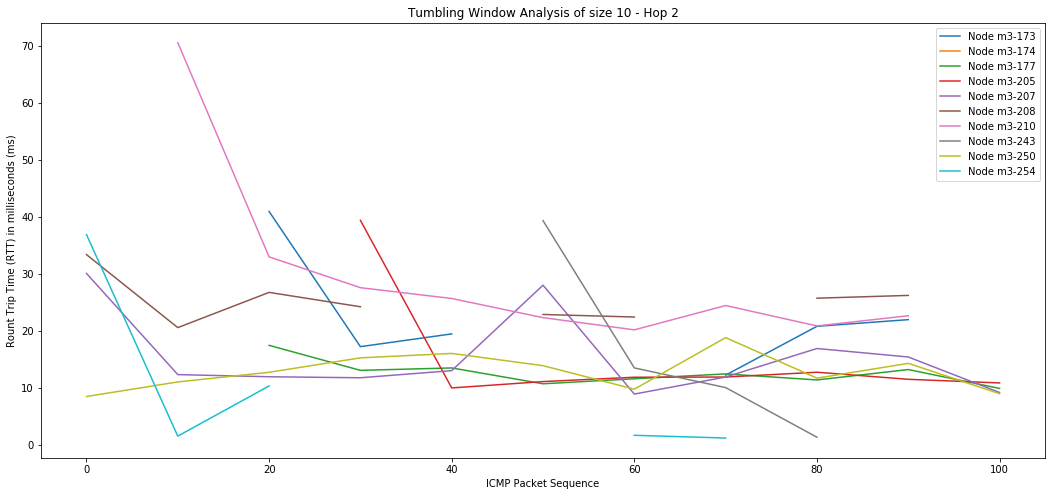

In [29]:
window_size = 10
for h in hops3b.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes3b:
        if node in hops3b[h]:
            plt.plot(nodes3b[node].groupby(nodes3b[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by hop tumbling window

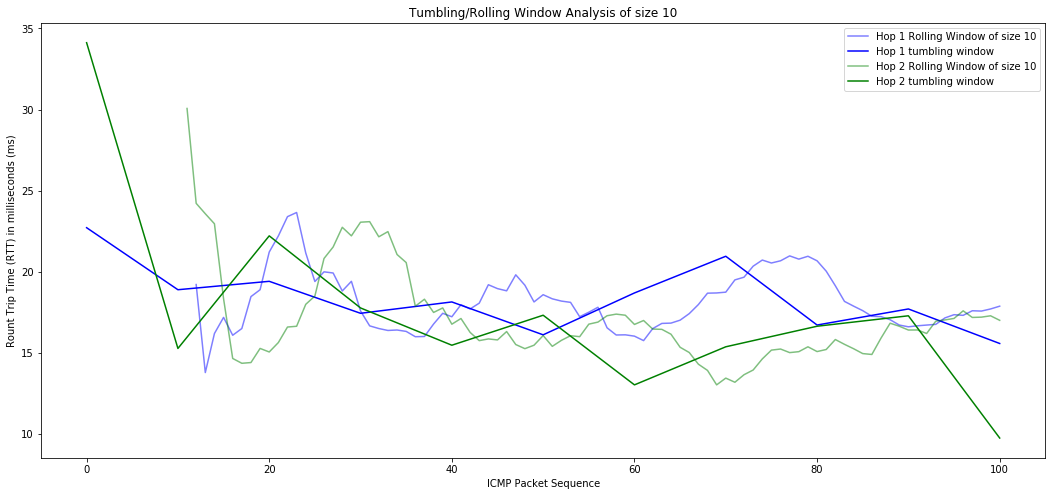

In [30]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes3b.keys():
    plt.plot(hop_nodes3b[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes3b[hop].groupby(hop_nodes3b[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

Outliers

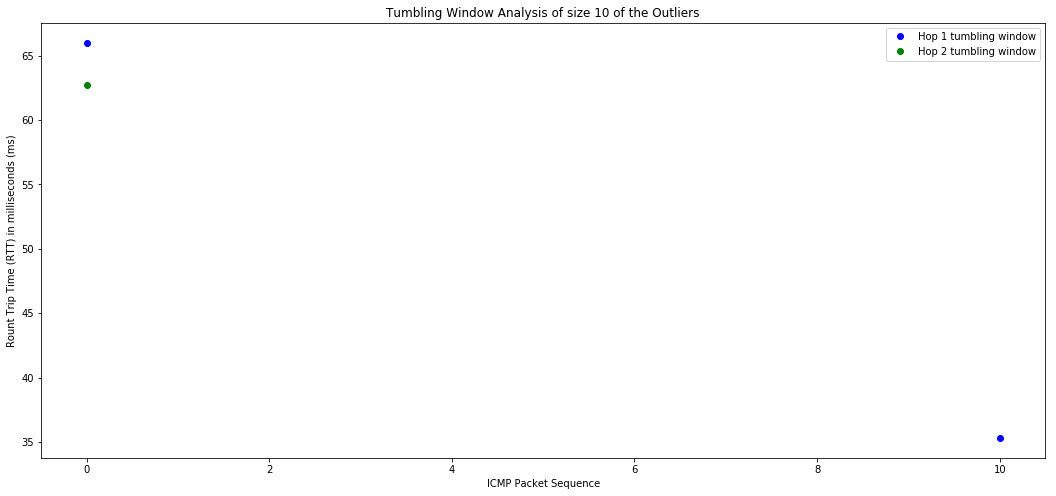

In [31]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes3b.keys():
    plt.plot(hop_outliers3b[hop].groupby(hop_outliers3b[hop].index // window_size * window_size).mean(), 'o', color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' of the Outliers')
plt.legend()

### Statistics

For each hop

In [32]:
hop_nodes3b.describe()

1          2
count  98.000000  99.000000
mean   18.517830  18.040004
std     7.045253   9.330773
min     9.564000   9.418000
25%    15.000514  13.375371
50%    16.668060  15.749143
75%    20.074304  19.711886
max    66.003000  78.706000

For each node

In [33]:
nodes3b.describe()

m3-154     m3-156     m3-157     m3-171     m3-173     m3-174  \
count  90.000000  64.000000  73.000000  40.000000  26.000000  13.000000   
mean   12.257367  26.689063  21.817233  14.254100  24.567808  23.785923   
std     7.749138  13.038254   7.589840  11.204921  12.743768   6.914399   
min     7.331000  14.440000  15.649000   7.915000   2.561000  18.579000   
25%     9.558250  18.839750  18.511000   9.837500  18.914250  19.549000   
50%    10.199000  22.775000  19.791000  11.403000  21.757000  21.786000   
75%    11.852250  27.719250  22.277000  13.380250  24.812750  25.217000   
max    66.003000  82.491000  74.342000  72.124000  73.041000  44.468000   

          m3-177     m3-191     m3-196     m3-205     m3-207     m3-208  \
count  77.000000  38.000000  39.000000  61.000000  84.000000  55.000000   
mean   12.716571  12.377474  23.617923  11.952754  14.068048  25.146400   
std     6.387206   8.068808  10.967808   5.096720  10.408458  12.891985   
min     8.310000   1.331000   8.537000   7.546000   1.095000   7.078000   
25%     9.903000   9.866750  17.846500   9.459000   9.838000  18.529000   
50%    10.863000  11.618000  20.406000  10.419000  11.344500  21.168000   
75%    13.669000  13.176750  25.483500  12.539000  13.518500  25.247500   
max    57.060000  57.623000  58.447000  39.417000  82.150000  92.267000   

          m3-209     m3-210     m3-227     m3-230     m3-240     m3-243  \
count  68.000000  66.000000  64.000000  38.000000  25.000000  21.000000   
mean   12.784471  25.021545  24.842109  12.133737  19.955800  12.683143   
std    10.001674  10.504415  12.964725   8.071042  12.654724   9.086077   
min     7.324000   2.876000  15.006000   1.862000   1.215000   1.346000   
25%     8.912000  19.051250  19.074250   8.607500  17.007000   9.275000   
50%     9.872500  21.903000  20.243500   9.488500  19.880000  10.235000   
75%    13.554250  28.001000  25.044500  10.766000  24.172000  11.835000   
max    83.198000  70.602000  91.932000  39.232000  58.462000  39.364000   

          m3-250     m3-254  
count  80.000000   9.000000  
mean   13.454862  19.197889  
std     9.235646  24.642741  
min     7.392000   1.202000  
25%     9.301000   1.610000  
50%    10.250000  19.080000  
75%    11.673000  22.350000  
max    55.373000  78.706000

Loss

In [34]:
pd.DataFrame([[h, str((len(hop_nodes3b[h]) - hop_nodes3b[h].count())/len(hop_nodes3b[h])*100) +'%'] 
              for h in hop_nodes3b.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 2.0%
1    2                 1.0%

In [36]:
pd.DataFrame([[n, h, str((len(nodes3b[n]) - nodes3b[n].count())/len(nodes3b[n])*100) +'%'] 
              for n in nodes3b.keys() for h in hops3b.keys() if n in hops3b[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
0   m3-154    1                10.0%
1   m3-156    1                36.0%
2   m3-157    1                27.0%
3   m3-171    1                60.0%
16  m3-240    1                75.0%
15  m3-230    1                62.0%
7   m3-191    1                62.0%
8   m3-196    1                61.0%
14  m3-227    1                36.0%
12  m3-209    1                32.0%
17  m3-243    2                79.0%
13  m3-210    2                34.0%
9   m3-205    2                39.0%
10  m3-207    2                16.0%
18  m3-250    2                20.0%
6   m3-177    2                23.0%
5   m3-174    2                87.0%
4   m3-173    2                74.0%
11  m3-208    2                45.0%
19  m3-254    2                91.0%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

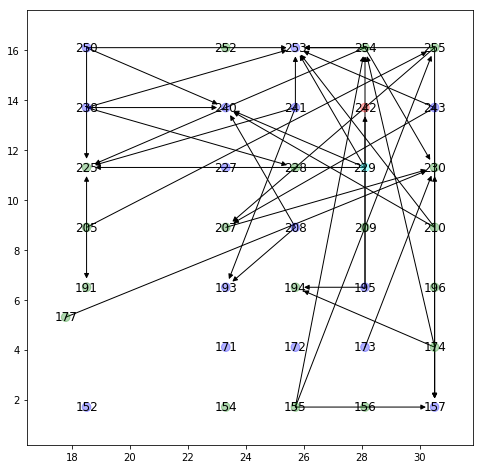

In [22]:
G3 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-29-3b241')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G3, pos=nx.get_node_attributes(G3,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G3,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G3, pos=nx.get_node_attributes(G3,'loc'), labels=nx.get_node_attributes(G3,'id'))
nx.draw_networkx_edges(G3, pos=nx.get_node_attributes(G3,'loc'))
plt.show()